In [3]:
import numpy as np
import pandas as pd
import scipy.stats

pd.options.mode.chained_assignment = None
from matplotlib import pyplot as plt, rcParams
# import cv2
import seaborn as sns

sns.set(style="white", context="paper")
from cycler import cycler
import os, sys
import glob
from datetime import datetime, timedelta
from itertools import combinations
import base64
from PIL import Image
from io import BytesIO as _BytesIO
import requests
import json
import pickle
from datetime import datetime
from IPython.display import display, Markdown, Latex
from sklearn.metrics import *
import collections
from copy import deepcopy
pd.options.display.max_columns = None
def printm(s): return display(Markdown(s))

/home/prasoon/anaconda3/envs/edusense/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
result_date = '20230914'
## config for various kinds of graphs

gconfigs = {
    'barplot': {'color': 'blue', 'linestyle': '-.', 'marker': '.', 'alpha': 0.5}
}


#Percentile calculations
def perc_75(x): return np.percentile(x, 75)


def perc_25(x): return np.percentile(x, 25)


#Set default RC parameters
notebook_default_rcparams = {
    "axes.titlesize": 32,
    "axes.labelsize": 30,
    "legend.fontsize": 30,
    "legend.title_fontsize": 30,
    "xtick.labelsize": 30,
    "ytick.labelsize": 30,
    "axes.grid": True,
    "legend.framealpha": 0.5,
    "lines.linewidth": 5,
    "legend.loc": 'upper left'

}
rcParams.update(notebook_default_rcparams)

# Standardized Labels

EPSILON = 2e-2
#plotting dir


plotting_dir = f'plots/{datetime.now().strftime("%Y%m%d")}'
if not os.path.exists(plotting_dir):
    os.makedirs(plotting_dir)
result_dir = f'results/{result_date}'

In [5]:
session_map = {
 'classinsight-cmu_05748A_ghc_4101_201902051630':'Course A (S1)',
 'classinsight-cmu_05748A_ghc_4101_201902141630':'Course A (S2)',
 'classinsight-cmu_05748A_ghc_4101_201902281630':'Course A (S3)',
 'classinsight-cmu_05748A_ghc_4101_201903071630':'Course A (S4)',
 'classinsight-cmu_05748A_ghc_4101_201904021630':'Course A (S5)',
 'classinsight-cmu_17214B_ph_a21_201902271030':'Course B (S1)',
 'classinsight-cmu_17214B_ph_a21_201903061030':'Course B (S2)',
 'classinsight-cmu_17214B_ph_a21_201904031030':'Course B (S3)',
 'classinsight-cmu_17214B_ph_a21_201904101030':'Course B (S4)',
 'classinsight-cmu_17214B_ph_a21_201904241030':'Course B (S5)',
 'classinsight-cmu_17214C_ph_225b_201903201130':'Course C (S1)',
 'classinsight-cmu_17214C_ph_225b_201904101130':'Course C (S2)',
 'classinsight-cmu_17214C_ph_225b_201904171130':'Course C (S3)',
 'classinsight-cmu_17214C_ph_225b_201904241130':'Course C (S4)',
 'classinsight-cmu_17214C_ph_225b_201905011130':'Course C (S5)',
}

session_only_map = {
 'classinsight-cmu_05748A_ghc_4101_201902051630':'Session 1',
 'classinsight-cmu_05748A_ghc_4101_201902141630':'Session 2',
 'classinsight-cmu_05748A_ghc_4101_201902281630':'Session 3',
 'classinsight-cmu_05748A_ghc_4101_201903071630':'Session 4',
 'classinsight-cmu_05748A_ghc_4101_201904021630':'Session 5',
 'classinsight-cmu_17214B_ph_a21_201902271030':'Session 1',
 'classinsight-cmu_17214B_ph_a21_201903061030':'Session 2',
 'classinsight-cmu_17214B_ph_a21_201904031030':'Session 3',
 'classinsight-cmu_17214B_ph_a21_201904101030':'Session 4',
 'classinsight-cmu_17214B_ph_a21_201904241030':'Session 5',
 'classinsight-cmu_17214C_ph_225b_201903201130':'Session 1',
 'classinsight-cmu_17214C_ph_225b_201904101130':'Session 2',
 'classinsight-cmu_17214C_ph_225b_201904171130':'Session 3',
 'classinsight-cmu_17214C_ph_225b_201904241130':'Session 4',
 'classinsight-cmu_17214C_ph_225b_201905011130':'Session 5',
}

course_map = {
    '05748A':'Course A',
    '17214B':'Course B',
    '17214C':'Course C'
}

# Eval 1: ID Count plot

In [283]:
df_e1 = pd.read_csv(f'{result_dir}/Eval1_counts.csv')
df_e1

course                                        session Session Date  \
0   05748A  classinsight-cmu_05748A_ghc_4101_201902141630       Feb 14   
1   05748A  classinsight-cmu_05748A_ghc_4101_201904021630        Apr 2   
2   05748A  classinsight-cmu_05748A_ghc_4101_201902051630        Feb 5   
3   05748A  classinsight-cmu_05748A_ghc_4101_201902281630       Feb 28   
4   05748A  classinsight-cmu_05748A_ghc_4101_201903071630        Mar 7   
5   17214B    classinsight-cmu_17214B_ph_a21_201902271030       Feb 27   
6   17214B    classinsight-cmu_17214B_ph_a21_201903061030        Mar 6   
7   17214B    classinsight-cmu_17214B_ph_a21_201904031030        Apr 3   
8   17214B    classinsight-cmu_17214B_ph_a21_201904101030       Apr 10   
9   17214B    classinsight-cmu_17214B_ph_a21_201904241030       Apr 24   
10  17214C   classinsight-cmu_17214C_ph_225b_201903201130       Mar 20   
11  17214C   classinsight-cmu_17214C_ph_225b_201904101130       Apr 10   
12  17214C   classinsight-cmu_17214C_ph_225b_201904171130       Apr 17   
13  17214C   classinsight-cmu_17214C_ph_225b_201904241130       Apr 24   
14  17214C   classinsight-cmu_17214C_ph_225b_201905011130        May 1   

    Edusense  OC-SORT-Only  OC-SORT+RemoveEphemeralIDs  \
0        285          1391                          54   
1        214           956                          66   
2        200          1417                          50   
3        223          1358                          52   
4        247          1975                          50   
5        206          1247                          40   
6        199          1627                          57   
7        201          1707                          31   
8        183          1102                          39   
9        134           856                          31   
10        56           169                          16   
11       139           780                          31   
12       172           650                          37   
13       192           585                          26   
14       212           521                          41   

    OC-SORT+RemoveEphemeralIDs+LocalIDC  \
0                                    37   
1                                    37   
2                                    35   
3                                    37   
4                                    32   
5                                    17   
6                                    29   
7                                    18   
8                                    22   
9                                    22   
10                                   14   
11                                   18   
12                                   24   
13                                   15   
14                                   26   

    OC-SORT+RemoveEphemeralIDs+GlobalMatch  \
0                                       31   
1                                       32   
2                                       31   
3                                       34   
4                                       29   
5                                       16   
6                                       27   
7                                       15   
8                                       22   
9                                       22   
10                                      14   
11                                      17   
12                                      21   
13                                      15   
14                                      26   

    OC-SORT+RemoveEphemeralIDs+LocalIDC+GlobalIDC  GroundTruth  
0                                              18           17  
1                                              20           14  
2                                              18           18  
3                                              21           18  
4                                              20           14  
5                                              14           13  
6        

In [284]:
df_e1 = pd.melt(df_e1, id_vars=['course','session','Session Date'], var_name='Type', value_name='Unique IDs')
df_e1['SessionName'] = df_e1['session'].apply(lambda x: session_map[x])
df_e1['SessionLabel'] = df_e1['session'].apply(lambda x: session_only_map[x])
df_e1 = df_e1.sort_values(by='SessionName')
df_e1

course                                        session Session Date  \
2    05748A  classinsight-cmu_05748A_ghc_4101_201902051630        Feb 5   
32   05748A  classinsight-cmu_05748A_ghc_4101_201902051630        Feb 5   
47   05748A  classinsight-cmu_05748A_ghc_4101_201902051630        Feb 5   
62   05748A  classinsight-cmu_05748A_ghc_4101_201902051630        Feb 5   
17   05748A  classinsight-cmu_05748A_ghc_4101_201902051630        Feb 5   
..      ...                                            ...          ...   
44   17214C   classinsight-cmu_17214C_ph_225b_201905011130        May 1   
59   17214C   classinsight-cmu_17214C_ph_225b_201905011130        May 1   
74   17214C   classinsight-cmu_17214C_ph_225b_201905011130        May 1   
29   17214C   classinsight-cmu_17214C_ph_225b_201905011130        May 1   
104  17214C   classinsight-cmu_17214C_ph_225b_201905011130        May 1   

                                       Type  Unique IDs    SessionName  \
2                                  Edusense         200  Course A (S1)   
32               OC-SORT+RemoveEphemeralIDs          50  Course A (S1)   
47      OC-SORT+RemoveEphemeralIDs+LocalIDC          35  Course A (S1)   
62   OC-SORT+RemoveEphemeralIDs+GlobalMatch          31  Course A (S1)   
17                             OC-SORT-Only        1417  Course A (S1)   
..                                      ...         ...            ...   
44               OC-SORT+RemoveEphemeralIDs          41  Course C (S5)   
59      OC-SORT+RemoveEphemeralIDs+LocalIDC          26  Course C (S5)   
74   OC-SORT+RemoveEphemeralIDs+GlobalMatch          26  Course C (S5)   
29                             OC-SORT-Only         521  Course C (S5)   
104                             GroundTruth          14  Course C (S5)   

    SessionLabel  
2      Session 1  
32     Session 1  
47     Session 1  
62     Session 1  
17     Session 1  
..           ...  
44     Session 5  
59     Session 5  
74     Session 5  
29     Session 5  
104    Session 5  

[105 rows x 7 columns]

## Get Baseline Plot

In [285]:
df_e1_baseline = deepcopy(df_e1)
df_e1_baseline = df_e1_baseline[df_e1_baseline.Type.isin(['Edusense','OC-SORT+RemoveEphemeralIDs+LocalIDC+GlobalIDC','GroundTruth'])]
df_e1_baseline

course                                        session Session Date  \
2    05748A  classinsight-cmu_05748A_ghc_4101_201902051630        Feb 5   
77   05748A  classinsight-cmu_05748A_ghc_4101_201902051630        Feb 5   
92   05748A  classinsight-cmu_05748A_ghc_4101_201902051630        Feb 5   
0    05748A  classinsight-cmu_05748A_ghc_4101_201902141630       Feb 14   
75   05748A  classinsight-cmu_05748A_ghc_4101_201902141630       Feb 14   
90   05748A  classinsight-cmu_05748A_ghc_4101_201902141630       Feb 14   
93   05748A  classinsight-cmu_05748A_ghc_4101_201902281630       Feb 28   
3    05748A  classinsight-cmu_05748A_ghc_4101_201902281630       Feb 28   
78   05748A  classinsight-cmu_05748A_ghc_4101_201902281630       Feb 28   
79   05748A  classinsight-cmu_05748A_ghc_4101_201903071630        Mar 7   
94   05748A  classinsight-cmu_05748A_ghc_4101_201903071630        Mar 7   
4    05748A  classinsight-cmu_05748A_ghc_4101_201903071630        Mar 7   
91   05748A  classinsight-cmu_05748A_ghc_4101_201904021630        Apr 2   
76   05748A  classinsight-cmu_05748A_ghc_4101_201904021630        Apr 2   
1    05748A  classinsight-cmu_05748A_ghc_4101_201904021630        Apr 2   
95   17214B    classinsight-cmu_17214B_ph_a21_201902271030       Feb 27   
5    17214B    classinsight-cmu_17214B_ph_a21_201902271030       Feb 27   
80   17214B    classinsight-cmu_17214B_ph_a21_201902271030       Feb 27   
6    17214B    classinsight-cmu_17214B_ph_a21_201903061030        Mar 6   
81   17214B    classinsight-cmu_17214B_ph_a21_201903061030        Mar 6   
96   17214B    classinsight-cmu_17214B_ph_a21_201903061030        Mar 6   
97   17214B    classinsight-cmu_17214B_ph_a21_201904031030        Apr 3   
82   17214B    classinsight-cmu_17214B_ph_a21_201904031030        Apr 3   
7    17214B    classinsight-cmu_17214B_ph_a21_201904031030        Apr 3   
83   17214B    classinsight-cmu_17214B_ph_a21_201904101030       Apr 10   
8    17214B    classinsight-cmu_17214B_ph_a21_201904101030       Apr 10   
98   17214B    classinsight-cmu_17214B_ph_a21_201904101030       Apr 10   
9    17214B    classinsight-cmu_17214B_ph_a21_201904241030       Apr 24   
99   17214B    classinsight-cmu_17214B_ph_a21_201904241030       Apr 24   
84   17214B    classinsight-cmu_17214B_ph_a21_201904241030       Apr 24   
85   17214C   classinsight-cmu_17214C_ph_225b_201903201130       Mar 20   
100  17214C   classinsight-cmu_17214C_ph_225b_201903201130       Mar 20   
10   17214C   classinsight-cmu_17214C_ph_225b_201903201130       Mar 20   
11   17214C   classinsight-cmu_17214C_ph_225b_201904101130       Apr 10   
101  17214C   classinsight-cmu_17214C_ph_225b_201904101130       Apr 10   
86   17214C   classinsight-cmu_17214C_ph_225b_201904101130       Apr 10   
102  17214C   classinsight-cmu_17214C_ph_225b_201904171130       Apr 17   
12   17214C   classinsight-cmu_17214C_ph_225b_201904171130       Apr 17   
87   17214C   classinsight-cmu_17214C_ph_225b_201904171130       Apr 17   
13   17214C   classinsight-cmu_17214C_ph_225b_201904241130       Apr 24   
103  17214C   classinsight-cmu_17214C_ph_225b_201904241130       Apr 24   
88   17214C   classinsight-cmu_17214C_ph_225b_201904241130       Apr 24   
89   17214C   classinsight-cmu_17214C_ph_225b_201905011130        May 1   
14   17214C   classinsight-cmu_17214C_ph_225b_201905011130        May 1   
104  17214C   classinsight-cmu_17214C_ph_225b_201905011130        May 1   

                                              Type  Unique IDs    SessionName  \
2                                         Edusense         200  Course A (S1)   
77   OC-SORT+RemoveEphemeralIDs+LocalIDC+GlobalIDC          18  Course A (S1)   
92                                     GroundTruth          18  Course A (S1)   
0                                         Edusense         285  Course A (S2)   
75   OC-SORT+RemoveEphemeralIDs+LocalIDC+GlobalIDC          18  Course A (S2)   
90                                     GroundTruth          17  Cour

In [286]:
baseline_map = {'Edusense':'Baseline Approach- EduSense',
                'OC-SORT+RemoveEphemeralIDs+LocalIDC+GlobalIDC':'Our Approach',
                'GroundTruth':'Ground Truth Annotations'}

In [287]:
df_e1_baseline['Method'] = df_e1_baseline['Type'].apply(lambda x: baseline_map[x])

In [288]:
# plt.figure(figsize=(40,10))
# ax = sns.barplot(data=df_e1_baseline,x='SessionName',y='Unique IDs', hue='Method')
# colors = ['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']
# # plt.xlim(0,100)
# # Define some hatches
# hatches = ['-', '+', 'x', '\\', '*', 'o','-']
# for i,p in enumerate(ax.patches):
#     height = p.get_height() # height of each horizontal bar is the same
#     width = p.get_width() # width (average number of passengers)
#     # print(i)
#     p.set_hatch(hatches[i//15])

#     # adding text to each bar
#     ax.text(x = p.get_x(), # x-coordinate position of data label, padded 3 to right of bar
#             y = p.get_y()+height+3, # # y-coordinate position of data label, padded to be in the middle of the bar
#             s = "{:.0f}".format(height), # data label, formatted to ignore decimals
#                      va = "center", size=20, color=colors[i//15]) # sets vertical alignment (va) to center
# plt.legend(ncol=3, bbox_to_anchor=(0.08, 1.185),fontsize=40)
# plt.xlabel('')
# plt.ylabel('Unique IDs')
# _ = plt.xticks(range(15),df_e1_baseline.SessionName.unique(),rotation=45,ha='right')
# plt.legend(labels=['Ontology','Temporal','Combined'], fontsize=50)
# plt.savefig(f"{plotting_dir}/rq1a_jaccard_bestmodel.pdf", dpi=400, bbox_inches='tight')

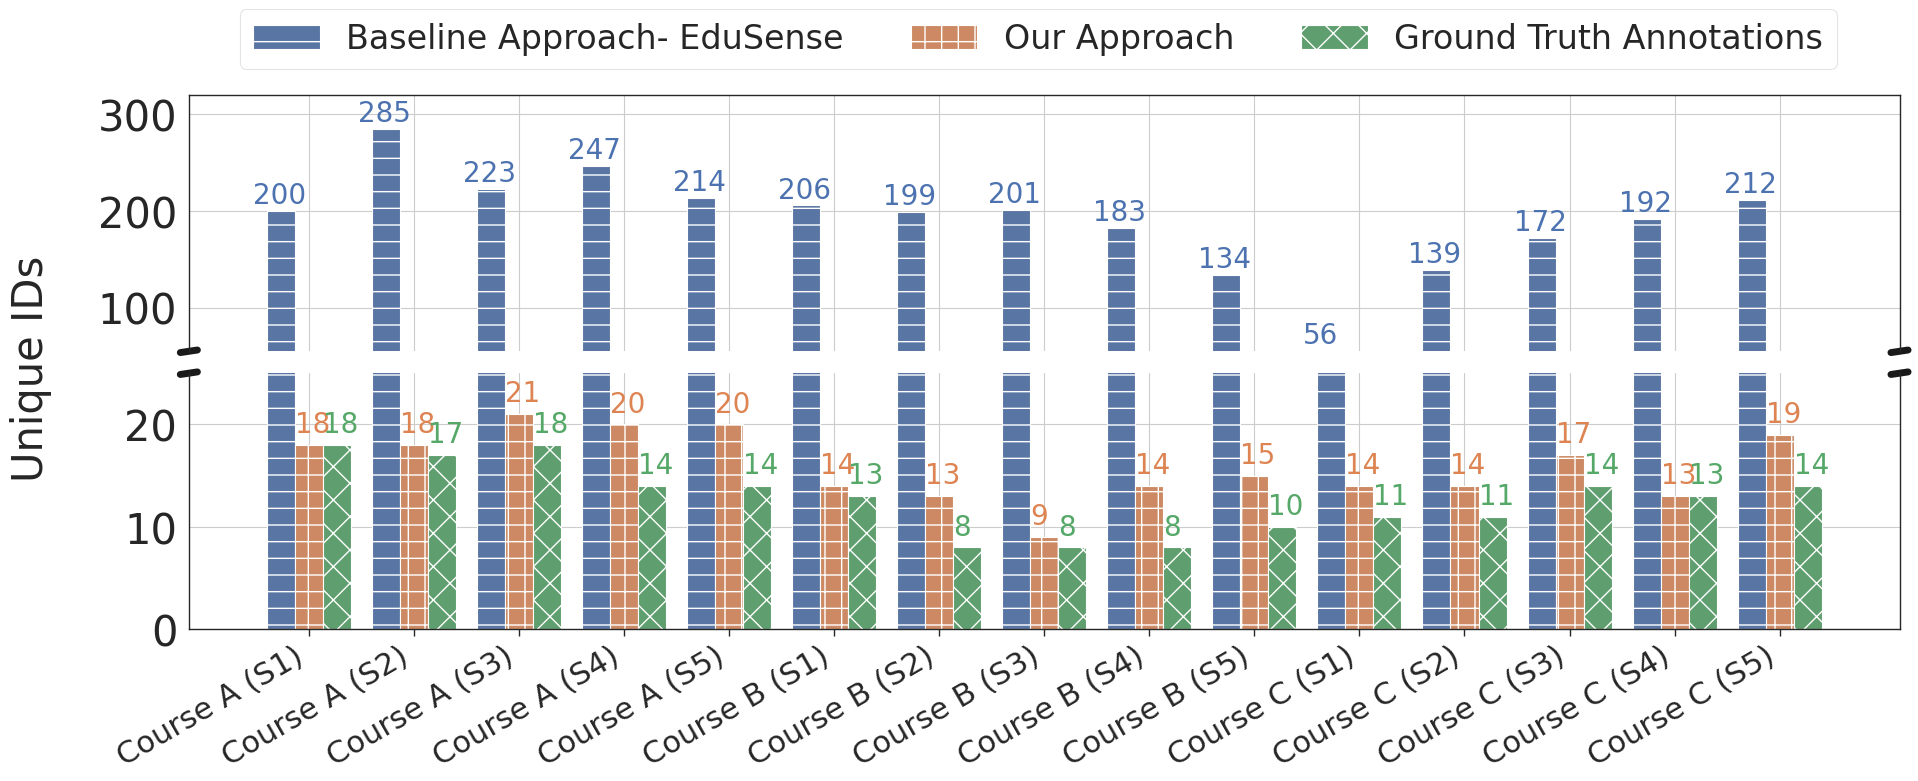

In [289]:
## Broken axis plot
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(20,8))

# plotting on axis 1
colors = ['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']
sns.barplot(data=df_e1_baseline,x='SessionName',y='Unique IDs', hue='Method',ax=ax1, palette=colors)

hatches = ['-', '+', 'x', '\\', '*', 'o','-']
for i,p in enumerate(ax1.patches):
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
    # print(i)
    p.set_hatch(hatches[i//15])
    # adding text to each bar
    if i < 15:
        ax1.text(x = p.get_x()-(width/2), # x-coordinate position of data label, padded 3 to right of bar
                y = p.get_y()+height+16, # # y-coordinate position of data label, padded to be in the middle of the bar
                s = "{:.0f}".format(height), # data label, formatted to ignore decimals
                         va = "center", size=20, color=colors[i//15]) # sets vertical alignment (va) to center
ax1.set_xlabel("")
# plotting on axis 2
sns.barplot(data=df_e1_baseline,x='SessionName',y='Unique IDs', hue='Method',ax=ax2, palette=colors)
colors = ['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']
hatches = ['-', '+', 'x', '\\', '*', 'o','-']
for i,p in enumerate(ax2.patches):
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
    # print(i)
    p.set_hatch(hatches[i//15])
    # adding text to each bar
    if i >= 15:
        ax2.text(x = p.get_x(), # x-coordinate position of data label, padded 3 to right of bar
                y = p.get_y()+height+2, # # y-coordinate position of data label, padded to be in the middle of the bar
                s = "{:.0f}".format(height), # data label, formatted to ignore decimals
                         va = "center", size=20, color=colors[i//15]) # sets vertical alignment (va) to center







# plot_clustered_stacked_v2([df_g1_rpi_med_ic, df_g1_jetson_med_ic, df_g1_lwarm_med_ic],ax1,["RPI", "Jetson Nano", "Lambda (Warm)"],cmap='Dark2')
# plot_clustered_stacked_v2([df_g1_rpi_med_ic, df_g1_jetson_med_ic, df_g1_lwarm_med_ic],ax2,["RPI", "Jetson Nano", "Lambda (Warm)"],cmap='Dark2')

ax1.set_ylim(55, 320)
ax2.set_ylim(0, 25)


# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
# ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

ax1.grid(True)
ax2.grid(True)

# Add diagonal cuts

d = .005  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal



# plt.xlabel('')
# plt.ylabel('Unique IDs')
# _ = plt.xticks(range(15),df_e1_baseline.SessionName.unique(),rotation=45,ha='right')


# plt.grid(True)
# plt.title("Image Classification: Runtime Performance")
# plt.ylabel(r"Time (Millisecs, $\bf{Log-Scale}$)")
plt.ylabel("Unique IDs")
ax2.yaxis.set_label_coords(-0.08,1.02)
# ax2.set_xticklabels(df_e1_baseline[['SessionName','SessionLabel']].drop_duplicates().SessionLabel.values.tolist())
# ax1.set_title("Image Classification: Runtime Performance")
ax2.get_legend().remove()
ax1.set_ylabel("")
ax1.legend(ncol=3, bbox_to_anchor=(0.02, 1.4),fontsize=24)
plt.xlabel("")

# write course labels
# plt.gcf().text(0.2, -0.04, "Course A", fontsize=34, ha='center')
# plt.gcf().text(0.4, -0.04, "Course B", fontsize=34, ha='center')
# plt.gcf().text(0.6, -0.04, "Course C", fontsize=34, ha='center')


# plt.ylim(0,3500)
# plt.yscale('log')
plt.xticks(rotation=30, fontsize=22,ha='right')
plt.tight_layout()
plt.savefig(f'{plotting_dir}/eval1_id_counts.png',dpi=300, bbox_inches='tight')

In [290]:
ax2.get_xticks()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## Get Step Wise Improvement chart

In [291]:
improv_map = {
    'OC-SORT-Only':'OC-Sort Only',
    'OC-SORT+RemoveEphemeralIDs':'OC-Sort+ID Filtering',
    'OC-SORT+RemoveEphemeralIDs+LocalIDC':'OC-Sort+ID Filtering+Local-ID Reconciliation',
    'OC-SORT+RemoveEphemeralIDs+LocalIDC+GlobalIDC':'OC-Sort+ID Filtering+Local-ID Reconciliation+Global ID Reconciliation',
}
improv_sort_key_map = {
    'OC-SORT-Only':0,
    'OC-SORT+RemoveEphemeralIDs':1,
    'OC-SORT+RemoveEphemeralIDs+LocalIDC':2,
    'OC-SORT+RemoveEphemeralIDs+LocalIDC+GlobalIDC':3
}

In [292]:
df_e1_improve = deepcopy(df_e1)
df_e1_improve = df_e1_improve[df_e1_improve.Type.isin(improv_map.keys())]


In [293]:
df_e1_improve.Type.unique()

array(['OC-SORT+RemoveEphemeralIDs',
       'OC-SORT+RemoveEphemeralIDs+LocalIDC', 'OC-SORT-Only',
       'OC-SORT+RemoveEphemeralIDs+LocalIDC+GlobalIDC'], dtype=object)

In [294]:
df_e1_improve['Method'] = df_e1_improve['Type'].apply(lambda x: improv_map[x])
df_e1_improve['SortKey'] = df_e1_improve['Type'].apply(lambda x: improv_sort_key_map[x])
df_e1_improve = df_e1_improve.sort_values(by=['SessionName','SortKey'])

In [295]:
df_e1_improve

course                                        session Session Date  \
17  05748A  classinsight-cmu_05748A_ghc_4101_201902051630        Feb 5   
32  05748A  classinsight-cmu_05748A_ghc_4101_201902051630        Feb 5   
47  05748A  classinsight-cmu_05748A_ghc_4101_201902051630        Feb 5   
77  05748A  classinsight-cmu_05748A_ghc_4101_201902051630        Feb 5   
15  05748A  classinsight-cmu_05748A_ghc_4101_201902141630       Feb 14   
30  05748A  classinsight-cmu_05748A_ghc_4101_201902141630       Feb 14   
45  05748A  classinsight-cmu_05748A_ghc_4101_201902141630       Feb 14   
75  05748A  classinsight-cmu_05748A_ghc_4101_201902141630       Feb 14   
18  05748A  classinsight-cmu_05748A_ghc_4101_201902281630       Feb 28   
33  05748A  classinsight-cmu_05748A_ghc_4101_201902281630       Feb 28   
48  05748A  classinsight-cmu_05748A_ghc_4101_201902281630       Feb 28   
78  05748A  classinsight-cmu_05748A_ghc_4101_201902281630       Feb 28   
19  05748A  classinsight-cmu_05748A_ghc_4101_201903071630        Mar 7   
34  05748A  classinsight-cmu_05748A_ghc_4101_201903071630        Mar 7   
49  05748A  classinsight-cmu_05748A_ghc_4101_201903071630        Mar 7   
79  05748A  classinsight-cmu_05748A_ghc_4101_201903071630        Mar 7   
16  05748A  classinsight-cmu_05748A_ghc_4101_201904021630        Apr 2   
31  05748A  classinsight-cmu_05748A_ghc_4101_201904021630        Apr 2   
46  05748A  classinsight-cmu_05748A_ghc_4101_201904021630        Apr 2   
76  05748A  classinsight-cmu_05748A_ghc_4101_201904021630        Apr 2   
20  17214B    classinsight-cmu_17214B_ph_a21_201902271030       Feb 27   
35  17214B    classinsight-cmu_17214B_ph_a21_201902271030       Feb 27   
50  17214B    classinsight-cmu_17214B_ph_a21_201902271030       Feb 27   
80  17214B    classinsight-cmu_17214B_ph_a21_201902271030       Feb 27   
21  17214B    classinsight-cmu_17214B_ph_a21_201903061030        Mar 6   
36  17214B    classinsight-cmu_17214B_ph_a21_201903061030        Mar 6   
51  17214B    classinsight-cmu_17214B_ph_a21_201903061030        Mar 6   
81  17214B    classinsight-cmu_17214B_ph_a21_201903061030        Mar 6   
22  17214B    classinsight-cmu_17214B_ph_a21_201904031030        Apr 3   
37  17214B    classinsight-cmu_17214B_ph_a21_201904031030        Apr 3   
52  17214B    classinsight-cmu_17214B_ph_a21_201904031030        Apr 3   
82  17214B    classinsight-cmu_17214B_ph_a21_201904031030        Apr 3   
23  17214B    classinsight-cmu_17214B_ph_a21_201904101030       Apr 10   
38  17214B    classinsight-cmu_17214B_ph_a21_201904101030       Apr 10   
53  17214B    classinsight-cmu_17214B_ph_a21_201904101030       Apr 10   
83  17214B    classinsight-cmu_17214B_ph_a21_201904101030       Apr 10   
24  17214B    classinsight-cmu_17214B_ph_a21_201904241030       Apr 24   
39  17214B    classinsight-cmu_17214B_ph_a21_201904241030       Apr 24   
54  17214B    classinsight-cmu_17214B_ph_a21_201904241030       Apr 24   
84  17214B    classinsight-cmu_17214B_ph_a21_201904241030       Apr 24   
25  17214C   classinsight-cmu_17214C_ph_225b_201903201130       Mar 20   
40  17214C   classinsight-cmu_17214C_ph_225b_201903201130       Mar 20   
55  17214C   classinsight-cmu_17214C_ph_225b_201903201130       Mar 20   
85  17214C   classinsight-cmu_17214C_ph_225b_201903201130       Mar 20   
26  17214C   classinsight-cmu_17214C_ph_225b_201904101130       Apr 10   
41  17214C   classinsight-cmu_17214C_ph_225b_201904101130       Apr 10   
56  17214C   classinsight-cmu_17214C_ph_225b_201904101130       Apr 10   
86  17214C   classinsight-cmu_17214C_ph_225b_201904101130       Apr 10   
27  17214C   classinsight-cmu_17214C_ph_225b_201904171130       Apr 17   
42  17214C   classinsight-cmu_17214C_ph_225b_201904171130       Apr 17   
57  17214C   classinsight-cmu_17214C_ph_225b_201904171130       Apr 17   
87  17214C   classinsight-cmu_17214C_ph_225b_201904171130       Apr 17   
28  17214C   classinsight-cmu_17214C_ph_225b_201904241130       Apr 24   
43  1721

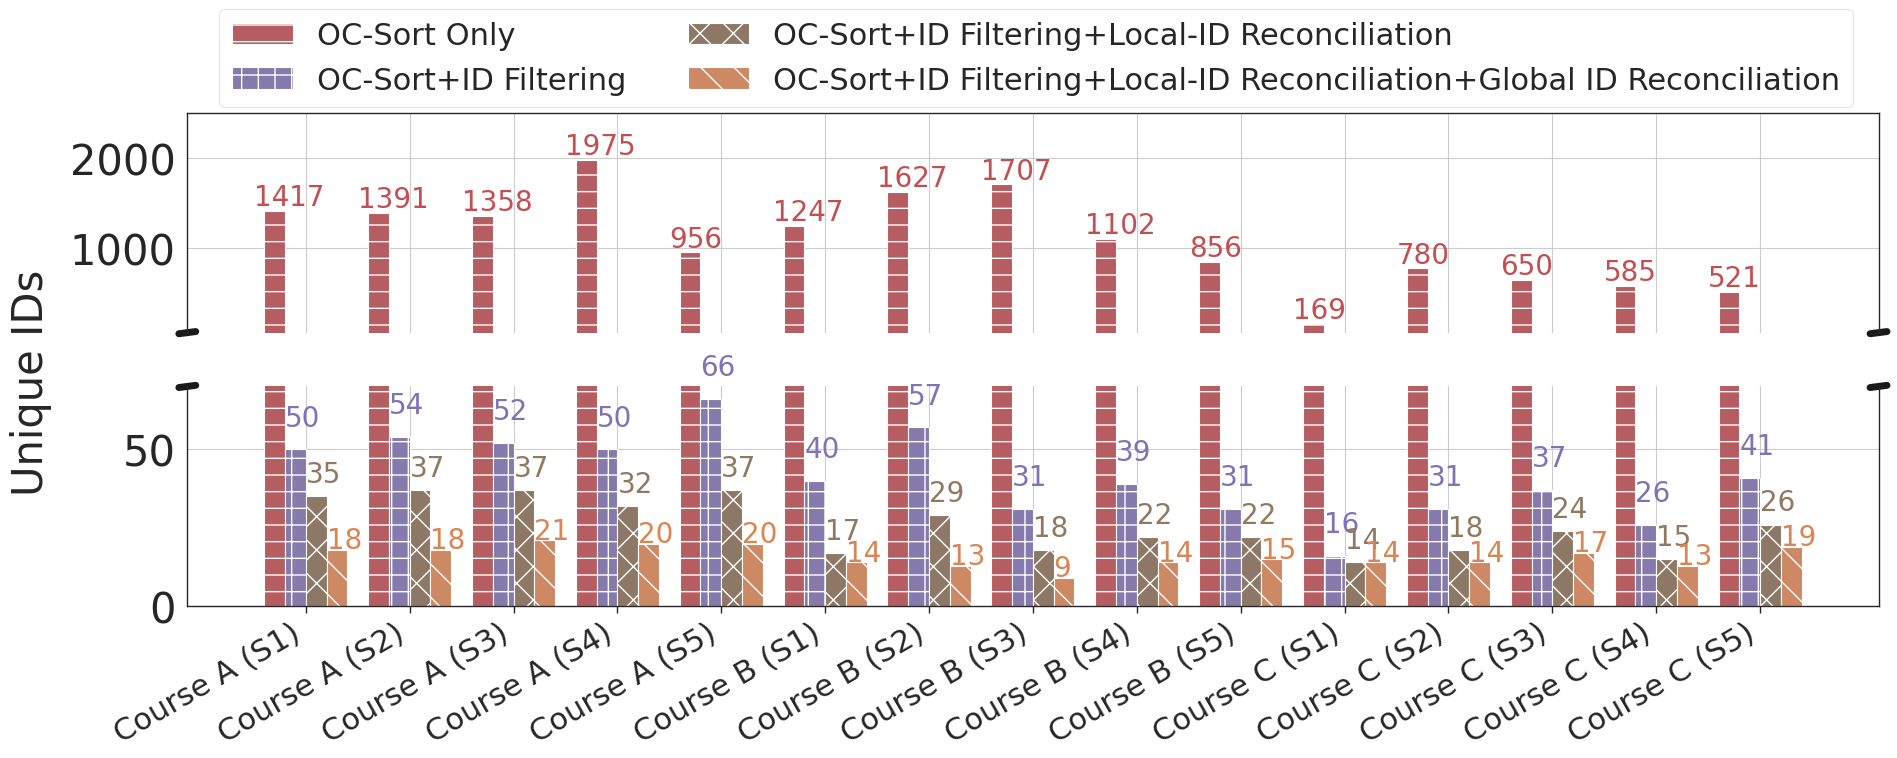

In [296]:
## Broken axis plot
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(20,8))

# plotting on axis 1
colors = ['#c44e52', '#8172b3', '#937860', '#dd8452', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']
sns.barplot(data=df_e1_improve,x='SessionName',y='Unique IDs', hue='Method',ax=ax1, palette=colors)

hatches = ['-', '+', 'x', '\\', '*', 'o','-']
for i,p in enumerate(ax1.patches):
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
    # print(i)
    p.set_hatch(hatches[i//15])
    # adding text to each bar
    if i < 15:
        ax1.text(x = p.get_x()- (width/2), # x-coordinate position of data label, padded 3 to right of bar
                y = p.get_y()+height+150, # # y-coordinate position of data label, padded to be in the middle of the bar
                s = "{:.0f}".format(height), # data label, formatted to ignore decimals
                         va = "center", size=20, color=colors[i//15]) # sets vertical alignment (va) to center
ax1.set_xlabel("")
# plotting on axis 2
sns.barplot(data=df_e1_improve,x='SessionName',y='Unique IDs', hue='Method',ax=ax2, palette=colors)
colors = ['#c44e52', '#8172b3', '#937860', '#dd8452', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']
hatches = ['-', '+', 'x', '\\', '*', 'o','-']
for i,p in enumerate(ax2.patches):
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
    # print(i)
    p.set_hatch(hatches[i//15])
    # adding text to each bar
    if i >= 45:
        ax2.text(x = p.get_x(), # x-coordinate position of data label, padded 3 to right of bar
                y = p.get_y()+height+3, # # y-coordinate position of data label, padded to be in the middle of the bar
                s = "{:.0f}".format(height), # data label, formatted to ignore decimals
                         va = "center", size=20, color=colors[i//15]) # sets vertical alignment (va) to center
    elif i >= 30:
        ax2.text(x = p.get_x(), # x-coordinate position of data label, padded 3 to right of bar
                y = p.get_y()+height+7, # # y-coordinate position of data label, padded to be in the middle of the bar
                s = "{:.0f}".format(height), # data label, formatted to ignore decimals
                         va = "center", size=20, color=colors[i//15]) # sets vertical alignment (va) to center
    elif i >= 15:
        ax2.text(x = p.get_x(), # x-coordinate position of data label, padded 3 to right of bar
                y = p.get_y()+height+10, # # y-coordinate position of data label, padded to be in the middle of the bar
                s = "{:.0f}".format(height), # data label, formatted to ignore decimals
                         va = "center", size=20, color=colors[i//15]) # sets vertical alignment (va) to center

ax1.set_ylim(70, 2500)
ax2.set_ylim(0, 70)


# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
# ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

ax1.grid(True)
ax2.grid(True)

# Add diagonal cuts

d = .005  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal



# plt.xlabel('')
# plt.ylabel('Unique IDs')
# _ = plt.xticks(range(15),df_e1_baseline.SessionName.unique(),rotation=45,ha='right')


# plt.grid(True)
# plt.title("Image Classification: Runtime Performance")
# plt.ylabel(r"Time (Millisecs, $\bf{Log-Scale}$)")
plt.ylabel("Unique IDs")
ax2.yaxis.set_label_coords(-0.08,1.02)
# ax2.set_xticklabels(df_e1_baseline[['SessionName','SessionLabel']].drop_duplicates().SessionLabel.values.tolist())
# ax1.set_title("Image Classification: Runtime Performance")
ax2.get_legend().remove()
ax1.set_ylabel("")
ax1.legend(ncol=2, bbox_to_anchor=(0.01, 1.54),fontsize=22)
plt.xlabel("")

# write course labels
# plt.gcf().text(0.2, -0.04, "Course A", fontsize=34, ha='center')
# plt.gcf().text(0.4, -0.04, "Course B", fontsize=34, ha='center')
# plt.gcf().text(0.6, -0.04, "Course C", fontsize=34, ha='center')


# plt.ylim(0,3500)
# plt.yscale('log')
plt.xticks(rotation=30, fontsize=22,ha='right')
plt.tight_layout()
plt.savefig(f'{plotting_dir}/eval1_step_improvement.png',dpi=300, bbox_inches='tight')

# Eval 2: Accuracy and Detection Rate

In [297]:
df_e2 = pd.read_csv(f'{result_dir}/Eval2_acc_det.csv')
df_e2

Course                                        Session Session Date  \
0   05748A  classinsight-cmu_05748A_ghc_4101_201902141630       Feb 14   
1   05748A  classinsight-cmu_05748A_ghc_4101_201904021630        Apr 2   
2   05748A  classinsight-cmu_05748A_ghc_4101_201902051630        Feb 5   
3   05748A  classinsight-cmu_05748A_ghc_4101_201902281630       Feb 28   
4   05748A  classinsight-cmu_05748A_ghc_4101_201903071630        Mar 7   
5   17214B    classinsight-cmu_17214B_ph_a21_201902271030       Feb 27   
6   17214B    classinsight-cmu_17214B_ph_a21_201903061030        Mar 6   
7   17214B    classinsight-cmu_17214B_ph_a21_201904031030        Apr 3   
8   17214B    classinsight-cmu_17214B_ph_a21_201904101030       Apr 10   
9   17214B    classinsight-cmu_17214B_ph_a21_201904241030       Apr 24   
10  17214C   classinsight-cmu_17214C_ph_225b_201903201130       Mar 20   
11  17214C   classinsight-cmu_17214C_ph_225b_201904101130       Apr 10   
12  17214C   classinsight-cmu_17214C_ph_225b_201904171130       Apr 17   
13  17214C   classinsight-cmu_17214C_ph_225b_201904241130       Apr 24   
14  17214C   classinsight-cmu_17214C_ph_225b_201905011130        May 1   

    Accuracy  Detection Rate  
0       96.0            98.0  
1       95.5            96.6  
2      100.0            98.8  
3       92.3            99.2  
4       83.3            97.6  
5       97.0           100.0  
6      100.0            95.4  
7       88.0           100.0  
8       91.6            99.3  
9       92.8           100.0  
10     100.0            99.0  
11      90.2            99.6  
12      98.3            99.7  
13     100.0            99.0  
14      88.5            98.0

In [298]:
df_e2['SessionName'] = df_e2['Session'].apply(lambda x: session_map[x])
df_e2 = df_e2.sort_values(by='SessionName')
df_e2 = pd.melt(df_e2[['SessionName','Accuracy','Detection Rate']], id_vars='SessionName')
df_e2

SessionName        variable  value
0   Course A (S1)        Accuracy  100.0
1   Course A (S2)        Accuracy   96.0
2   Course A (S3)        Accuracy   92.3
3   Course A (S4)        Accuracy   83.3
4   Course A (S5)        Accuracy   95.5
5   Course B (S1)        Accuracy   97.0
6   Course B (S2)        Accuracy  100.0
7   Course B (S3)        Accuracy   88.0
8   Course B (S4)        Accuracy   91.6
9   Course B (S5)        Accuracy   92.8
10  Course C (S1)        Accuracy  100.0
11  Course C (S2)        Accuracy   90.2
12  Course C (S3)        Accuracy   98.3
13  Course C (S4)        Accuracy  100.0
14  Course C (S5)        Accuracy   88.5
15  Course A (S1)  Detection Rate   98.8
16  Course A (S2)  Detection Rate   98.0
17  Course A (S3)  Detection Rate   99.2
18  Course A (S4)  Detection Rate   97.6
19  Course A (S5)  Detection Rate   96.6
20  Course B (S1)  Detection Rate  100.0
21  Course B (S2)  Detection Rate   95.4
22  Course B (S3)  Detection Rate  100.0
23  Course B (S4)  Detection Rate   99.3
24  Course B (S5)  Detection Rate  100.0
25  Course C (S1)  Detection Rate   99.0
26  Course C (S2)  Detection Rate   99.6
27  Course C (S3)  Detection Rate   99.7
28  Course C (S4)  Detection Rate   99.0
29  Course C (S5)  Detection Rate   98.0

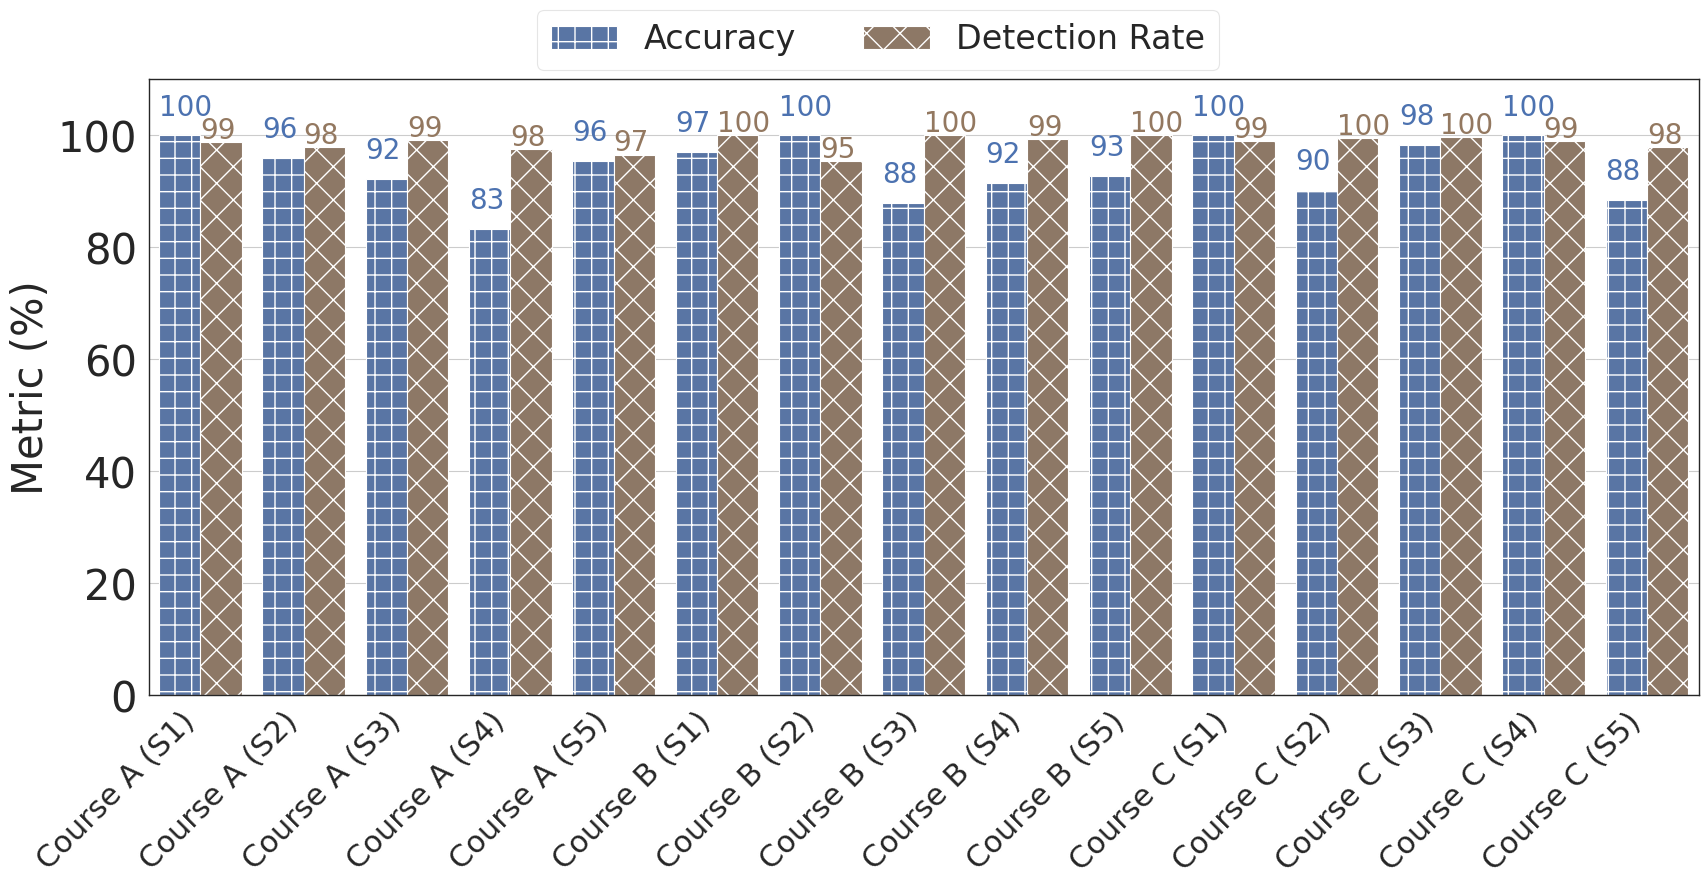

In [299]:
plt.figure(figsize=(20,8))
colors = ['#4c72b0', '#937860', '#da8bc3',  '#ccb974', '#64b5cd']
ax = sns.barplot(data=df_e2,x='SessionName',y='value', hue='variable', palette=colors)

# plt.xlim(0,100)
# Define some hatches
hatches = ['+', 'x', '\\', '*', 'o','-']
for i,p in enumerate(ax.patches):
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
    # print(i)
    p.set_hatch(hatches[i//15])

    # adding text to each bar
    if i<15:
        ax.text(x = p.get_x(), # x-coordinate position of data label, padded 3 to right of bar
                y = p.get_y()+height+5, # # y-coordinate position of data label, padded to be in the middle of the bar
                s = "{:.0f}".format(height), # data label, formatted to ignore decimals
                         va = "center", size=20, color=colors[i//15]) # sets vertical alignment (va) to center
    else:
        ax.text(x = p.get_x(), # x-coordinate position of data label, padded 3 to right of bar
                y = p.get_y()+height+2, # # y-coordinate position of data label, padded to be in the middle of the bar
                s = "{:.0f}".format(height), # data label, formatted to ignore decimals
                         va = "center", size=20, color=colors[i//15]) # sets vertical alignment (va) to center
        
plt.legend(ncol=2, bbox_to_anchor=(0.24, 1.14),fontsize=24)
plt.xlabel('')
plt.ylim(0,110)
plt.yticks(range(0,101,20),range(0,101,20))
plt.ylabel('Metric (%)')
_ = plt.xticks(range(15),df_e1_baseline.SessionName.unique(),rotation=45,ha='right',fontsize=22)

plt.savefig(f"{plotting_dir}/eval_2_acc_det.png", dpi=300, bbox_inches='tight')

# Eval 3: Across Session

In [6]:
# parameters for this result
# MATCH_THRESHOLD=0.3
# MATCH_PAIR_MAX_THRESHOLD = 0.2
# MATCH_PAIR_AREA_THRESHOLD = 20



In [96]:
# get precision and id matches for our method
e3_course_results = []
run_type ='unconstrained'
for course in course_map.keys():
    best_method_result_file = f'results/across_session_{run_type}_matches_{course}.csv'
    df_best = pd.read_csv(best_method_result_file)
    best_precision = precision_score(df_best['gt'], df_best['pred'])
    best_count = df_best[(df_best.pred==1)].shape[0]
    baseline_method_result_file = f'results/across_session_reid_{run_type}_matches_{course}.csv'
    df_baseline = pd.read_csv(baseline_method_result_file)
    baseline_precision = precision_score(df_baseline['gt'], df_baseline['pred'])
    baseline_count = df_baseline[(df_baseline.pred==1)].shape[0]
    e3_course_results.append([course, best_precision, best_count, baseline_precision, baseline_count])
df_e3 = pd.DataFrame(e3_course_results, columns= ['Course','Best method(Our)-Precision', 'Best-method-NumPairs', 'Baseline(Re-ID)-Precision', 'Baseline-Numpairs'])    

In [97]:
df_e3

Course  Best method(Our)-Precision  Best-method-NumPairs  \
0  05748A                    0.600000                    50   
1  17214B                    0.560000                    25   
2  17214C                    0.518519                    27   

   Baseline(Re-ID)-Precision  Baseline-Numpairs  
0                   0.461538                 26  
1                   0.250000                 20  
2                   0.250000                 28

In [89]:
# df_e3 = pd.read_csv(f'{result_dir}/Eval3_across_session.csv')
df_e3 = pd.melt(df_e3, id_vars='Course')

In [90]:
e3_map = {
    'Best method(Our)-Precision':'Our Approach',
    'Best-method-NumPairs':'Our Approach',
    'Baseline(Re-ID)-Precision':'Baseline (Re-ID)',
    'Baseline-Numpairs':'Baseline (Re-ID)'}
# e3_course_map = {'Course 1': 'Course A','Course 2':'Course B','Course 3':'Course C'}
df_e3['Method'] = df_e3['variable'].apply(lambda x: e3_map[x])
df_e3['Course'] = df_e3['Course'].apply(lambda x: course_map[x])
df_e3

Course                    variable      value            Method
0   Course A  Best method(Our)-Precision   0.740741      Our Approach
1   Course B  Best method(Our)-Precision   0.916667      Our Approach
2   Course C  Best method(Our)-Precision   0.900000      Our Approach
3   Course A        Best-method-NumPairs  54.000000      Our Approach
4   Course B        Best-method-NumPairs  24.000000      Our Approach
5   Course C        Best-method-NumPairs  30.000000      Our Approach
6   Course A   Baseline(Re-ID)-Precision   0.483871  Baseline (Re-ID)
7   Course B   Baseline(Re-ID)-Precision   0.411765  Baseline (Re-ID)
8   Course C   Baseline(Re-ID)-Precision   0.440000  Baseline (Re-ID)
9   Course A           Baseline-Numpairs  31.000000  Baseline (Re-ID)
10  Course B           Baseline-Numpairs  17.000000  Baseline (Re-ID)
11  Course C           Baseline-Numpairs  25.000000  Baseline (Re-ID)

In [91]:
df_e3_precision = df_e3[df_e3.variable.isin(['Best method(Our)-Precision', 'Baseline(Re-ID)-Precision'])]
df_e3_precision = df_e3_precision.sort_values(by=['Course','Method'])
df_e3_precision['value'] = df_e3_precision['value']*100
df_e3_precision

Course                    variable      value            Method
6  Course A   Baseline(Re-ID)-Precision  48.387097  Baseline (Re-ID)
0  Course A  Best method(Our)-Precision  74.074074      Our Approach
7  Course B   Baseline(Re-ID)-Precision  41.176471  Baseline (Re-ID)
1  Course B  Best method(Our)-Precision  91.666667      Our Approach
8  Course C   Baseline(Re-ID)-Precision  44.000000  Baseline (Re-ID)
2  Course C  Best method(Our)-Precision  90.000000      Our Approach

In [92]:
# combined plot between Precision and student count (on twin y axis)
# plt.figure(figsize=(20,8))
# colors = ['#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']
# ax = sns.barplot(data=df_e3_precision,x='Course',y='value', hue='Method', palette=colors)

# # plt.xlim(0,100)
# # Define some hatches
# hatches = ['+', 'x', '\\', '*', 'o','-']
# for i,p in enumerate(ax.patches):
#     height = p.get_height() # height of each horizontal bar is the same
#     width = p.get_width() # width (average number of passengers)
#     # print(i)
#     p.set_hatch(hatches[i//3])

#     # adding text to each bar
#     ax.text(x = p.get_x()+(width/4), # x-coordinate position of data label, padded 3 to right of bar
#             y = p.get_y()+height+5, # # y-coordinate position of data label, padded to be in the middle of the bar
#             s = "{:.0f}%".format(height), # data label, formatted to ignore decimals
#                      va = "center", size=50, color=colors[i//3]) # sets vertical alignment (va) to center
        
# plt.legend(ncol=2, bbox_to_anchor=(0.05, 1.22),fontsize=40)
# plt.xlabel('')
# plt.ylim(0,110)
# plt.yticks(range(0,101,20),range(0,101,20))
# plt.ylabel('Precision (%)')
# # _ = plt.xticks(range(15),df_e1_baseline.SessionName.unique(),rotation=45,ha='right',fontsize=22)

# # plot line for Count of IDs 
# df_e3_count = df_e3[~df_e3.variable.isin(['Best method(Our)-Precision', 'Baseline(Re-ID)-Precision'])]
# df_e3_count = df_e3_count.sort_values(by=['Course','Method'])
# df_e3_count

# colors = ['#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']

# ax2 = ax.twinx()
# sns.lineplot(data=df_e3_count,x='Course',y='value', style='Method', color= 'k', ax=ax2)

# for i,p in enumerate(ax2.patches):
#     # height = p.get_height() # height of each horizontal bar is the same
#     # width = p.get_width() # width (average number of passengers)
#     # print(i)
#     # p.set_hatch(hatches[i//3])

#     # adding text to each line
#     ax.text(x = p.get_x(), # x-coordinate position of data label, padded 3 to right of bar
#             y = p.get_y(), # # y-coordinate position of data label, padded to be in the middle of the bar
#             s = "{:.0f}".format(height), # data label, formatted to ignore decimals
#                      va = "center", size=50, color='k') # sets vertical alignment (va) to center
        
# plt.legend(ncol=2, bbox_to_anchor=(0.05, 1.22),fontsize=40)
# plt.xlabel('')
# plt.ylim(0,60)
# # plt.yticks(range(0,101,20),range(0,101,20))
# plt.ylabel('Correct ID-Pairs Detected\n(Count)')


# plt.savefig(f"{plotting_dir}/eval_3_combine.png", dpi=300, bbox_inches='tight')


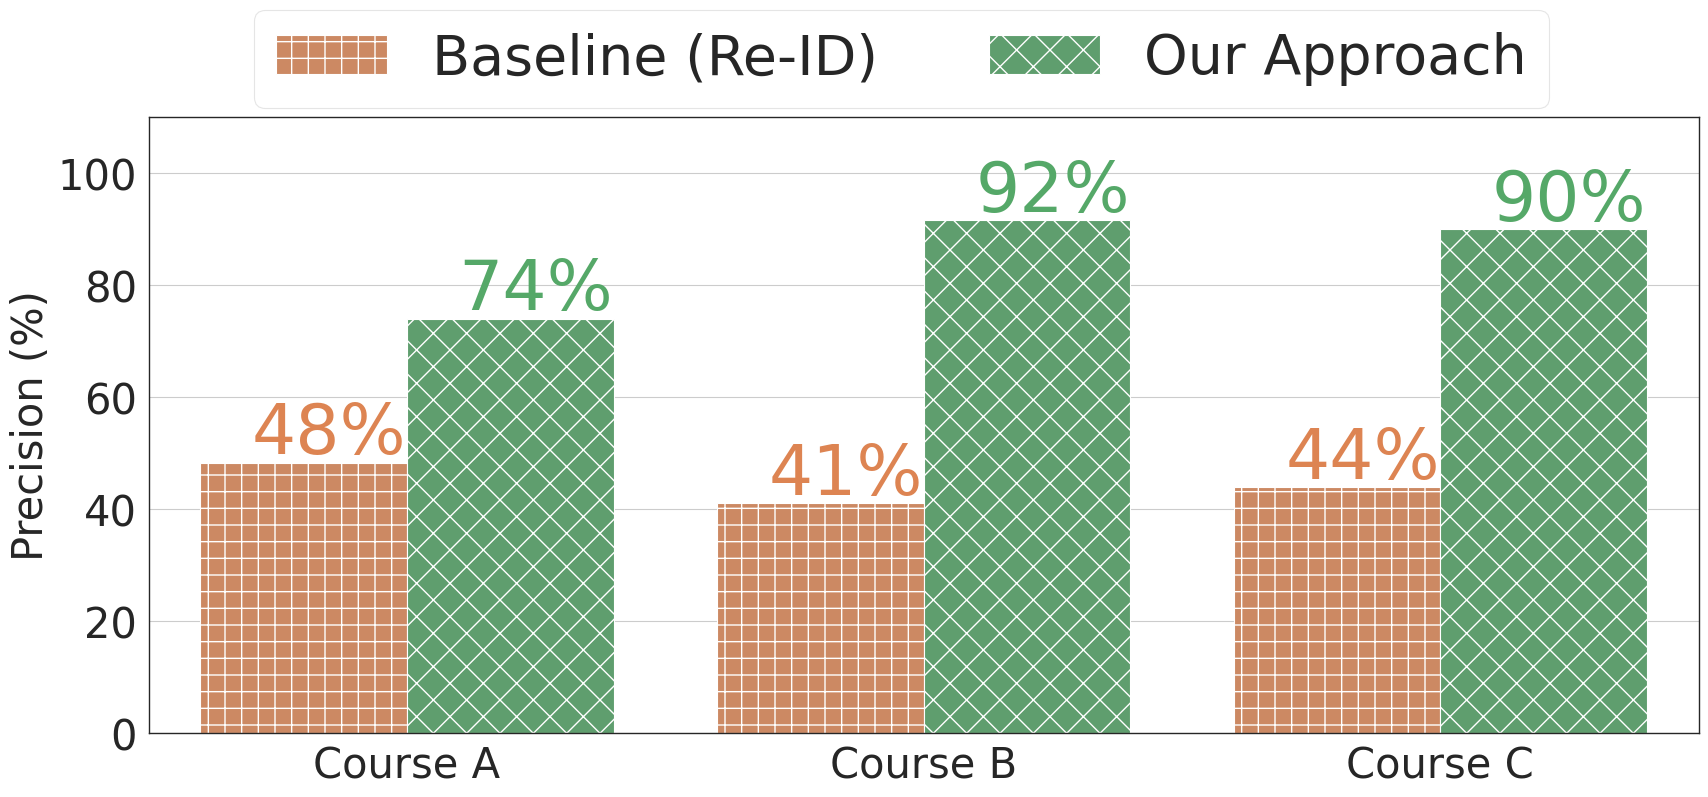

In [93]:
plt.figure(figsize=(20,8))
colors = ['#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']
ax = sns.barplot(data=df_e3_precision,x='Course',y='value', hue='Method', palette=colors)

# plt.xlim(0,100)
# Define some hatches
hatches = ['+', 'x', '\\', '*', 'o','-']
for i,p in enumerate(ax.patches):
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
    # print(i)
    p.set_hatch(hatches[i//3])

    # adding text to each bar
    ax.text(x = p.get_x()+(width/4), # x-coordinate position of data label, padded 3 to right of bar
            y = p.get_y()+height+5, # # y-coordinate position of data label, padded to be in the middle of the bar
            s = "{:.0f}%".format(height), # data label, formatted to ignore decimals
                     va = "center", size=50, color=colors[i//3]) # sets vertical alignment (va) to center
        
plt.legend(ncol=2, bbox_to_anchor=(0.05, 1.22),fontsize=40)
plt.xlabel('')
plt.ylim(0,110)
plt.yticks(range(0,101,20),range(0,101,20))
plt.ylabel('Precision (%)')
# _ = plt.xticks(range(15),df_e1_baseline.SessionName.unique(),rotation=45,ha='right',fontsize=22)

plt.savefig(f"{plotting_dir}/eval_3_{run_type}_precision.png", dpi=300, bbox_inches='tight')

In [94]:
df_e3_count = df_e3[~df_e3.variable.isin(['Best method(Our)-Precision', 'Baseline(Re-ID)-Precision'])]
df_e3_count = df_e3_count.sort_values(by=['Course','Method'])
df_e3_count

Course              variable  value            Method
9   Course A     Baseline-Numpairs   31.0  Baseline (Re-ID)
3   Course A  Best-method-NumPairs   54.0      Our Approach
10  Course B     Baseline-Numpairs   17.0  Baseline (Re-ID)
4   Course B  Best-method-NumPairs   24.0      Our Approach
11  Course C     Baseline-Numpairs   25.0  Baseline (Re-ID)
5   Course C  Best-method-NumPairs   30.0      Our Approach

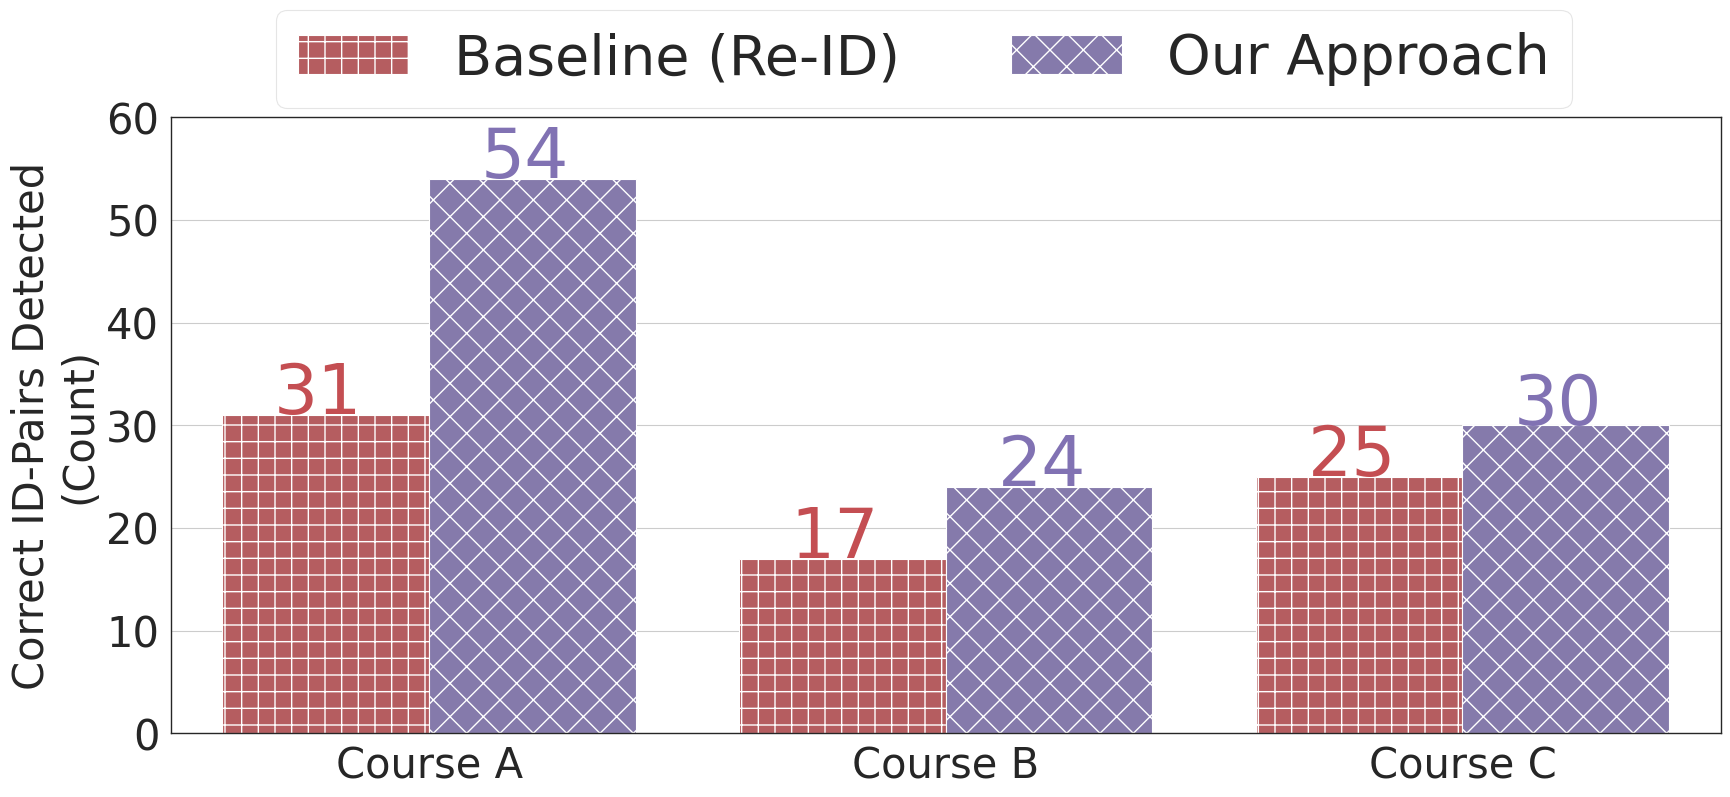

In [95]:
plt.figure(figsize=(20,8))
colors = ['#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']
ax = sns.barplot(data=df_e3_count,x='Course',y='value', hue='Method', palette=colors)

# plt.xlim(0,100)
# Define some hatches
hatches = ['+', 'x', '\\', '*', 'o','-']
for i,p in enumerate(ax.patches):
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
    # print(i)
    p.set_hatch(hatches[i//3])

    # adding text to each bar
    ax.text(x = p.get_x()+(width/4), # x-coordinate position of data label, padded 3 to right of bar
            y = p.get_y()+height+2, # # y-coordinate position of data label, padded to be in the middle of the bar
            s = "{:.0f}".format(height), # data label, formatted to ignore decimals
                     va = "center", size=50, color=colors[i//3]) # sets vertical alignment (va) to center
        
plt.legend(ncol=2, bbox_to_anchor=(0.05, 1.22),fontsize=40)
plt.xlabel('')
plt.ylim(0,60)
# plt.yticks(range(0,101,20),range(0,101,20))
plt.ylabel('Correct ID-Pairs Detected\n(Count)')
# _ = plt.xticks(range(15),df_e1_baseline.SessionName.unique(),rotation=45,ha='right',fontsize=22)

plt.savefig(f"{plotting_dir}/eval_3_{run_type}_count.png", dpi=300, bbox_inches='tight')

# Case Study 1A

In [79]:
df_cs_1a = pd.read_csv(f'{result_dir}/CS_1A_single_session.csv')
df_cs_1a

StudentID  time  hand_raised
0            0     0         True
1            0     3         True
2            0    10         True
3            0    20         True
4            0    61         True
..         ...   ...          ...
164         17    49         True
165         17    50         True
166         17    51         True
167         18    59         True
168         18    67         True

[169 rows x 3 columns]

/tmp/ipykernel_58389/3922950723.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([pd.to_datetime(tm*60, unit='s').strftime('%H:%M') for tm in ax.get_xticks()], fontsize=24)


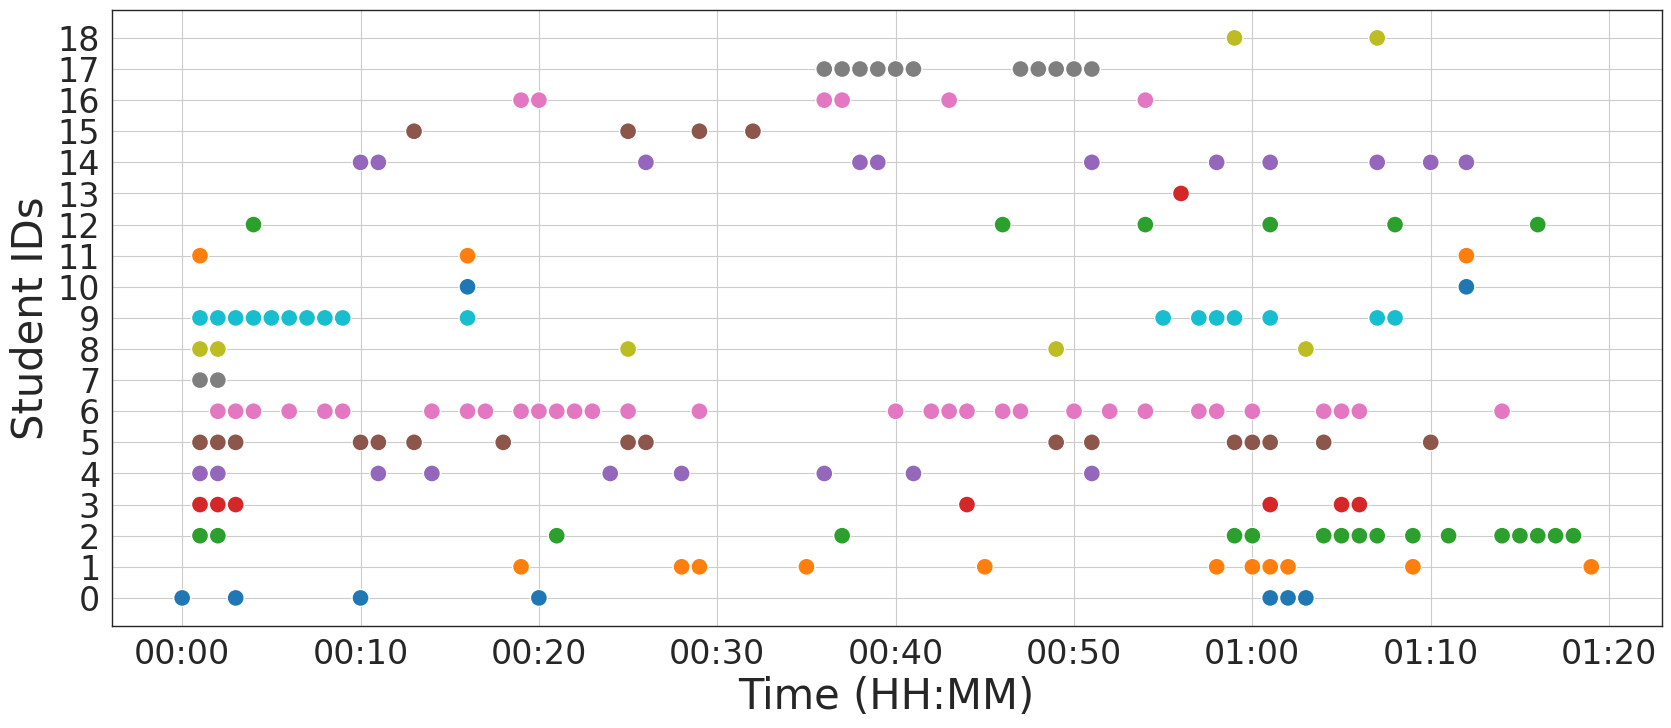

In [93]:
_,ax = plt.subplots(1,1,figsize=(20,8))
sns.scatterplot(df_cs_1a, y='StudentID',x='time',hue='StudentID',palette='tab10',s=150,marker='o',ax=ax)
ax.set_xticklabels([pd.to_datetime(tm*60, unit='s').strftime('%H:%M') for tm in ax.get_xticks()], fontsize=24)
plt.yticks(range(df_cs_1a.StudentID.unique().shape[0]), df_cs_1a.StudentID.unique(),fontsize=24)
plt.legend(ncol=10, bbox_to_anchor=(-0.02, 1.2),fontsize=20,markerscale=4)
ax.get_legend().remove()
plt.ylabel("Student IDs")
plt.xlabel("Time (HH:MM)")
plt.grid(True)
plt.savefig(f'{plotting_dir}/CS_1A.png',dpi=300, bbox_inches='tight')

# Case Study: 1B

In [81]:
df_cs_1b = pd.read_csv(f'{result_dir}/CS_1B_multiple_sessions.csv')
df_cs_1b['SessionName'] = df_cs_1b.session.apply(lambda x: session_only_map[x])
df_cs_1b = df_cs_1b.sort_values(by='SessionName')
df_cs_1b

StudentID  time                                        session SessionName
44          8    10  classinsight-cmu_05748A_ghc_4101_201902051630   Session 1
38          1     1  classinsight-cmu_05748A_ghc_4101_201902051630   Session 1
39          2     5  classinsight-cmu_05748A_ghc_4101_201902051630   Session 1
40          4     4  classinsight-cmu_05748A_ghc_4101_201902051630   Session 1
41          5     1  classinsight-cmu_05748A_ghc_4101_201902051630   Session 1
..        ...   ...                                            ...         ...
33         15     6  classinsight-cmu_05748A_ghc_4101_201904021630   Session 5
34         16     7  classinsight-cmu_05748A_ghc_4101_201904021630   Session 5
35         18     5  classinsight-cmu_05748A_ghc_4101_201904021630   Session 5
28         10     1  classinsight-cmu_05748A_ghc_4101_201904021630   Session 5
19          0     8  classinsight-cmu_05748A_ghc_4101_201904021630   Session 5

[90 rows x 4 columns]

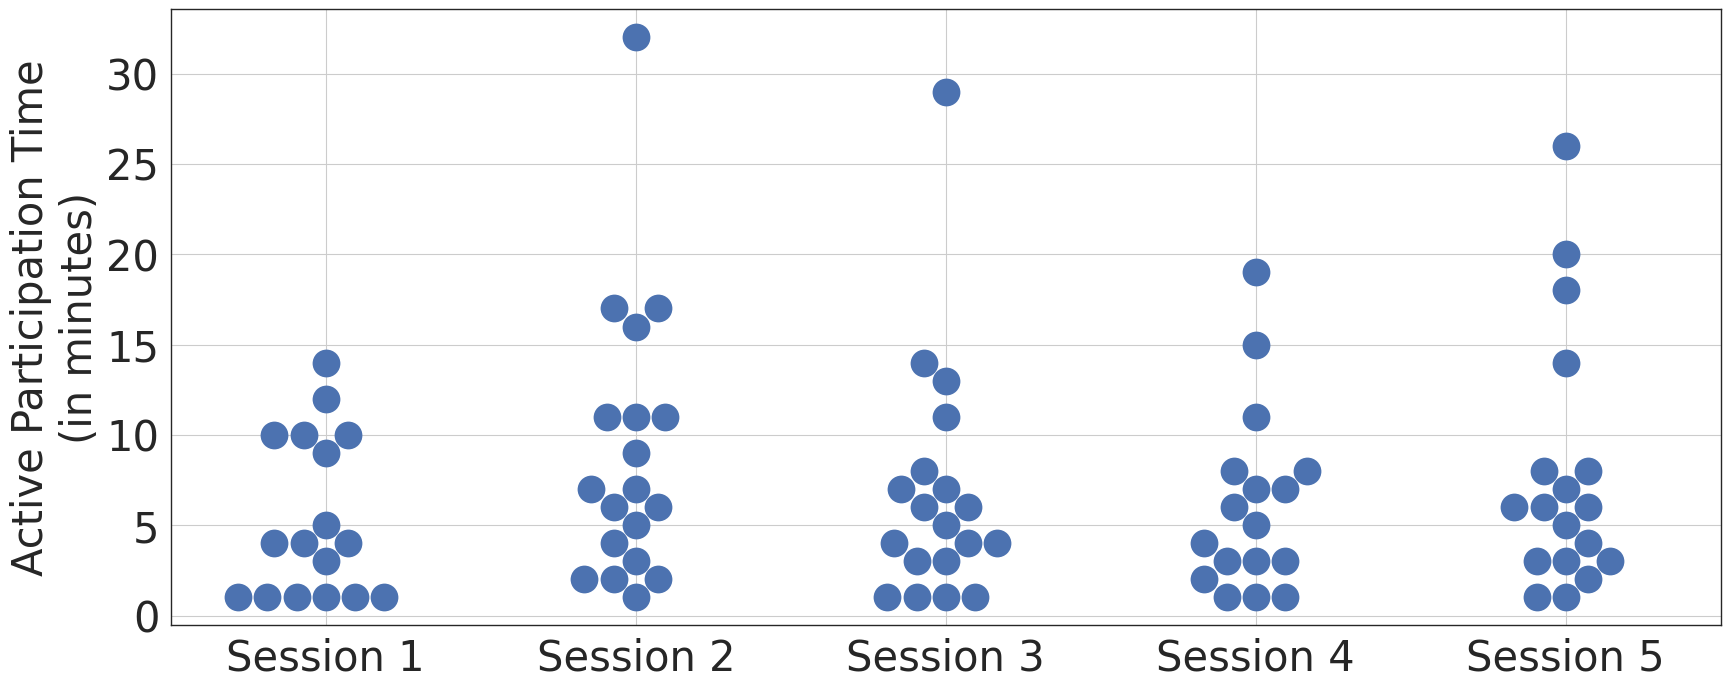

In [181]:
_,ax = plt.subplots(1,1,figsize=(20,8))
sns.swarmplot(df_cs_1b, x = 'SessionName',y='time',ax=ax,s=20)
plt.ylabel("Active Participation Time\n(in minutes)")
plt.xlabel("")
_ = plt.xticks(range(5),df_cs_1b.SessionName.unique(),fontsize=30)
plt.grid(True)
plt.savefig(f'{plotting_dir}/CS_1B.png',dpi=300, bbox_inches='tight')

# Case Study: 1C

In [94]:
student_map = {0:'Student A', 1:'Student B'}
df_cs_1c = pd.read_csv(f'{result_dir}/CS_1C_across_session.csv')
df_cs_1c['SessionName'] = df_cs_1c.session.apply(lambda x: session_only_map[x])
df_cs_1c = df_cs_1c.sort_values(by='SessionName')
df_cs_1c['Student'] = df_cs_1c.StudentID.apply(lambda x: student_map[x])
df_cs_1c

StudentID  time                                        session SessionName  \
0          0    10  classinsight-cmu_05748A_ghc_4101_201902051630   Session 1   
1          1     9  classinsight-cmu_05748A_ghc_4101_201902051630   Session 1   
2          0    17  classinsight-cmu_05748A_ghc_4101_201902141630   Session 2   
3          1    11  classinsight-cmu_05748A_ghc_4101_201902141630   Session 2   
4          0    14  classinsight-cmu_05748A_ghc_4101_201902281630   Session 3   
5          1     7  classinsight-cmu_05748A_ghc_4101_201902281630   Session 3   
6          0    11  classinsight-cmu_05748A_ghc_4101_201903071630   Session 4   
7          1    19  classinsight-cmu_05748A_ghc_4101_201903071630   Session 4   
8          0     6  classinsight-cmu_05748A_ghc_4101_201904021630   Session 5   
9          1     8  classinsight-cmu_05748A_ghc_4101_201904021630   Session 5   

     Student  
0  Student A  
1  Student B  
2  Student A  
3  Student B  
4  Student A  
5  Student B  
6  Student A  
7  Student B  
8  Student A  
9  Student B

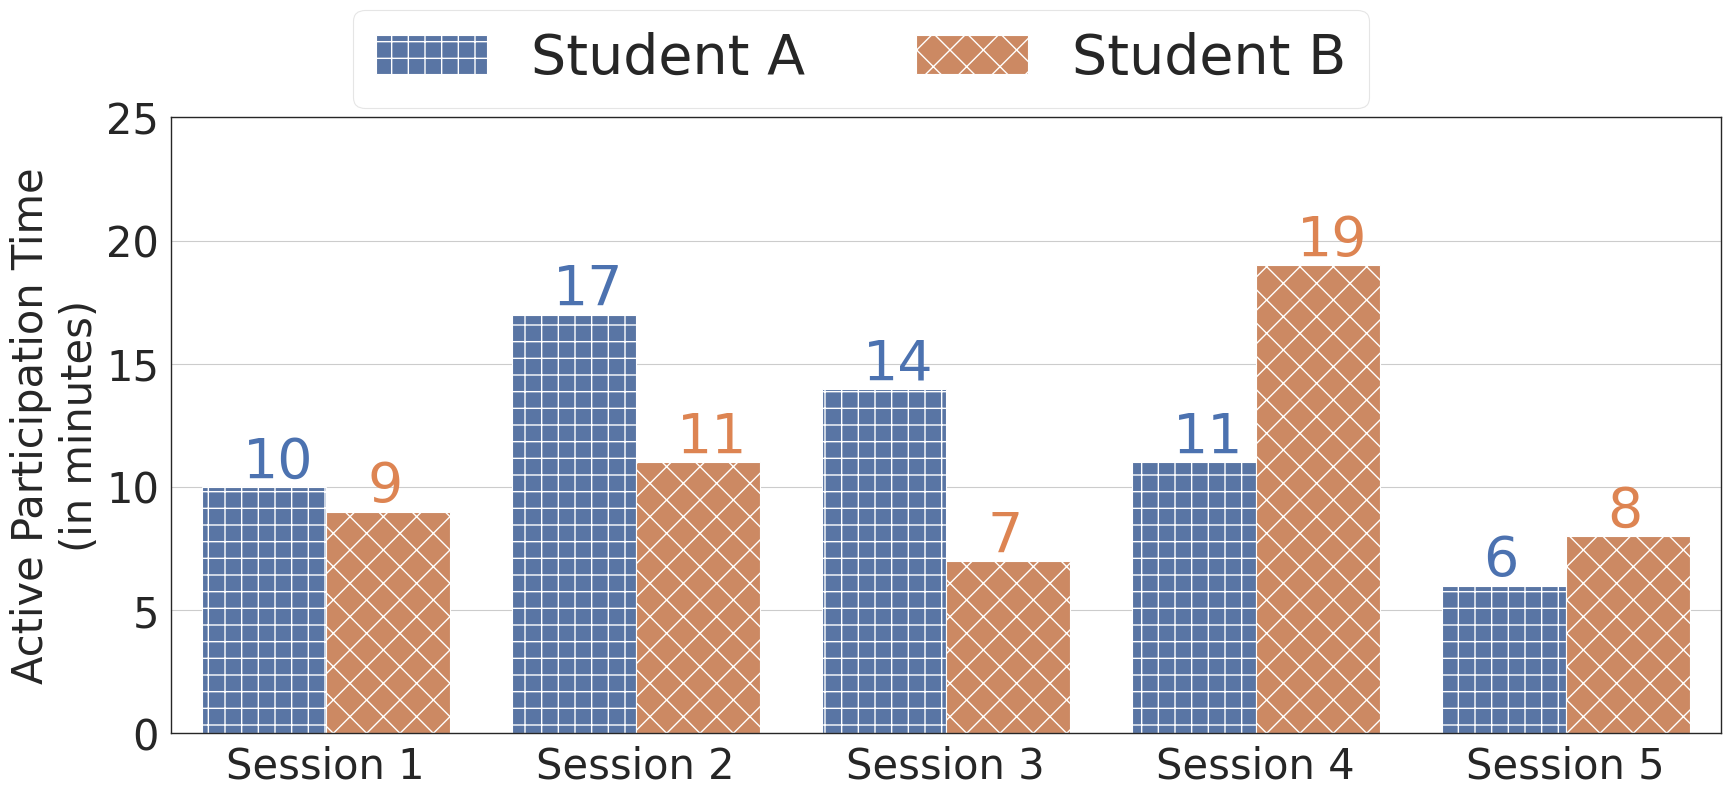

In [182]:
plt.figure(figsize=(20,8))
colors = ['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']
ax = sns.barplot(data=df_cs_1c,x='SessionName',y='time', hue='Student', palette=colors)

# plt.xlim(0,100)
# Define some hatches
hatches = ['+', 'x', '\\', '*', 'o','-']
for i,p in enumerate(ax.patches):
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
    # print(i)
    p.set_hatch(hatches[i//5])

    
    ax.text(x = p.get_x()+(width/3), # x-coordinate position of data label, padded 3 to right of bar
            y = p.get_y()+height+1, # # y-coordinate position of data label, padded to be in the middle of the bar
            s = "{:.0f}".format(height), # data label, formatted to ignore decimals
                     va = "center", size=40, color=colors[i//5]) # sets vertical alignment (va) to center
        
plt.legend(ncol=2, bbox_to_anchor=(0.1, 1.22),fontsize=40)
plt.xlabel('')
plt.ylim(0,25)
plt.xticks(fontsize=30)
# plt.yticks(range(0,101,20),range(0,101,20))
plt.ylabel('Active Participation Time\n(in minutes)')
# _ = plt.xticks(range(5),df_e1_baseline.SessionName.unique(),rotation=45,ha='right',fontsize=22)

plt.savefig(f"{plotting_dir}/CS_1C.png", dpi=300, bbox_inches='tight')

# Case Study 1C- Distribution

In [134]:
# df_across_session_dist[df_across_session_dist['all']<0]
course='17214C'
# df_across_session_dist.tail()

# selected_student_ids = {
#     '05748A':[0,1,2,3,5,7,8,9,10,11,14],
#     '17214B':[0,1,2,4,5,6,7,8, 9],
#     '17214C':[0,1,2,3,4,7,8,10,11],
# }

In [135]:
df_across_session_dist= pd.read_csv(f'CS_1C_across_session_{course}.csv')
print(df_across_session_dist.groupby(['StudentID','type'])['participation'].count())
# df_across_session_dist = df_across_session_dist[df_across_session_dist.StudentID.isin(selected_student_ids[course])]
print(df_across_session_dist.groupby(['StudentID','type'])['participation'].count())
print(df_across_session_dist['type'].value_counts())
unique_ids = df_across_session_dist.StudentID.unique()
id_map = {unique_ids[xr]:xr for xr in range(len(unique_ids))}
id_map
df_across_session_dist['participation_cat'] = df_across_session_dist['participation'].apply(lambda x: 6 if x>20 else 0 if x==0 else 1 + (x//5))
df_across_session_dist['StudentID'] = df_across_session_dist['StudentID'].apply(lambda x: str(id_map[x]))
df_across_session_dist['type'] = df_across_session_dist['type'].apply(lambda x: "Student Participation (Predicted)" if (x=='Prediction') else 'Student Participation (Ground Truth)')
df_across_session_dist['type'].value_counts()


StudentID  type        
0          Ground Truth    4
           Prediction      6
1          Ground Truth    3
           Prediction      3
2          Ground Truth    4
           Prediction      4
3          Ground Truth    4
           Prediction      2
4          Ground Truth    5
           Prediction      1
5          Ground Truth    3
           Prediction      2
6          Ground Truth    1
           Prediction      2
7          Ground Truth    2
           Prediction      3
8          Ground Truth    2
           Prediction      2
9          Ground Truth    1
10         Ground Truth    2
11         Ground Truth    3
12         Ground Truth    2
Name: participation, dtype: int64
StudentID  type        
0          Ground Truth    4
           Prediction      6
1          Ground Truth    3
           Prediction      3
2          Ground Truth    4
           Prediction      4
3          Ground Truth    4
           Prediction      2
4          Ground Truth    5
           Predicti

Student Participation (Ground Truth)    36
Student Participation (Predicted)       25
Name: type, dtype: int64

In [136]:
df_across_session_dist[df_across_session_dist.type=='Student Participation (Ground Truth)'].groupby('StudentID').agg({'participation':'median'})

participation
StudentID               
0                    1.0
1                    2.0
10                   7.0
11                   1.0
12                   3.0
2                    4.0
3                    1.5
4                    2.0
5                    6.0
6                    1.0
7                    2.5
8                    6.0
9                    4.0

In [137]:
gt_mean = df_across_session_dist[df_across_session_dist.type=='Student Participation (Ground Truth)'].groupby('StudentID').agg({'participation':'mean'}).participation.mean()
pred_mean = df_across_session_dist[df_across_session_dist.type=='Student Participation (Predicted)'].groupby('StudentID').agg({'participation':'mean'}).participation.mean()
print(gt_mean, pred_mean)

gt_mean_cat = 6 if gt_mean>20 else 0 if gt_mean==0 else 1+(gt_mean/5)
pred_mean_cat = 6 if pred_mean>20 else 0 if pred_mean==0 else 1+(pred_mean/5)
gt_mean_cat, pred_mean_cat

3.576923076923077 3.1944444444444446


(1.7153846153846155, 1.6388888888888888)

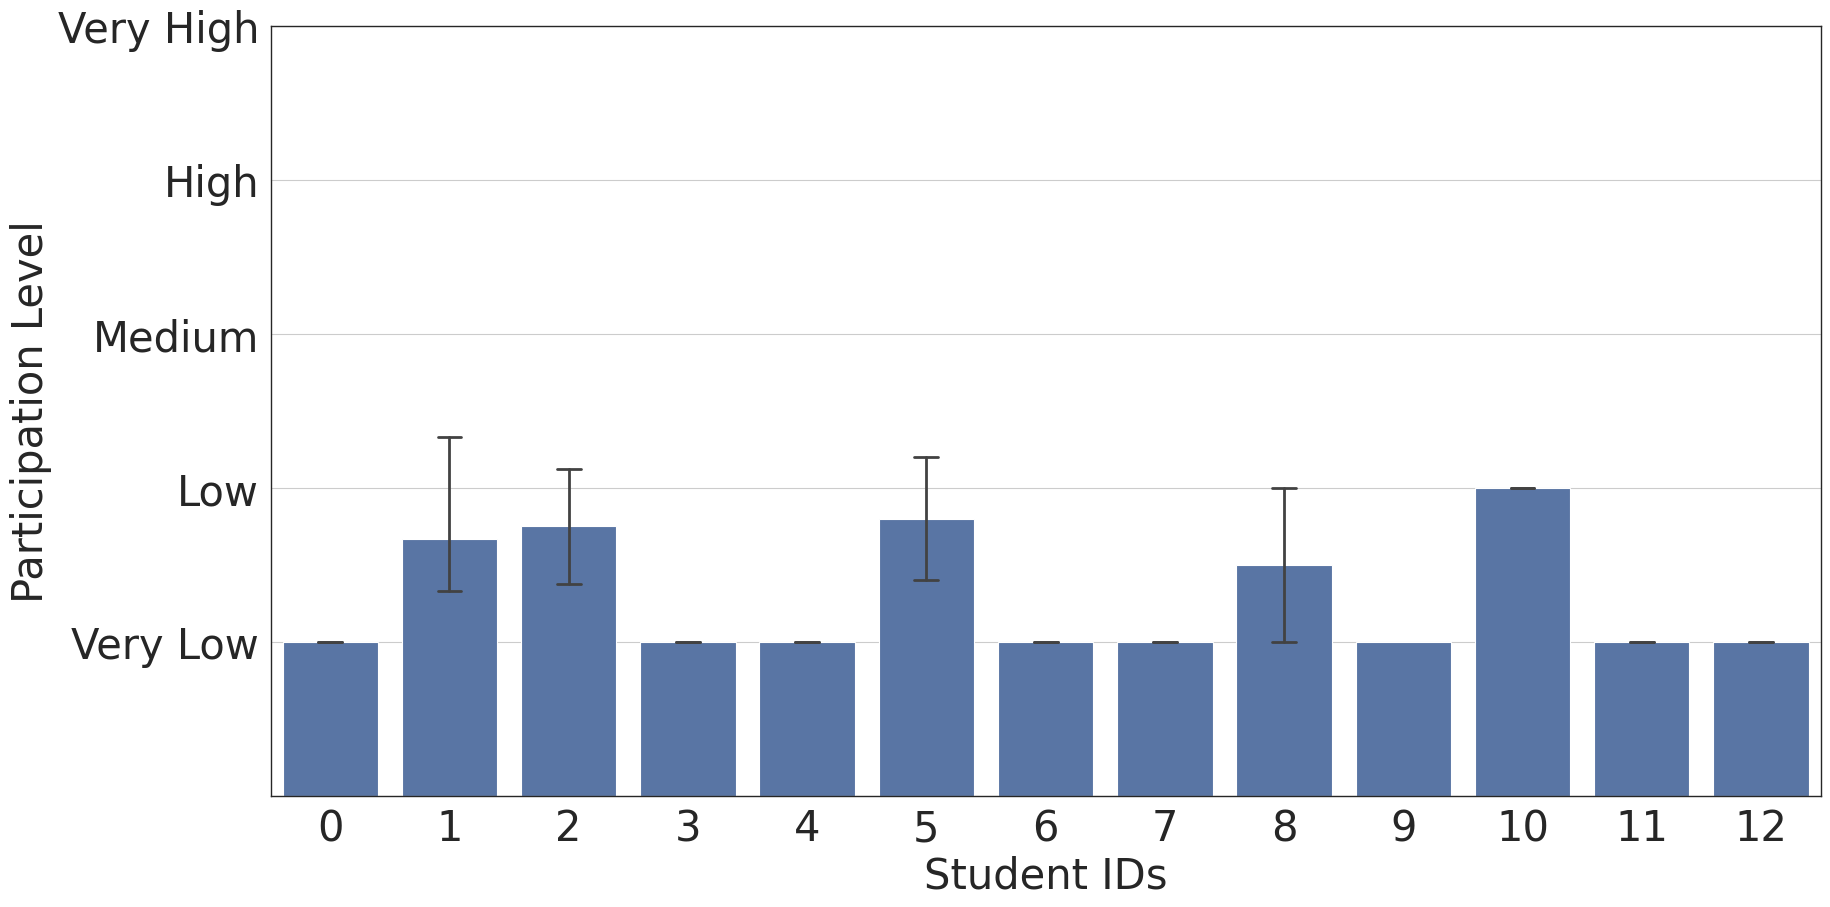

In [138]:
# single graph for Students using predicted values only

fig, axn = plt.subplots(1,1, figsize= (20,10))
# sns.violinplot(data=df_across_session_dist, x='StudentID',y='all', hue='type', split=True, gap=.1, inner='point', ax = axn, linewidth=2)
# sns.violinplot(data=df_across_session_dist, x='StudentID',y='all', hue='type', split=True, gap=.1, inner='point', ax = axn, linewidth=2)
# sns.boxplot(data=df_across_session_dist, y='StudentID',x='participation', showfliers=False, whis=(25,75), hue='type', ax = axn,linewidth=1)
g = sns.barplot(data=df_across_session_dist, x='StudentID',y='participation_cat',ax=axn, color = colors[0], errwidth=2, errorbar=('ci',80),capsize=0.2)


# h = []
# for rectangle in g.patches:
#     h.append(rectangle.get_height())
# h = np.array(h).reshape(2, int(len(h)/2))
# gt_mean_cat = np.mean(h[0])
# pred_mean_cat = np.mean(h[0])

# # h = h[0]+h[1]
# print(h)

# colors = ['#4c72b0', '#dd8452']
# plt.axhline(y=gt_mean_cat, label= 'Average Student Participation', color=colors[0], linestyle='--')
# plt.axhline(y=pred_mean_cat, label= 'Average (Predicted)', color=colors[1],linestyle='-.')
# plt.ylim(0,30)
# sns.scatterplot(data=df_across_session_dist, y='StudentID',x='ref', ax = axn, color='k', marker="d",s=200, label='Participation (Observed Session)')
# plt.legend(loc='upper right', bbox_to_anchor= (1,1))
plt.ylabel('Participation Level')
# plt.xlim(1,8)
plt.ylim(bottom=0)
axn.set_yticks([0,1,2,3,4,5],['', 'Very Low','Low','Medium','High','Very High'])
plt.xlabel('Student IDs')
# plt.title(f'Course:{course}')
# plt.legend(ncol=2, bbox_to_anchor=(0.03, 0.99),fontsize=24)
# plt.grid()
plt.savefig(f"{plotting_dir}/CS_1C_Bar_{course}_predicted.png", dpi=300, bbox_inches='tight')



[1.3333333333333333, 1.6666666666666667, 3.0, 2.6, 1.3333333333333333, 2.2857142857142856, 3.0, 1.6666666666666667, 2.5, 2.0, 1.6666666666666667, 6.0, 2.0, 1.0, 2.0, 4.0, 2.0, 1.6666666666666667, 1.5]


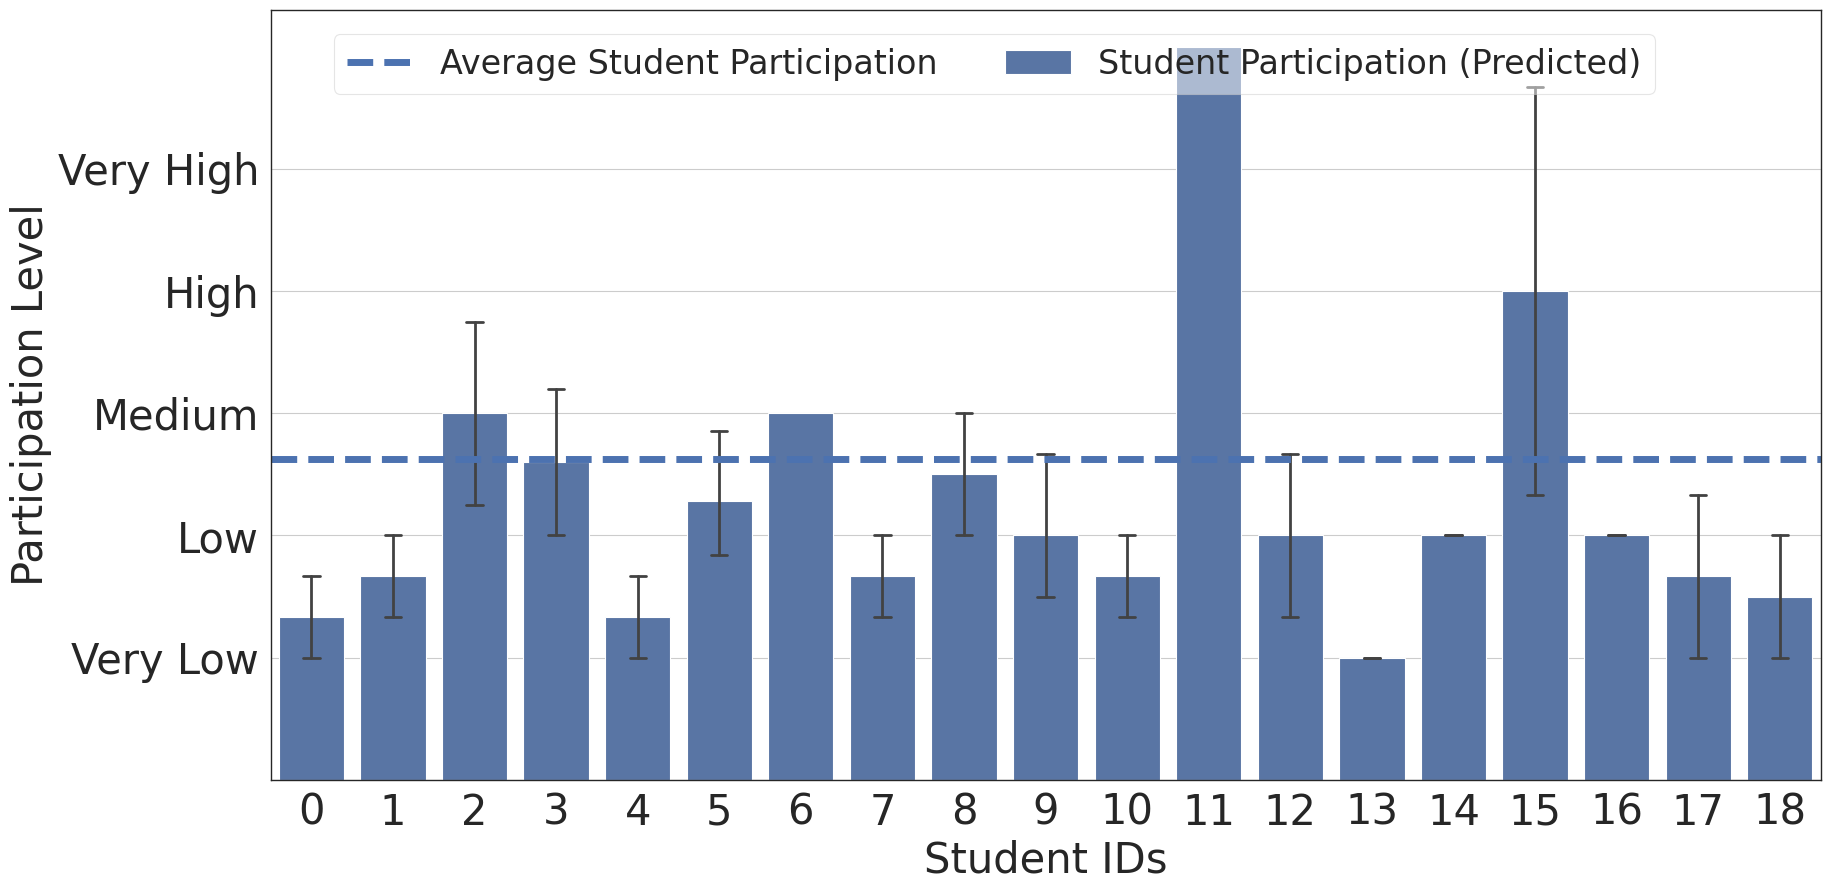

In [124]:
fig, axn = plt.subplots(1,1, figsize= (20,10))
# sns.violinplot(data=df_across_session_dist, x='StudentID',y='all', hue='type', split=True, gap=.1, inner='point', ax = axn, linewidth=2)
# sns.violinplot(data=df_across_session_dist, x='StudentID',y='all', hue='type', split=True, gap=.1, inner='point', ax = axn, linewidth=2)
# sns.boxplot(data=df_across_session_dist, y='StudentID',x='participation', showfliers=False, whis=(25,75), hue='type', ax = axn,linewidth=1)
g = sns.barplot(data=df_across_session_dist, x='StudentID',y='participation_cat', hue='type',ax=axn, errwidth=2, errorbar=('ci',80),capsize=0.2)


h = []
for rectangle in g.patches:
    h.append(rectangle.get_height())
h = np.array(h).reshape(2, int(len(h)/2))
gt_mean_cat = np.mean(h[0])
pred_mean_cat = np.mean(h[0])

# h = h[0]+h[1]
print(h)

colors = ['#4c72b0', '#dd8452']
plt.axhline(y=gt_mean_cat, label= 'Average Student Participation', color=colors[0], linestyle='--')
# plt.axhline(y=pred_mean_cat, label= 'Average (Predicted)', color=colors[1],linestyle='-.')
# plt.ylim(0,30)
# sns.scatterplot(data=df_across_session_dist, y='StudentID',x='ref', ax = axn, color='k', marker="d",s=200, label='Participation (Observed Session)')
# plt.legend(loc='upper right', bbox_to_anchor= (1,1))
plt.ylabel('Participation Level')
# plt.xlim(1,8)
plt.ylim(bottom=0)
axn.set_yticks([0,1,2,3,4,5],['', 'Very Low','Low','Medium','High','Very High'])
plt.xlabel('Student IDs')
# plt.title(f'Course:{course}')
plt.legend(ncol=2, bbox_to_anchor=(0.03, 0.99),fontsize=24)
# plt.grid()
plt.savefig(f"{plotting_dir}/CS_1C_Bar_{course}.png", dpi=300, bbox_inches='tight')


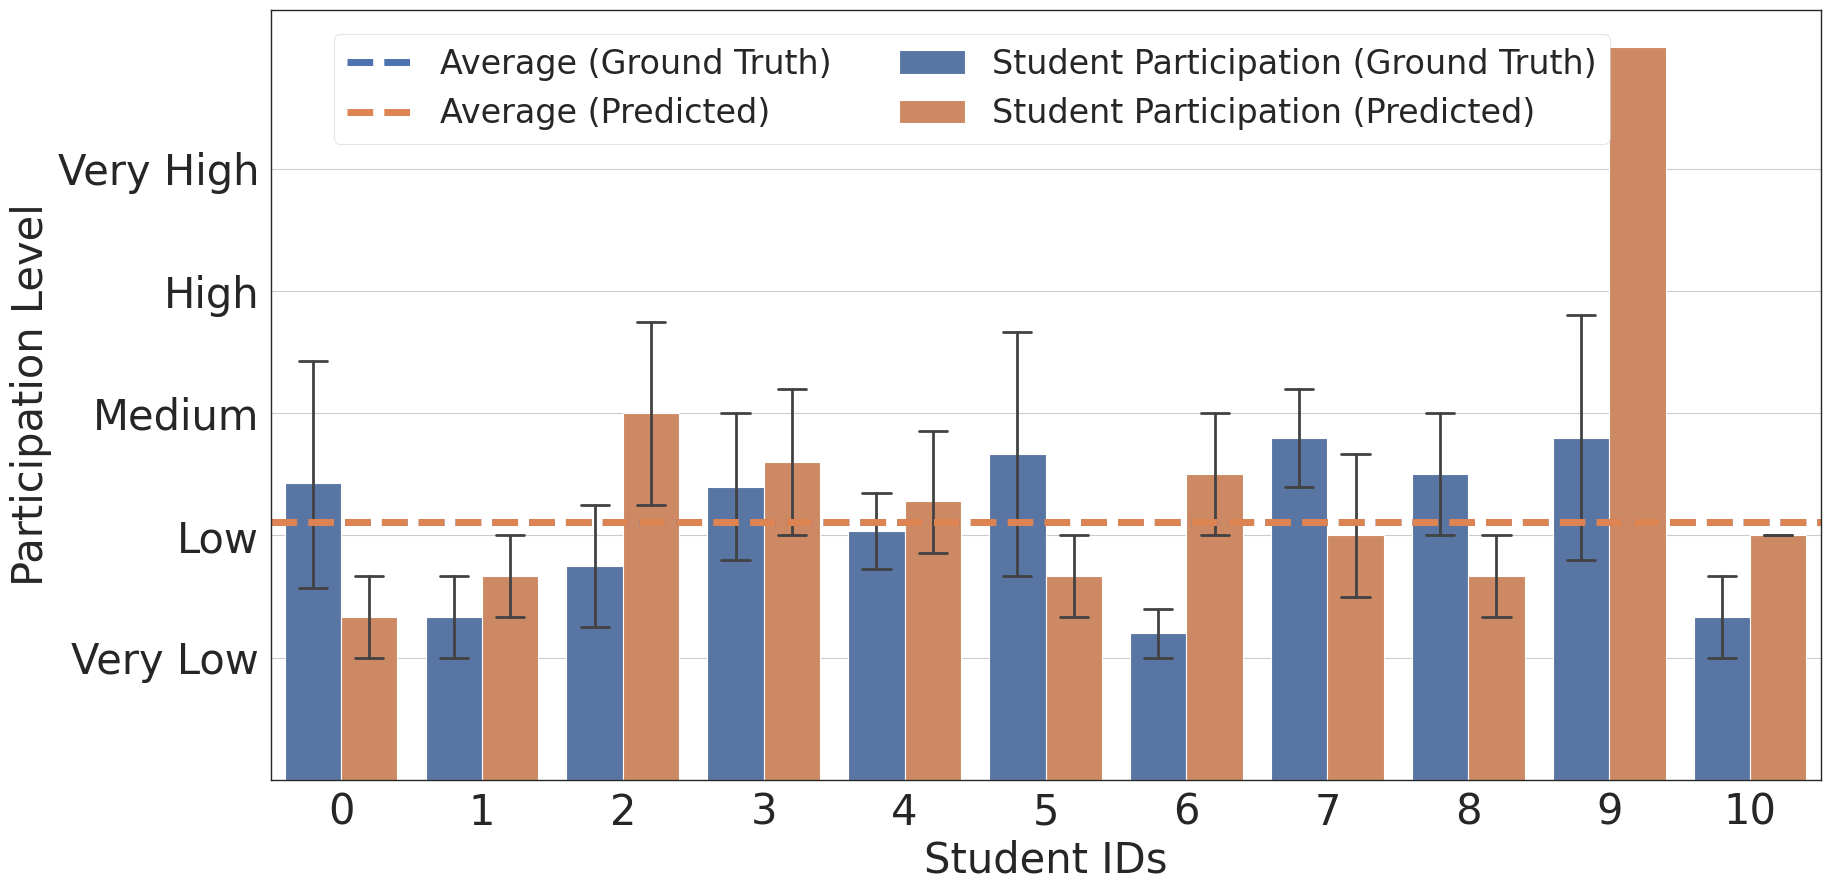

In [103]:
fig, axn = plt.subplots(1,1, figsize= (20,10))
# sns.violinplot(data=df_across_session_dist, x='StudentID',y='all', hue='type', split=True, gap=.1, inner='point', ax = axn, linewidth=2)
# sns.violinplot(data=df_across_session_dist, x='StudentID',y='all', hue='type', split=True, gap=.1, inner='point', ax = axn, linewidth=2)
# sns.boxplot(data=df_across_session_dist, y='StudentID',x='participation', showfliers=False, whis=(25,75), hue='type', ax = axn,linewidth=1)
sns.barplot(data=df_across_session_dist, x='StudentID',y='participation_cat', hue='type',ax=axn, errwidth=2, errorbar=('ci',80),capsize=0.2)
colors = ['#4c72b0', '#dd8452']
plt.axhline(y=gt_mean_cat, label= 'Average (Ground Truth)', color=colors[0], linestyle='--')
plt.axhline(y=pred_mean_cat, label= 'Average (Predicted)', color=colors[1],linestyle='--')
# plt.ylim(0,30)
# sns.scatterplot(data=df_across_session_dist, y='StudentID',x='ref', ax = axn, color='k', marker="d",s=200, label='Participation (Observed Session)')
# plt.legend(loc='upper right', bbox_to_anchor= (1,1))
plt.ylabel('Participation Level')
# plt.xlim(1,8)
plt.ylim(bottom=0)
axn.set_yticks([0,1,2,3,4,5],['', 'Very Low','Low','Medium','High','Very High'])
plt.xlabel('Student IDs')
# plt.title(f'Course:{course}')
plt.legend(ncol=2, bbox_to_anchor=(0.03, 0.99),fontsize=24)
# plt.grid()
plt.savefig(f"{plotting_dir}/CS_1C_Bar_{course}.png", dpi=300, bbox_inches='tight')

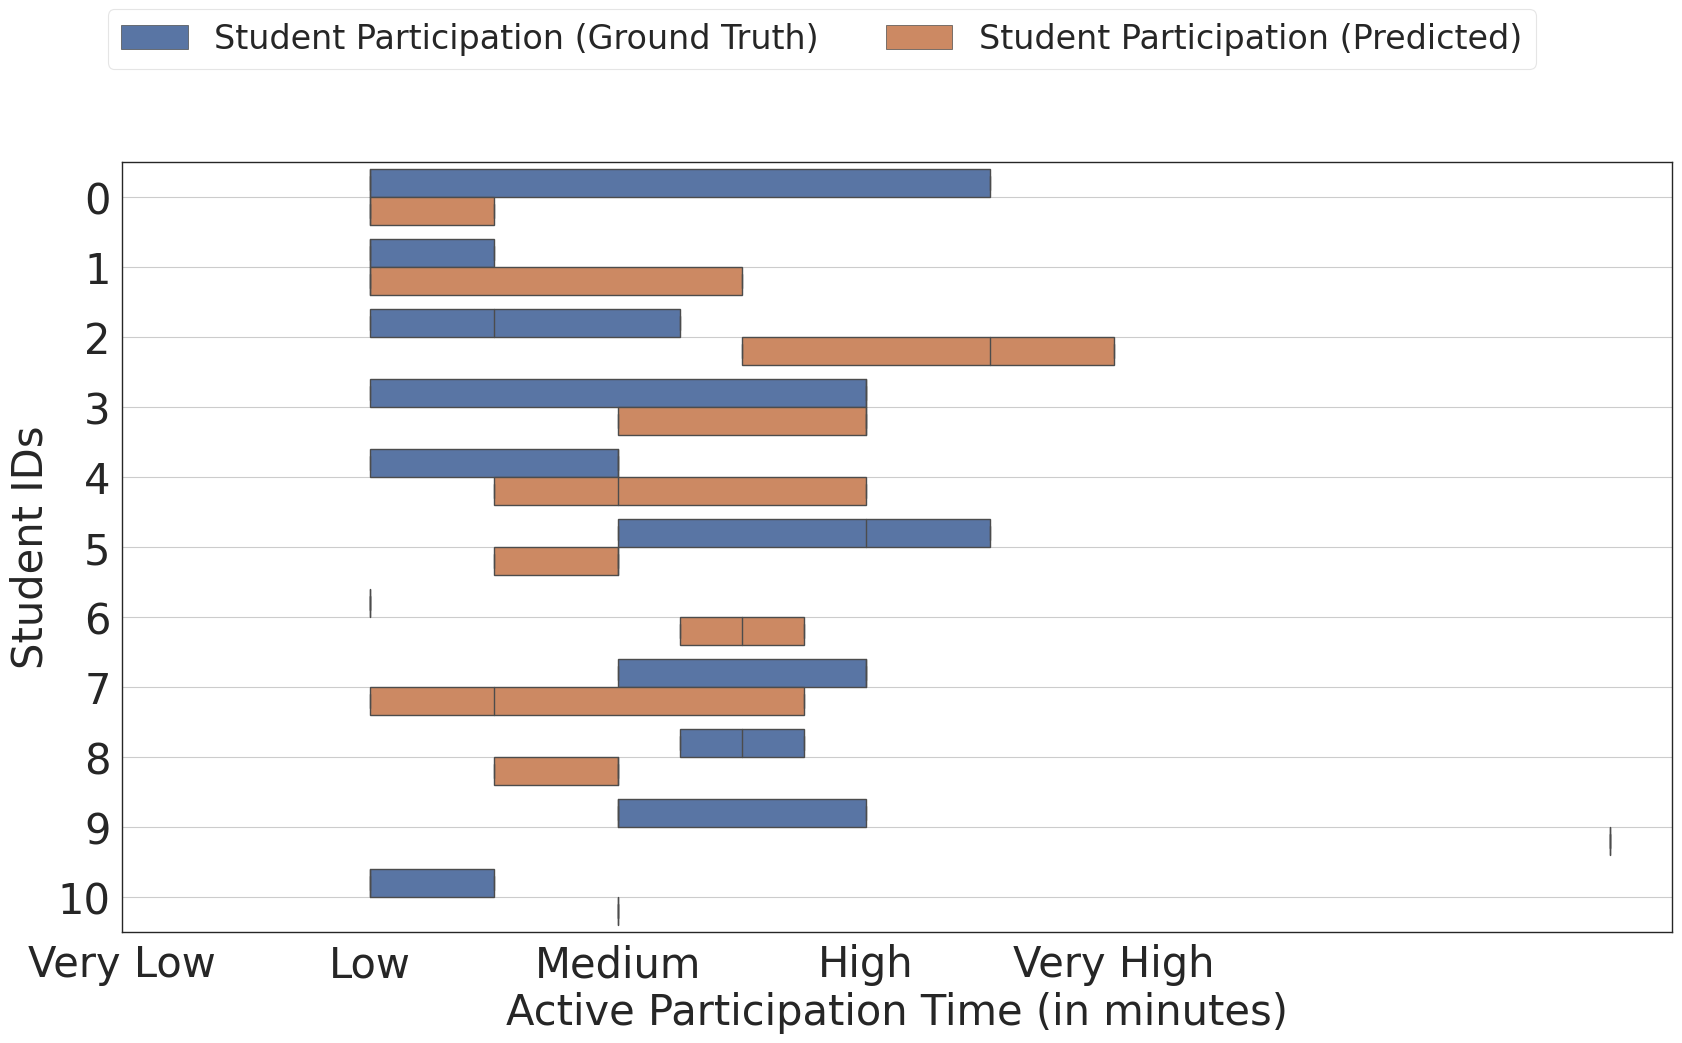

In [104]:
fig, axn = plt.subplots(1,1, figsize= (20,10))
# sns.violinplot(data=df_across_session_dist, x='StudentID',y='all', hue='type', split=True, gap=.1, inner='point', ax = axn, linewidth=2)
# sns.violinplot(data=df_across_session_dist, x='StudentID',y='all', hue='type', split=True, gap=.1, inner='point', ax = axn, linewidth=2)
sns.boxplot(data=df_across_session_dist, y='StudentID',x='participation_cat', showfliers=False, whis=(25,75), hue='type', ax = axn,linewidth=1)
axn.set_xticks([0,1,2,3,4],['Very Low','Low','Medium','High','Very High'])
# plt.ylim(0,30)
# sns.scatterplot(data=df_across_session_dist, y='StudentID',x='ref', ax = axn, color='k', marker="d",s=200, label='Participation (Observed Session)')
# plt.legend(loc='upper right', bbox_to_anchor= (1,1))
plt.xlabel('Active Participation Time (in minutes)')
plt.ylabel('Student IDs')
plt.legend(ncol=2, bbox_to_anchor=(-0.02, 1.22),fontsize=24)
plt.grid()
plt.savefig(f"{plotting_dir}/CS_1C_Dist_{course}.png", dpi=300, bbox_inches='tight')

# Case Study: 2A

In [115]:
df_cs_2a = pd.read_csv(f'{result_dir}/CS_2A_single_session.csv')
df_cs_2a
# df_cs_2a = df_cs_2a[~df_cs_2a.StudentID==18]
# df_cs_2a['time'] = df_cs_2a['time']

StudentID  time  gaze_down
0            0    45       True
1            0    49       True
2            0    57       True
3            0    58       True
4            0    59       True
..         ...   ...        ...
756         17   168       True
757         17   174       True
758         17   176       True
759         17   189       True
760         17   190       True

[761 rows x 3 columns]

In [114]:
df_cs_2a.StudentID.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 17])

/tmp/ipykernel_58389/1438173827.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([pd.to_datetime(tm*10, unit='s').strftime('%H:%M') for tm in ax.get_xticks()], fontsize=24)


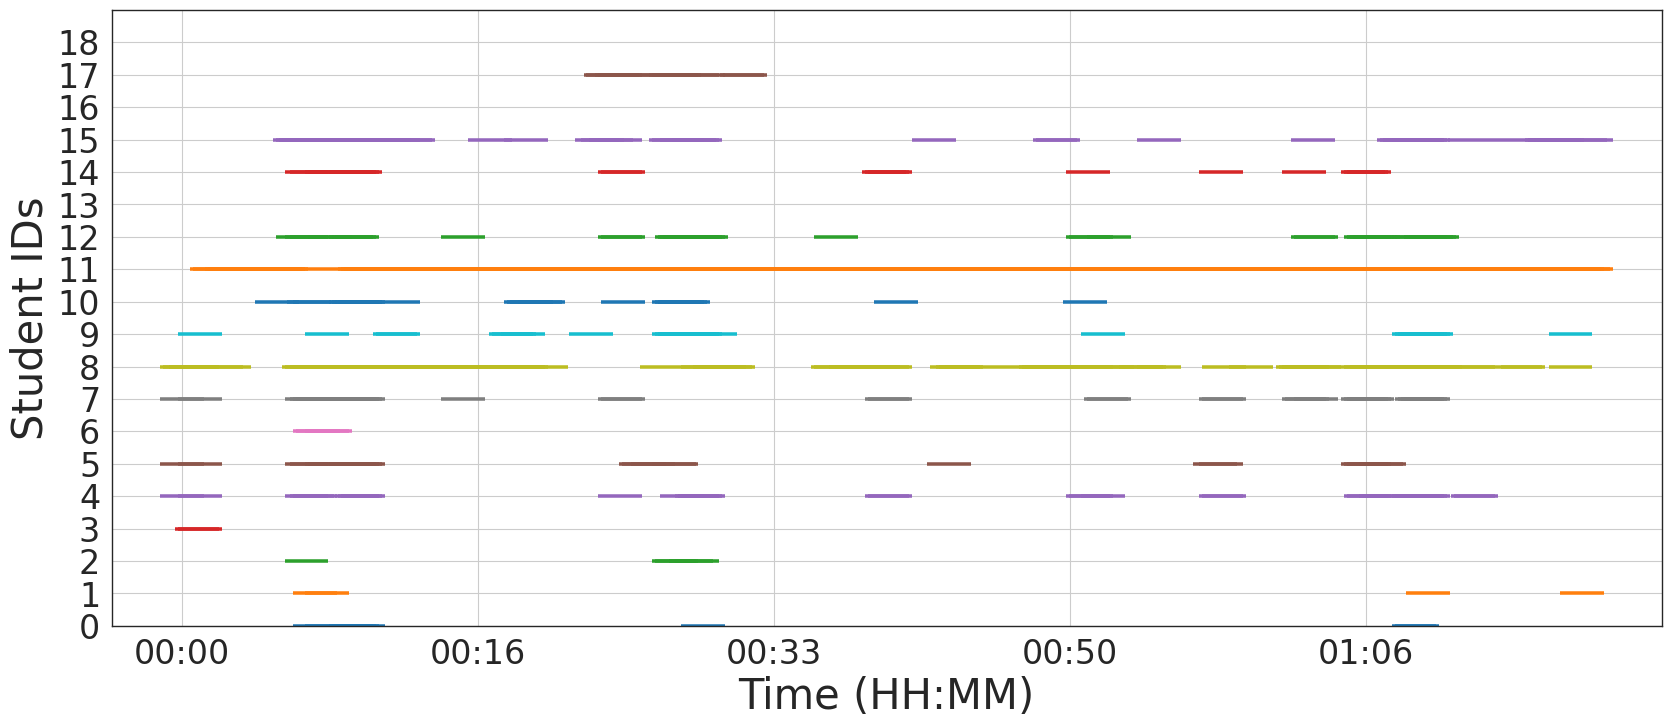

In [118]:
_,ax = plt.subplots(1,1,figsize=(20,8))
sns.scatterplot(df_cs_2a, y='StudentID',x='time',hue='StudentID',palette='tab10',s=1000,marker='_',ax=ax)
ax.set_xticklabels([pd.to_datetime(tm*10, unit='s').strftime('%H:%M') for tm in ax.get_xticks()], fontsize=24)
plt.yticks(range(df_cs_1a.StudentID.unique().shape[0]), df_cs_1a.StudentID.unique(),fontsize=24)
plt.ylim(0,19)
plt.legend(ncol=10, bbox_to_anchor=(-0.02, 1.2),fontsize=20, markerscale=4)
ax.get_legend().remove()
plt.ylabel("Student IDs")
plt.xlabel("Time (HH:MM)")
plt.grid(True)
plt.savefig(f'{plotting_dir}/CS_2A.png',dpi=300, bbox_inches='tight')

# Case Study 3A

In [119]:
course_map = {'05748A':'Course A','17214B':'Course B','17214C':'Course C'}
df_cs_3a = pd.read_csv(f'{result_dir}/CS_3A_cross_modality.csv')
df_cs_3a['SessionName'] = df_cs_3a.session.apply(lambda x: session_only_map[x])
df_cs_3a = df_cs_3a.sort_values(by=['SessionName','StudentID'])
df_cs_3a['course'] = df_cs_3a['session'].apply(lambda x: course_map[x.split("_")[-4]])
df_cs_3a['looking_up']  = 1- df_cs_3a['looking_down']
df_cs_3a['looking_down'] = df_cs_3a['looking_down']*100

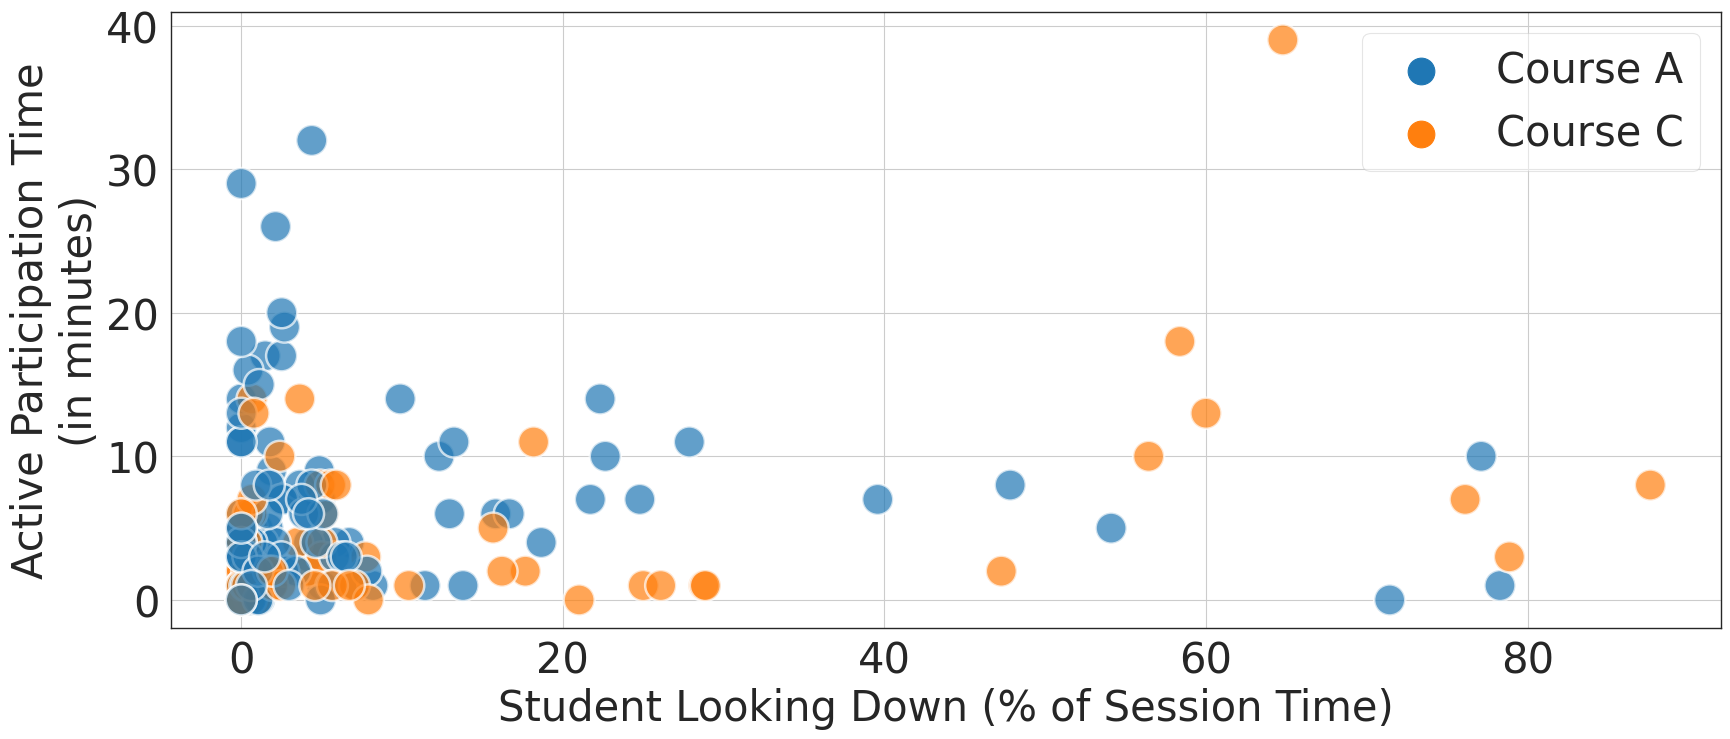

In [186]:
_,ax= plt.subplots(1,1,figsize=(20,8))
# sns.kdeplot(df_cs_3a[df_cs_3a.course.isin(['Course A','Course C'])], x='looking_down', y='hand_raises', hue='course',s=500, palette='tab10',alpha=0.7,ax=ax)
sns.scatterplot(df_cs_3a[df_cs_3a.course.isin(['Course A','Course C'])], x='looking_down', y='hand_raises', hue='course',s=500, palette='tab10',alpha=0.7,ax=ax)
plt.xlabel("Student Looking Down (% of Session Time)")
plt.ylabel("Active Participation Time\n(in minutes)")
# ax.legend(markerscale=6)
plt.legend(loc='upper right',fontsize=30,markerscale=4)
plt.savefig(f'{plotting_dir}/CS_3A.png',dpi=300, bbox_inches='tight')
# plt.ylim(0,25)

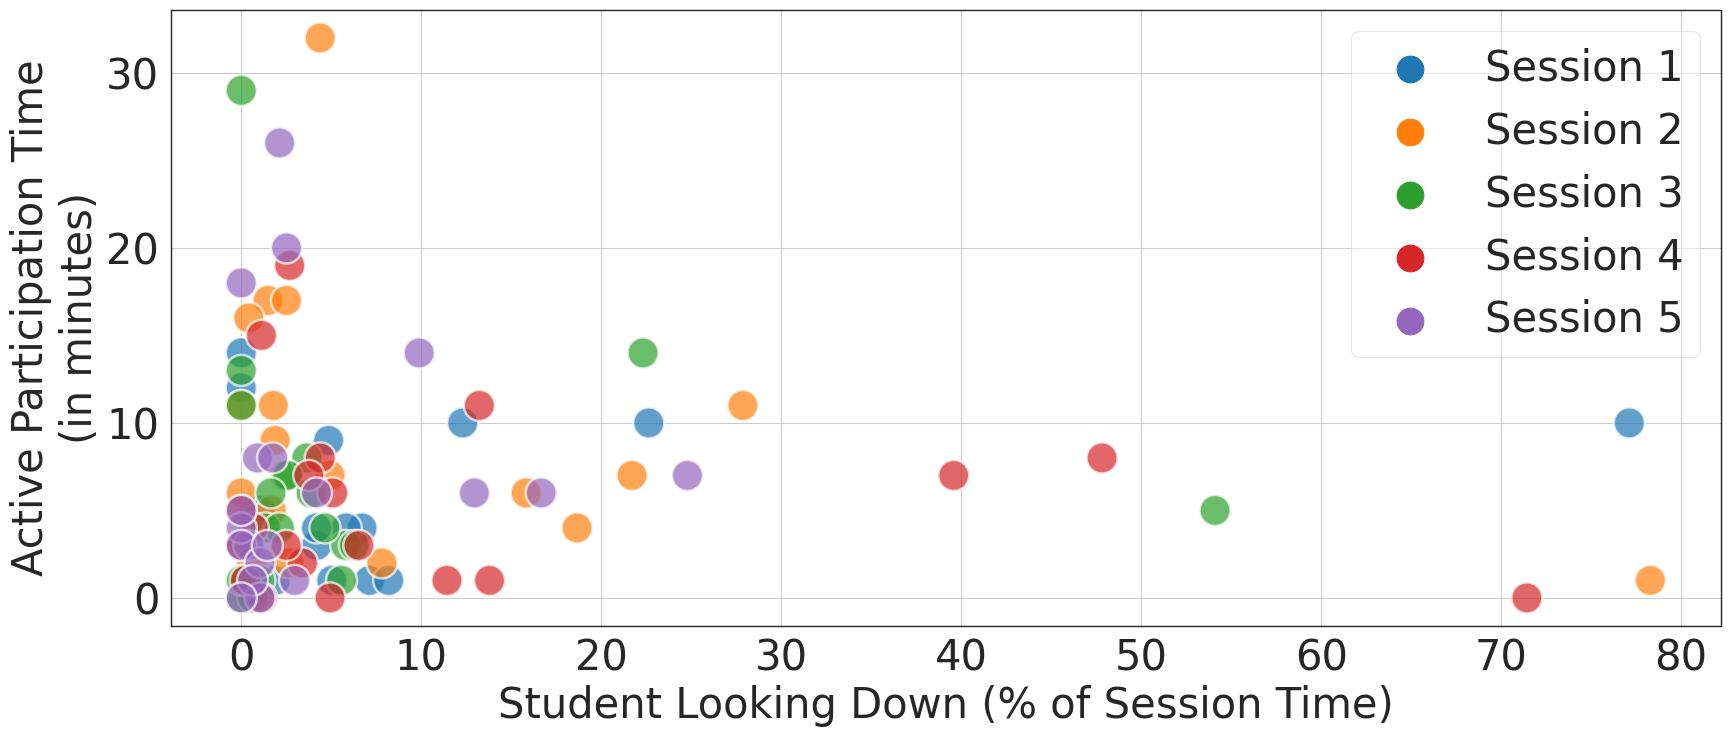

In [124]:
_,ax= plt.subplots(1,1,figsize=(20,8))
sns.scatterplot(df_cs_3a[df_cs_3a.course.isin(['Course A'])], x='looking_down', y='hand_raises', hue='SessionName',s=500, palette='tab10',alpha=0.7,ax=ax)
# sns.kdeplot(df_cs_3a[df_cs_3a.course.isin(['Course A'])], x='looking_down', y='hand_raises', hue='SessionName',s=500, palette='tab10',alpha=0.7,ax=ax,fill=True)
plt.xlabel("Student Looking Down (% of Session Time)")
plt.ylabel("Active Participation Time\n(in minutes)")
ax.legend(markerscale=6)
plt.legend(loc='upper right',fontsize=30,markerscale=4)
plt.savefig(f'{plotting_dir}/CS_3B.png',dpi=300, bbox_inches='tight')

In [125]:
colors

['#4c72b0',
 '#dd8452',
 '#55a868',
 '#c44e52',
 '#8172b3',
 '#937860',
 '#da8bc3',
 '#8c8c8c',
 '#ccb974',
 '#64b5cd']

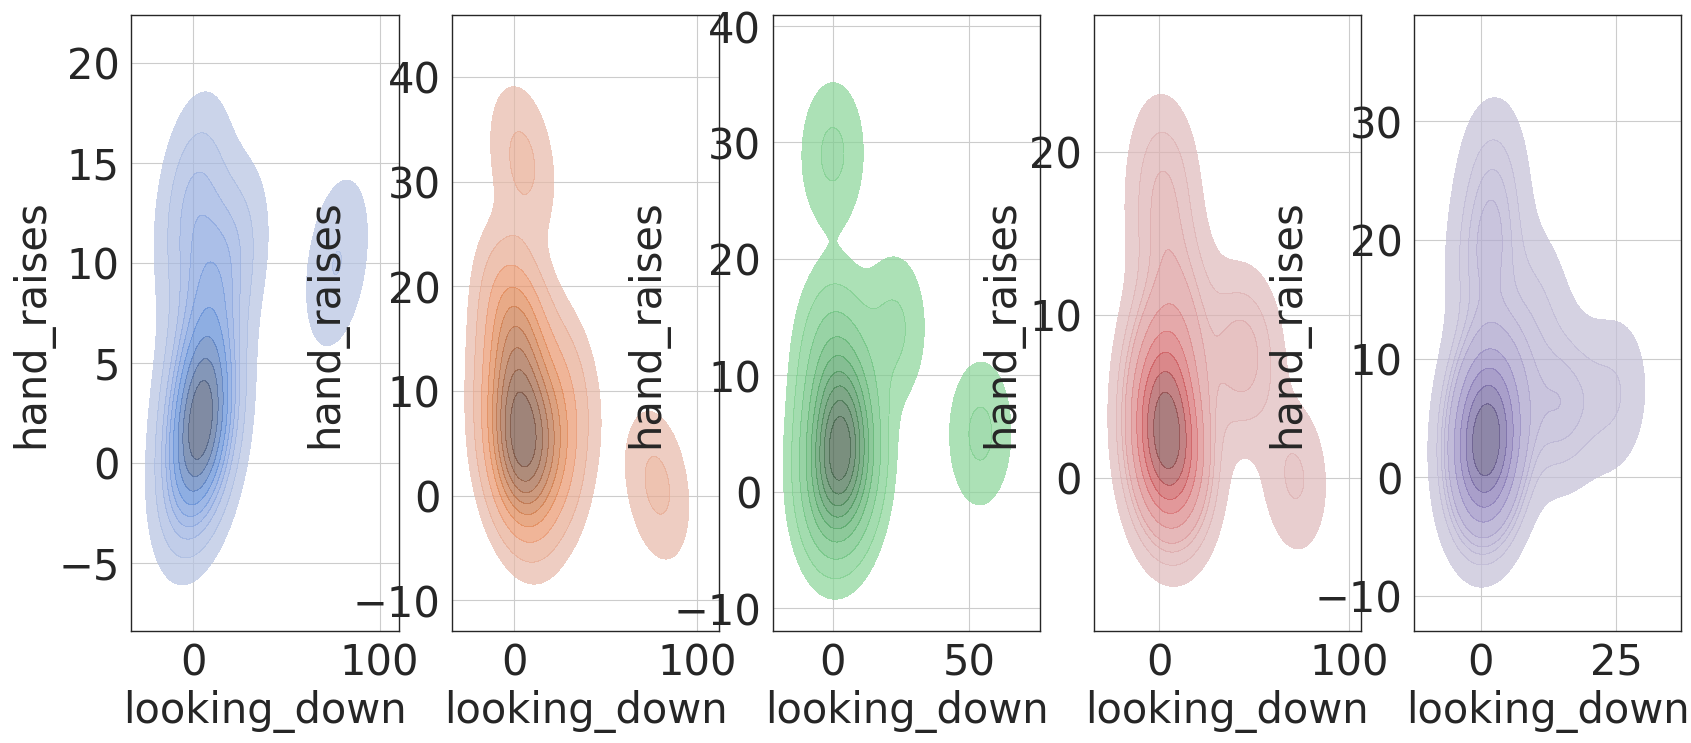

In [133]:
_,ax= plt.subplots(1,5,figsize=(20,8))
for idx, session in enumerate(df_cs_3a[df_cs_3a.course.isin(['Course A'])].SessionName.unique()):
    sns.kdeplot(df_cs_3a[df_cs_3a.course.isin(['Course A']) & (df_cs_3a.SessionName==session)], x='looking_down', y='hand_raises',color=colors[idx],alpha=0.7,ax=ax[idx],fill=True)
    # sns.kdeplot(df_cs_3a[df_cs_3a.course.isin(['Course A'])], x='looking_down', y='hand_raises', hue='SessionName',s=500, palette='tab10',alpha=0.7,ax=ax,fill=True)
    # plt.xlabel("Student Looking Down (% of Session Time)")
    # plt.ylabel("Active Participation Time\n(in minutes)")
    # ax.legend(markerscale=6)
    # plt.legend(loc='upper right',fontsize=30,markerscale=4)
    # plt.savefig(f'{plotting_dir}/CS_3B_v2.png',dpi=300, bbox_inches='tight')

In [131]:
df_cs_3a[df_cs_3a.course.isin(['Course A'])  & (df_cs_3a.SessionName==session)]

session  StudentID  hand_raises  \
19  classinsight-cmu_05748A_ghc_4101_201904021630          0            8   
20  classinsight-cmu_05748A_ghc_4101_201904021630          1            0   
21  classinsight-cmu_05748A_ghc_4101_201904021630          2            3   
22  classinsight-cmu_05748A_ghc_4101_201904021630          3            6   
23  classinsight-cmu_05748A_ghc_4101_201904021630          4            4   
24  classinsight-cmu_05748A_ghc_4101_201904021630          5            3   
25  classinsight-cmu_05748A_ghc_4101_201904021630          6            2   
26  classinsight-cmu_05748A_ghc_4101_201904021630          7            1   
27  classinsight-cmu_05748A_ghc_4101_201904021630          8           20   
28  classinsight-cmu_05748A_ghc_4101_201904021630          9           18   
29  classinsight-cmu_05748A_ghc_4101_201904021630         10            1   
30  classinsight-cmu_05748A_ghc_4101_201904021630         11            8   
31  classinsight-cmu_05748A_ghc_4101_201904021630         12            6   
32  classinsight-cmu_05748A_ghc_4101_201904021630         13           26   
33  classinsight-cmu_05748A_ghc_4101_201904021630         14           14   
34  classinsight-cmu_05748A_ghc_4101_201904021630         15            6   
35  classinsight-cmu_05748A_ghc_4101_201904021630         16            7   
36  classinsight-cmu_05748A_ghc_4101_201904021630         17            0   
37  classinsight-cmu_05748A_ghc_4101_201904021630         18            5   
38  classinsight-cmu_05748A_ghc_4101_201904021630         19            3   

    looking_down  looking_up    course SessionName  
19      0.895522    0.991045  Course A   Session 5  
20      1.039501    0.989605  Course A   Session 5  
21      0.415800    0.995842  Course A   Session 5  
22      4.184100    0.958159  Course A   Session 5  
23      0.000000    1.000000  Course A   Session 5  
24      0.000000    1.000000  Course A   Session 5  
25      1.039501    0.989605  Course A   Session 5  
26      2.962963    0.970370  Course A   Session 5  
27      2.515723    0.974843  Course A   Session 5  
28      0.000000    1.000000  Course A   Session 5  
29      0.631579    0.993684  Course A   Session 5  
30      1.742919    0.982571  Course A   Session 5  
31     12.951168    0.870488  Course A   Session 5  
32      2.132196    0.978678  Course A   Session 5  
33      9.887640    0.901124  Course A   Session 5  
34     16.666667    0.833333  Course A   Session 5  
35     24.786325    0.752137  Course A   Session 5  
36      0.000000    1.000000  Course A   Session 5  
37      0.000000    1.000000  Course A   Session 5  
38      1.449275    0.985507  Course A   Session 5

In [42]:
np.unique(df_e1.Type)

array(['Edusense', 'GroundTruth', 'OC-SORT+RemoveEphemeralIDs',
       'OC-SORT+RemoveEphemeralIDs+GlobalMatch',
       'OC-SORT+RemoveEphemeralIDs+LocalIDC',
       'OC-SORT+RemoveEphemeralIDs+LocalIDC+GlobalIDC', 'OC-SORT-Only'],
      dtype=object)

Text(0, 0.5, '')

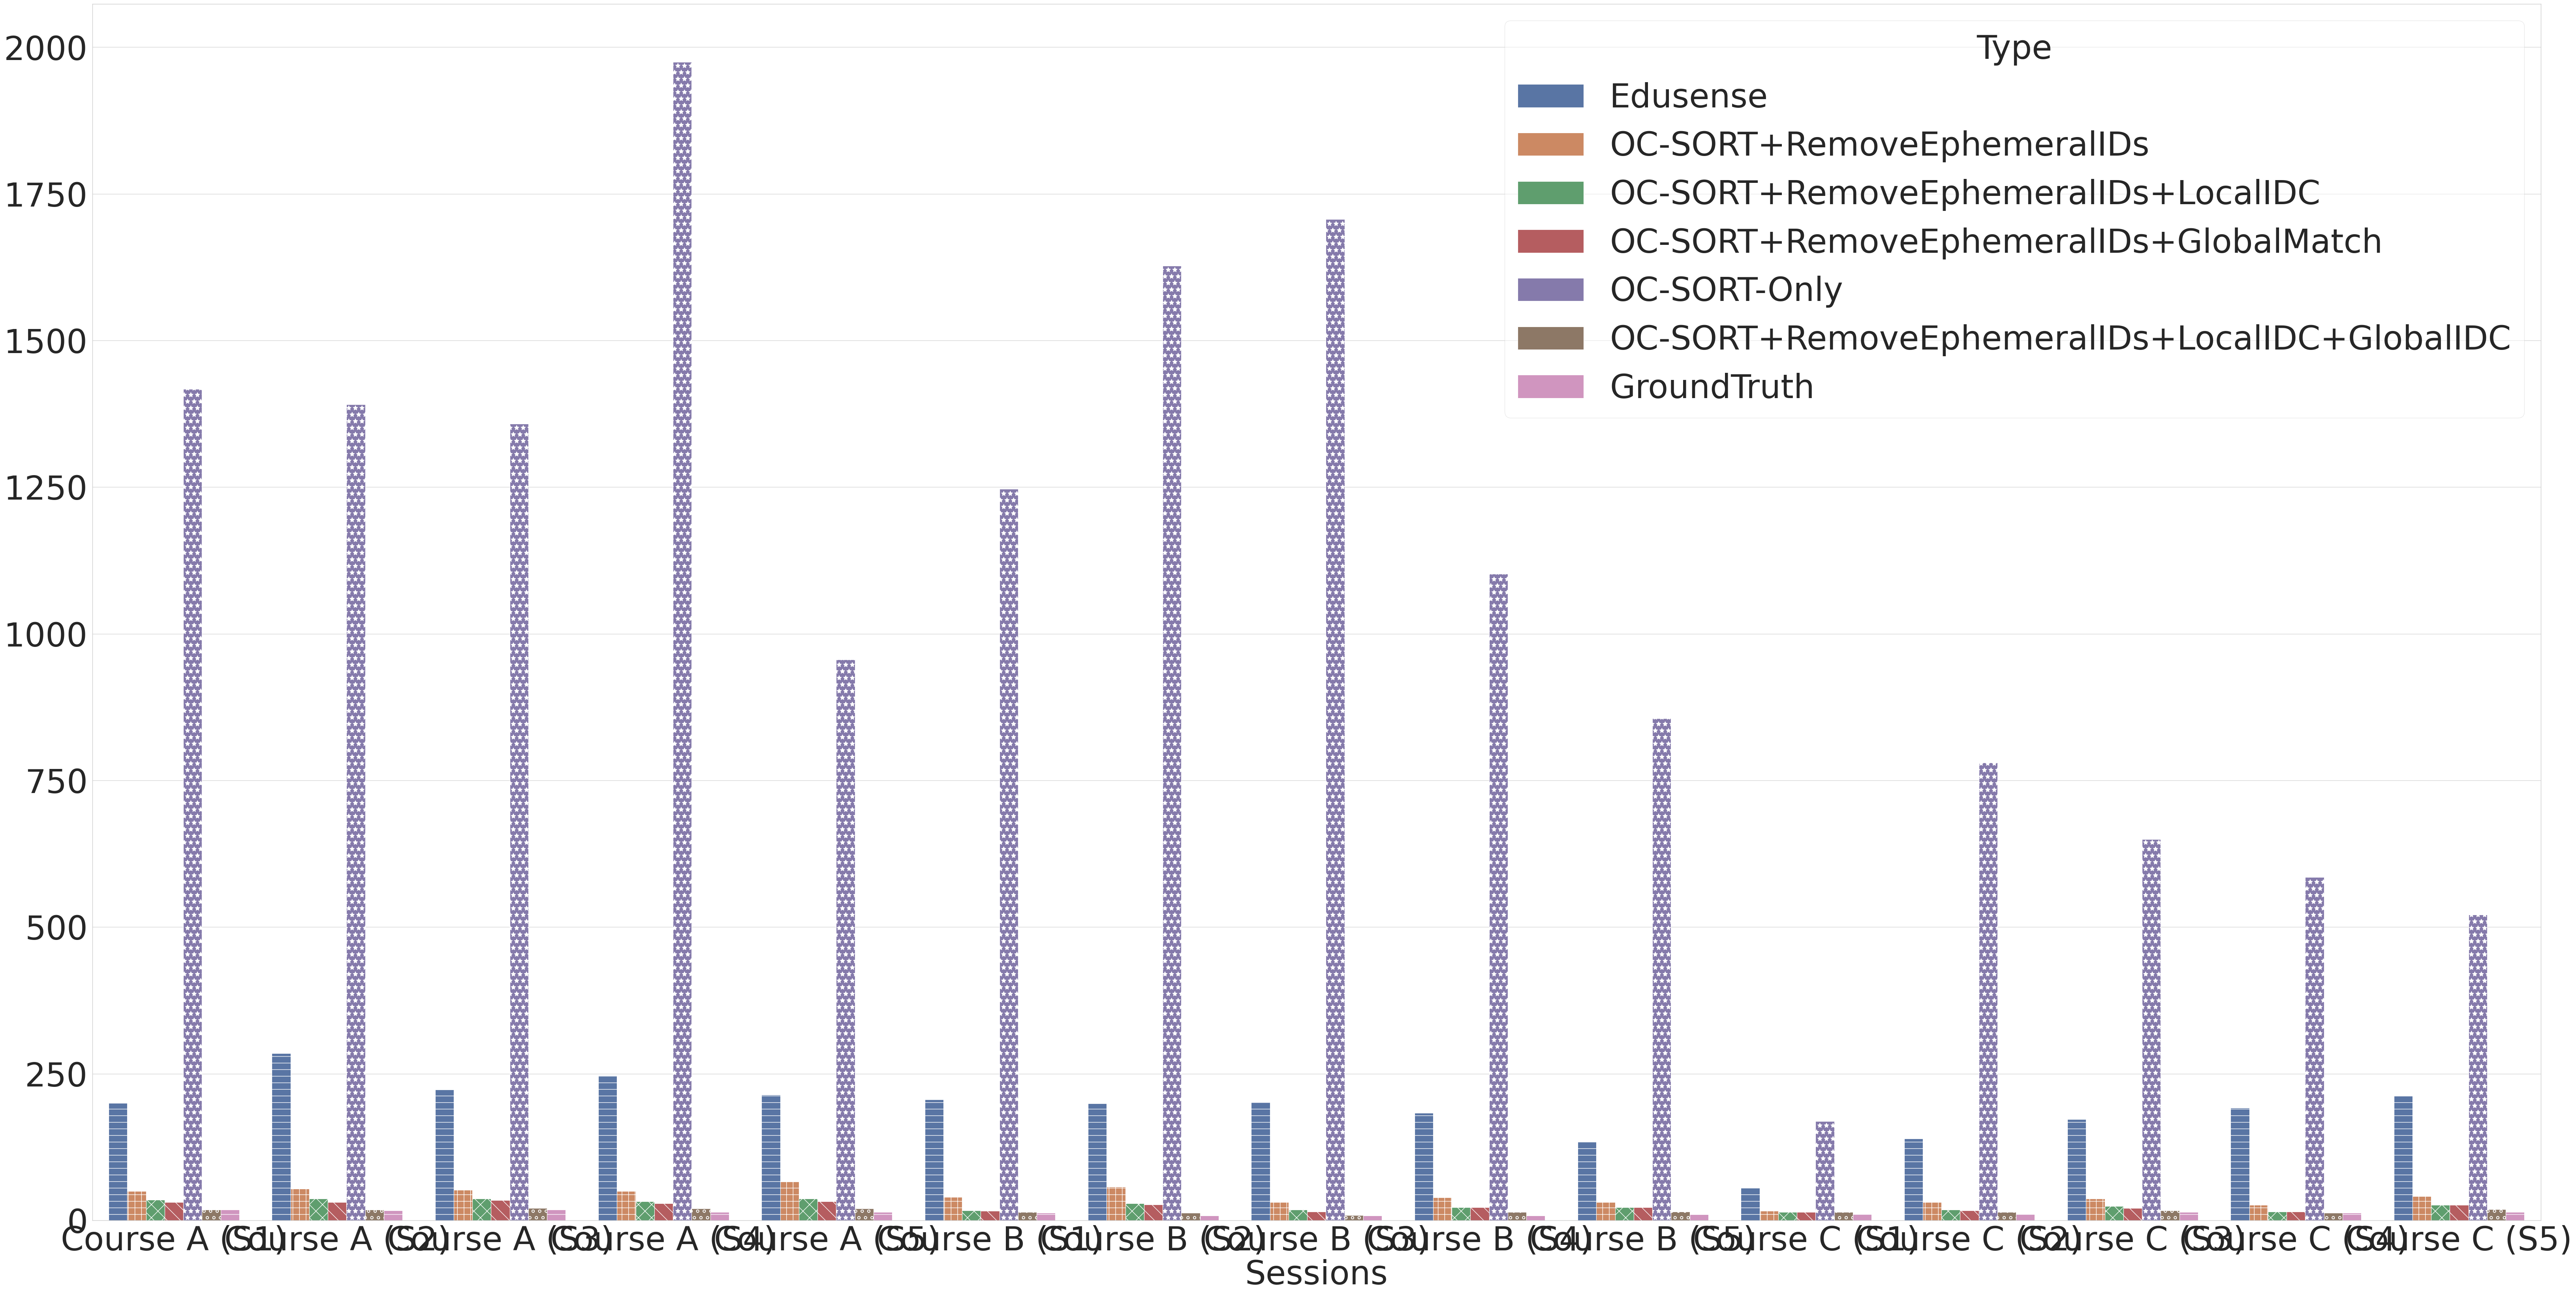

In [44]:
plt.figure(figsize=(80,40))
ax = sns.barplot(data=df_e1,x='SessionName',y='Unique IDs', hue='Type')
colors = ['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']
# plt.xlim(0,100)
# Define some hatches
hatches = ['-', '+', 'x', '\\', '*', 'o','-']
for i,p in enumerate(ax.patches):
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
    # print(i)
    p.set_hatch(hatches[i//15])

    # adding text to each bar
    # ax.text(x = width+3, # x-coordinate position of data label, padded 3 to right of bar
    #         y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
    #         s = "{:.0f}".format(height), # data label, formatted to ignore decimals
    #                  va = "center", size=60, color=colors[i//15]) # sets vertical alignment (va) to center
# plt.legend(ncol=3, bbox_to_anchor=(-0.017, 1.185),fontsize=43)
plt.xlabel('Sessions')
plt.ylabel('')
# plt.yticks((0,1),('Extrasensory','Casas'),rotation=45,va='top')
# plt.legend(labels=['Ontology','Temporal','Combined'], fontsize=50)
# plt.savefig(f"{plotting_dir}/rq1a_jaccard_bestmodel.pdf", dpi=400, bbox_inches='tight')

In [ ]:
df_rq1a['dataset_lag'] = df_rq1a['dataset']+'-'+df_rq1a['lag']

df_rq1a

In [ ]:
pal = sns.color_palette()
print(pal.as_hex())

In [ ]:
df_rq1a = df_rq1a[df_rq1a.pipeline=='temporal']
fig = plt.figure(figsize=(20,10))
sns.lineplot(data=df_rq1a,x='lag',y='Jaccard', style='dataset',hue='dataset',linewidth=6)
plt.xticks((0,1,2,3),(5,10,30,60))
plt.ylabel('Accuracy (JC) in % ')
plt.xlabel('Lag Window (in minutes)')
plt.legend(loc='lower left', labels=['Extrasensory','Casas'], fontsize=50)
plt.ylim(0,100)

# label points on the plot

for x, y in zip(df_rq1a[df_rq1a.dataset=='extrasensory']['lag'], df_rq1a[df_rq1a.dataset=='extrasensory']['Jaccard']):
    plt.text(x = x, # x-coordinate position of data label
             y = y+5, # y-coordinate position of data label, adjusted to be 150 below the data point
             s = "{:.0f}".format(y), # data label, formatted to ignore decimals
                          color = '#4c72b0', size=40) # set colour of line


for x, y in zip(df_rq1a[df_rq1a.dataset=='casas']['lag'], df_rq1a[df_rq1a.dataset=='casas']['Jaccard']):
    plt.text(x = x, # x-coordinate position of data label
             y = y-10, # y-coordinate position of data label, adjusted to be 150 below the data point
             s = "{:.0f}".format(y), # data label, formatted to ignore decimals
             color = '#dd8452', size=40) # set colour of line
# plt.grid(False)
plt.tight_layout()
# plt.savefig(f"{plotting_dir}/rq1a_jaccard_temporal_lag.pdf", dpi=400, bbox_inches='tight')

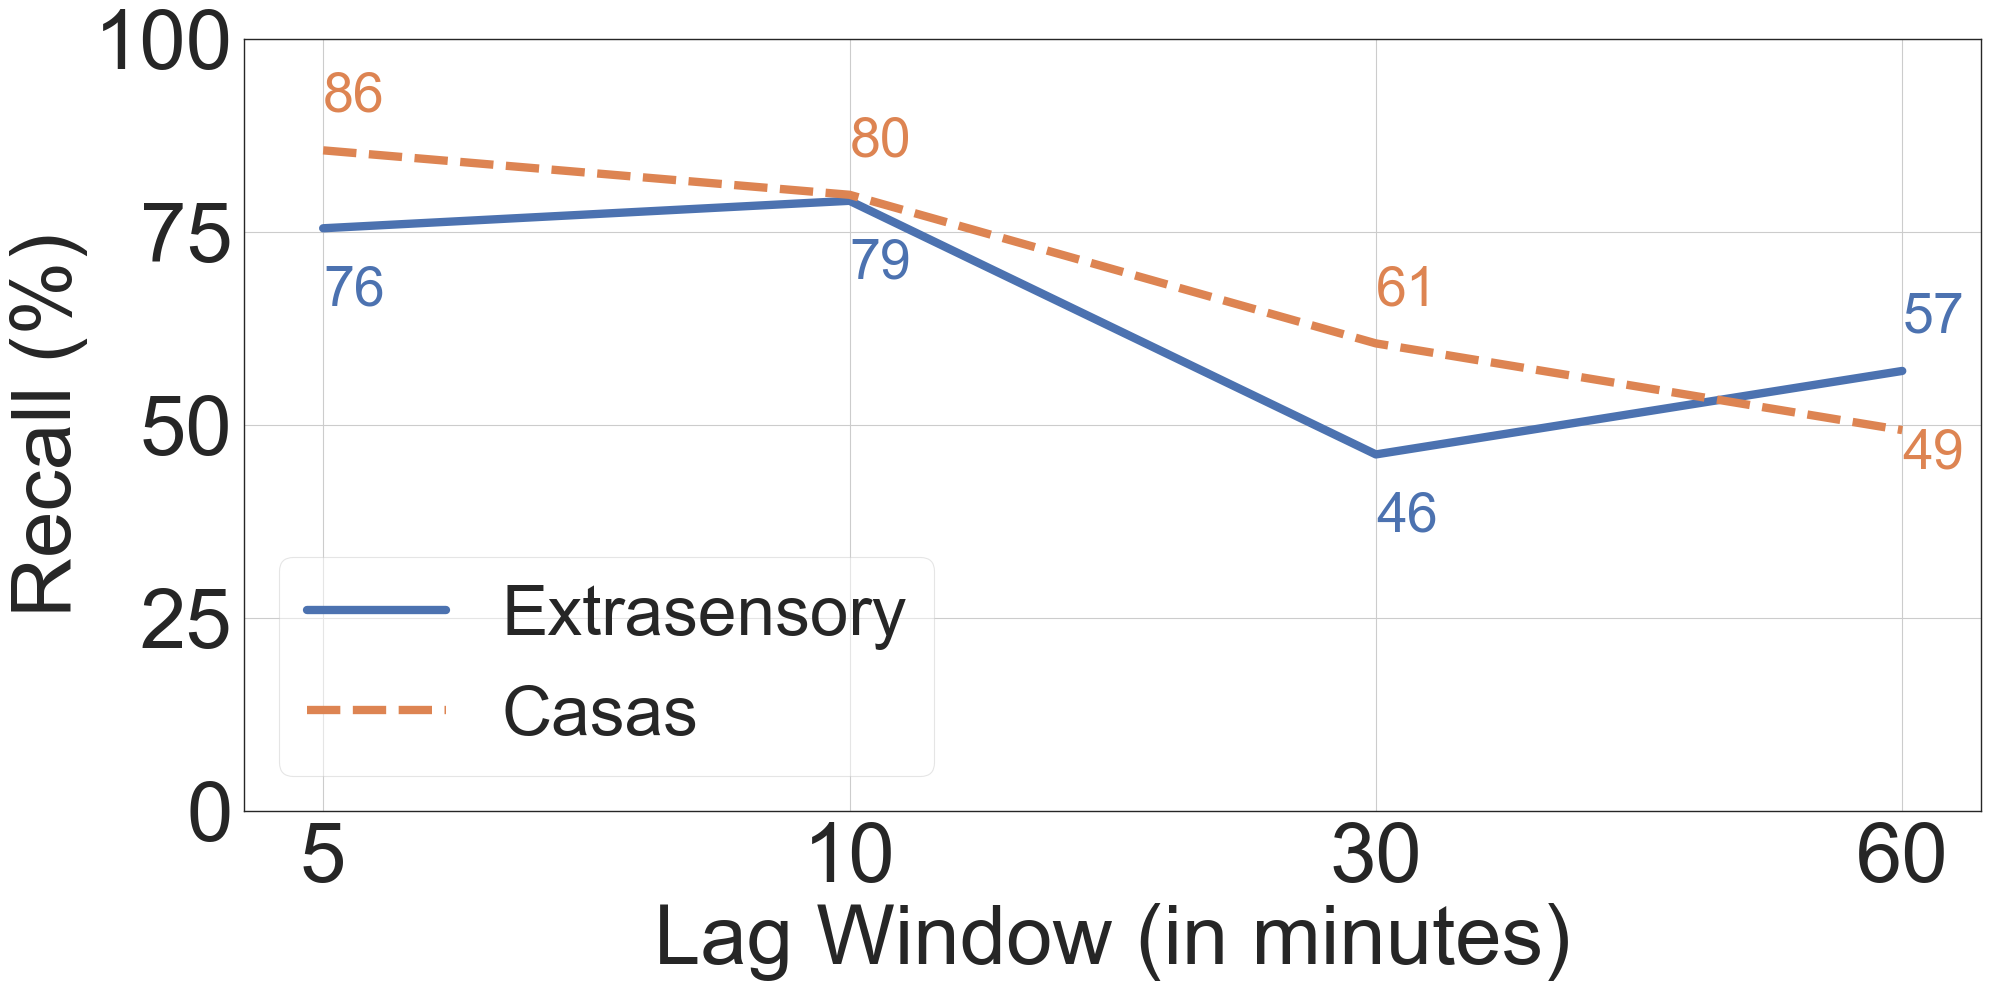

In [17]:
# plt.figure(figsize=(20,10))
# sns.lineplot(data=df_rq1a[df_rq1a.pipeline=='temporal'],x='lag',y='Recall', hue='dataset')
# plt.xticks(rotation=45,ha="right")
# plt.ylim(0,100)
# plt.savefig(f"{plotting_dir}/rq1a_recall_temporal_lag.png", dpi=150, bbox_inches='tight')

fig = plt.figure(figsize=(20,10))
sns.lineplot(data=df_rq1a,x='lag',y='Recall', style='dataset',hue='dataset',linewidth=6)
plt.xticks((0,1,2,3),(5,10,30,60))
plt.ylabel('Recall (%)')
plt.xlabel('Lag Window (in minutes)')
plt.legend(loc='lower left', labels=['Extrasensory','Casas'], fontsize=50)
plt.ylim(0,100)

# label points on the plot
i=0
for x, y in zip(df_rq1a[df_rq1a.dataset=='extrasensory']['lag'], df_rq1a[df_rq1a.dataset=='extrasensory']['Recall']):
    if i==3:
        plt.text(x = x, # x-coordinate position of data label
                 y = y+5, # y-coordinate position of data label, adjusted to be 150 below the data point
                 s = "{:.0f}".format(y), # data label, formatted to ignore decimals
                 color = '#4c72b0', size=40) # set colour of line
    else:
        plt.text(x = x, # x-coordinate position of data label
                 y = y-10, # y-coordinate position of data label, adjusted to be 150 below the data point
                 s = "{:.0f}".format(y), # data label, formatted to ignore decimals
                 color = '#4c72b0', size=40) # set colour of line
    i+=1


i=0
for x, y in zip(df_rq1a[df_rq1a.dataset=='casas']['lag'], df_rq1a[df_rq1a.dataset=='casas']['Recall']):
    if i==3:
        plt.text(x = x, # x-coordinate position of data label
                 y = y-5, # y-coordinate position of data label, adjusted to be 150 below the data point
                 s = "{:.0f}".format(y), # data label, formatted to ignore decimals
                 color = '#dd8452', size=40) # set colour of line
    else:
        plt.text(x = x, # x-coordinate position of data label
                 y = y+5, # y-coordinate position of data label, adjusted to be 150 below the data point
                 s = "{:.0f}".format(y), # data label, formatted to ignore decimals
                 color = '#dd8452', size=40) # set colour of line
    i+=1

# plt.grid(False)
plt.tight_layout()
plt.savefig(f"{plotting_dir}/rq1a_recall_temporal_lag.pdf", dpi=400, bbox_inches='tight')

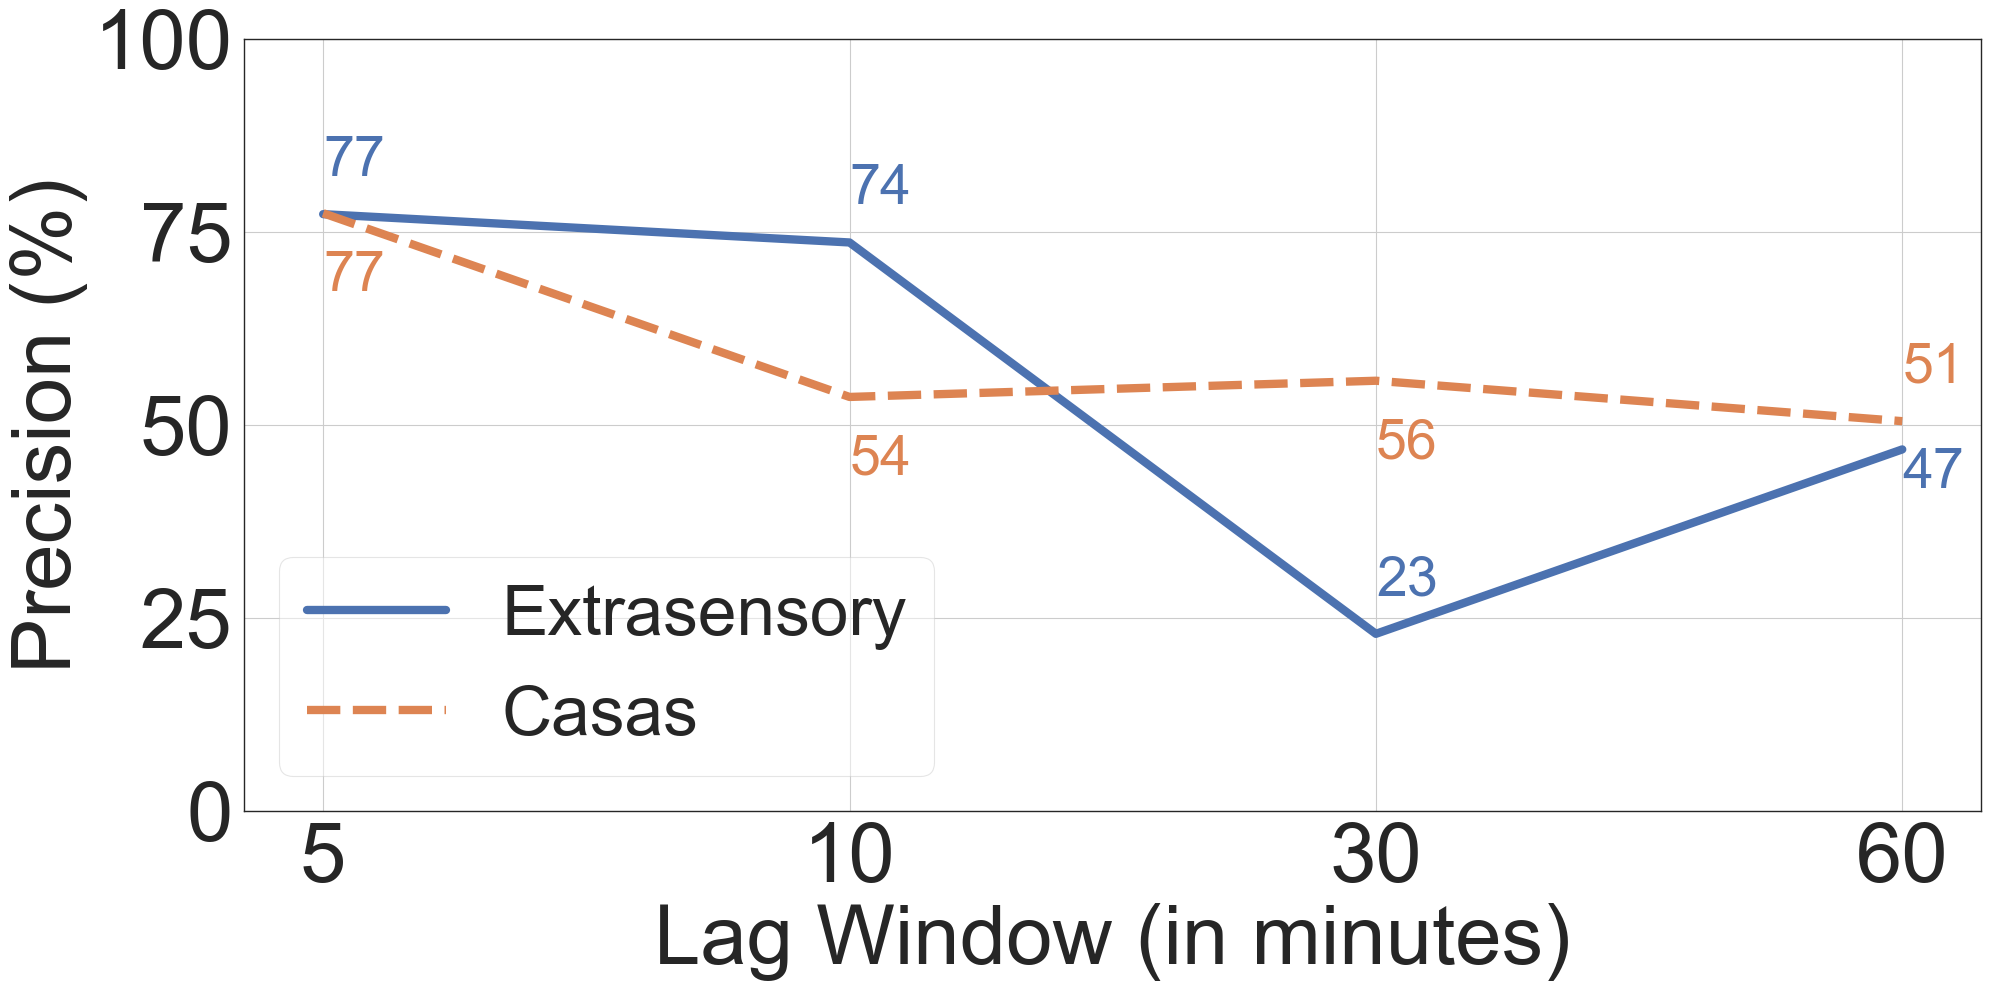

In [18]:

# plt.figure(figsize=(20,10))
# sns.lineplot(data=df_rq1a[df_rq1a.pipeline=='temporal'],x='lag',y='Precision', hue='dataset')
# plt.xticks(rotation=45,ha="right")
# plt.ylim(0,100)
# plt.savefig(f"{plotting_dir}/rq1a_precision_temporal_lag.png", dpi=150, bbox_inches='tight')

fig = plt.figure(figsize=(20,10))
sns.lineplot(data=df_rq1a,x='lag',y='Precision', style='dataset',hue='dataset',linewidth=6)
plt.xticks((0,1,2,3),(5,10,30,60))
plt.ylabel('Precision (%)')
plt.xlabel('Lag Window (in minutes)')
plt.legend(loc='lower left', labels=['Extrasensory','Casas'], fontsize=50)
plt.ylim(0,100)

# label points on the plot
i=0
for x, y in zip(df_rq1a[df_rq1a.dataset=='extrasensory']['lag'], df_rq1a[df_rq1a.dataset=='extrasensory']['Precision']):
    if i==3:
        plt.text(x = x, # x-coordinate position of data label
                 y = y-5, # y-coordinate position of data label, adjusted to be 150 below the data point
                 s = "{:.0f}".format(y), # data label, formatted to ignore decimals
                 color = '#4c72b0', size=40) # set colour of line
    else:
        plt.text(x = x, # x-coordinate position of data label
                 y = y+5, # y-coordinate position of data label, adjusted to be 150 below the data point
                 s = "{:.0f}".format(y), # data label, formatted to ignore decimals
                 color = '#4c72b0', size=40) # set colour of line
    i+=1


i=0
for x, y in zip(df_rq1a[df_rq1a.dataset=='casas']['lag'], df_rq1a[df_rq1a.dataset=='casas']['Precision']):
    if i==3:
        plt.text(x = x, # x-coordinate position of data label
                 y = y+5, # y-coordinate position of data label, adjusted to be 150 below the data point
                 s = "{:.0f}".format(y), # data label, formatted to ignore decimals
                 color = '#dd8452', size=40) # set colour of line
    else:
        plt.text(x = x, # x-coordinate position of data label
                 y = y-10, # y-coordinate position of data label, adjusted to be 150 below the data point
                 s = "{:.0f}".format(y), # data label, formatted to ignore decimals
                 color = '#dd8452', size=40) # set colour of line
    i+=1

# plt.grid(False)
plt.tight_layout()
plt.savefig(f"{plotting_dir}/rq1a_precision_temporal_lag.pdf", dpi=400, bbox_inches='tight')

In [19]:

# plt.figure(figsize=(20,10))
# sns.lineplot(data=df_rq1a[df_rq1a.pipeline=='temporal'],x='lag',y='F1-Score', hue='dataset')
# plt.xticks(rotation=45,ha="right")
# plt.ylim(0,100)
# plt.savefig(f"{plotting_dir}/rq1a_f1_temporal_lag.png", dpi=150, bbox_inches='tight')

In [11]:
df_rq1a.pipeline = df_rq1a.pipeline.apply(lambda x: 'Temporal' if (x=='temporal') else ('Ontology' if (x=='onto') else 'Combined'))
df_rq1a.pipeline.unique()

array(['Ontology', 'Temporal', 'Combined'], dtype=object)

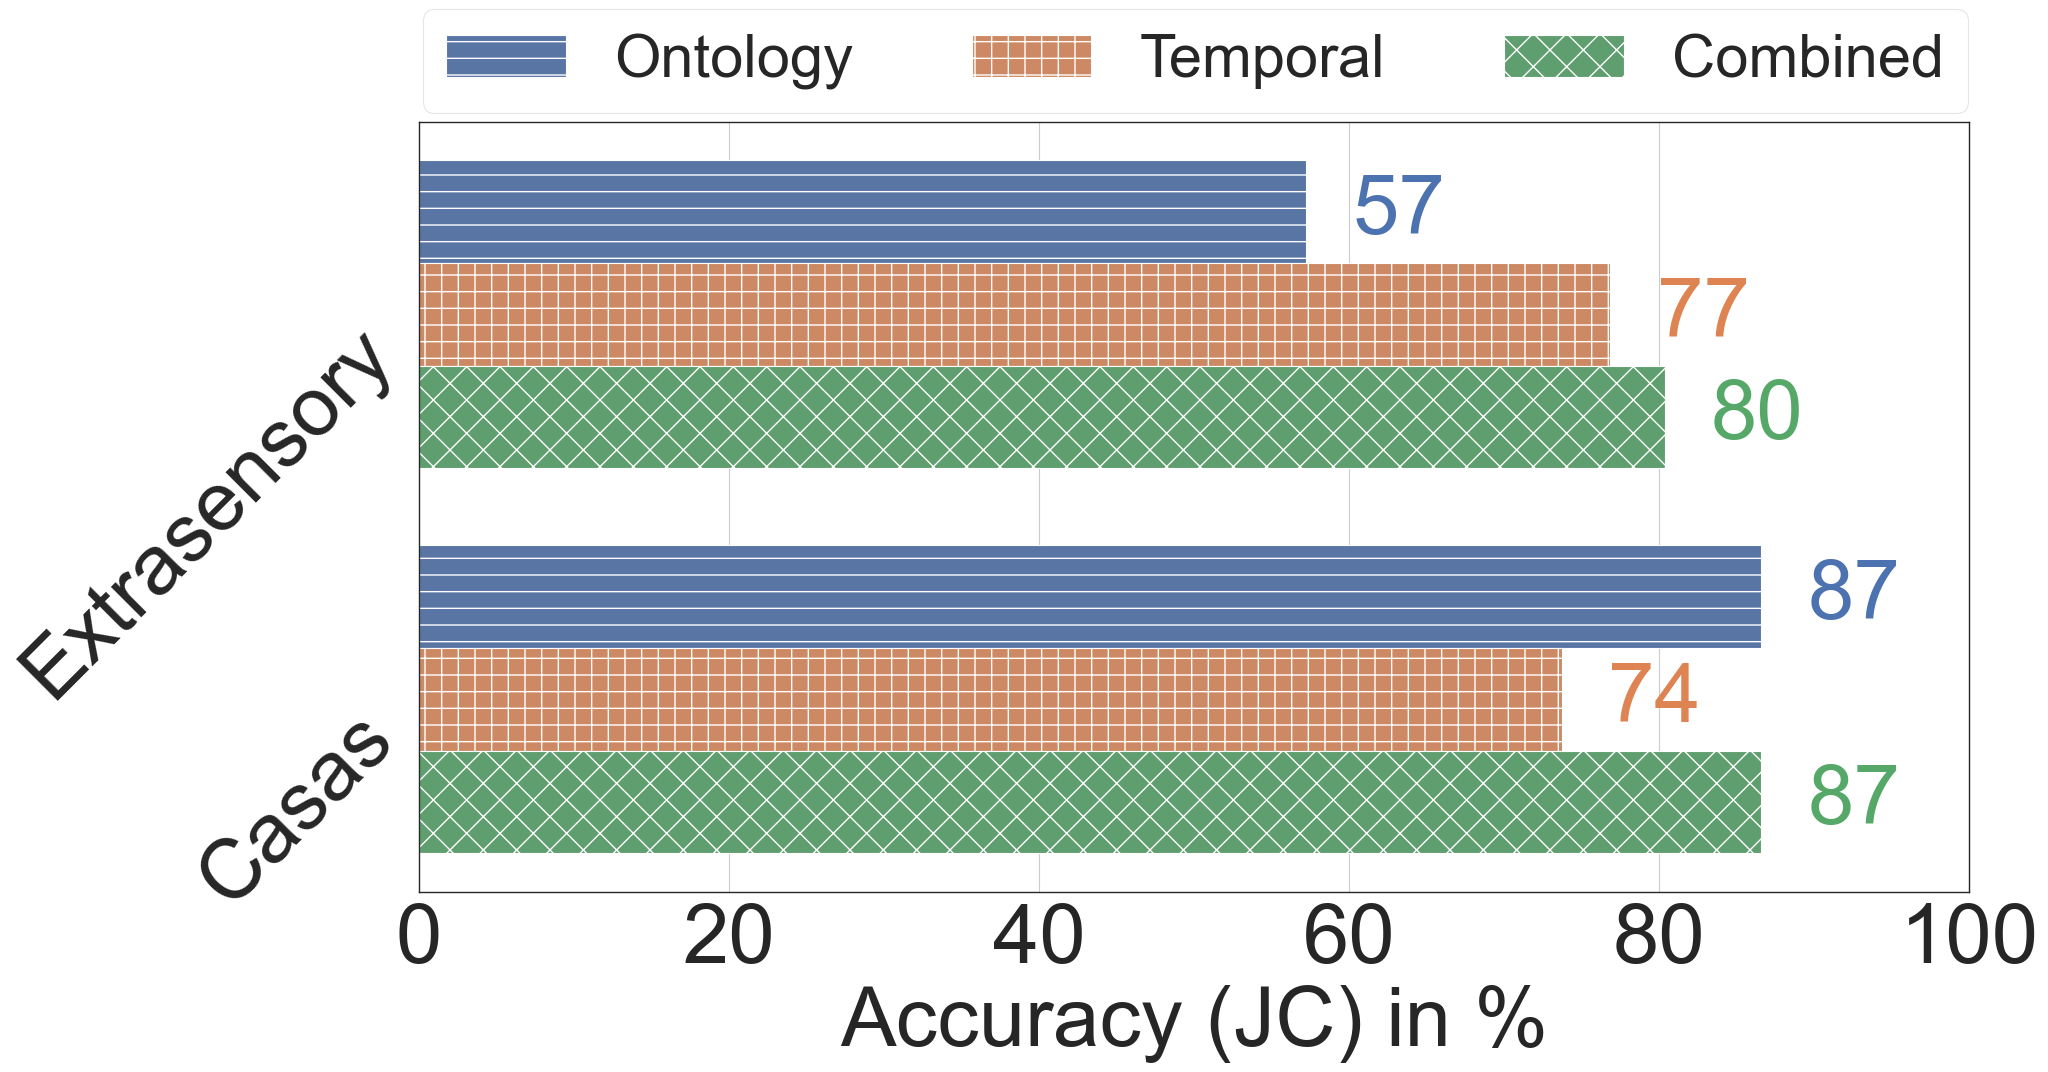

In [12]:
plt.figure(figsize=(20,10))
ax = sns.barplot(data=df_rq1a[df_rq1a.lag=='5 mins'],y='dataset',x='Jaccard', hue='pipeline')
colors = ['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']
plt.xlim(0,100)
# Define some hatches
hatches = ['-', '+', 'x', '\\', '*', 'o']
for i,p in enumerate(ax.patches):
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
    p.set_hatch(hatches[i//2])

    # adding text to each bar
    ax.text(x = width+3, # x-coordinate position of data label, padded 3 to right of bar
            y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
            s = "{:.0f}".format(width), # data label, formatted to ignore decimals
                     va = "center", size=60, color=colors[i//2]) # sets vertical alignment (va) to center
plt.legend(ncol=3, bbox_to_anchor=(-0.017, 1.185),fontsize=43)
plt.xlabel('Accuracy (JC) in %')
plt.ylabel('')
plt.yticks((0,1),('Extrasensory','Casas'),rotation=45,va='top')
# plt.legend(labels=['Ontology','Temporal','Combined'], fontsize=50)
plt.savefig(f"{plotting_dir}/rq1a_jaccard_bestmodel.pdf", dpi=400, bbox_inches='tight')

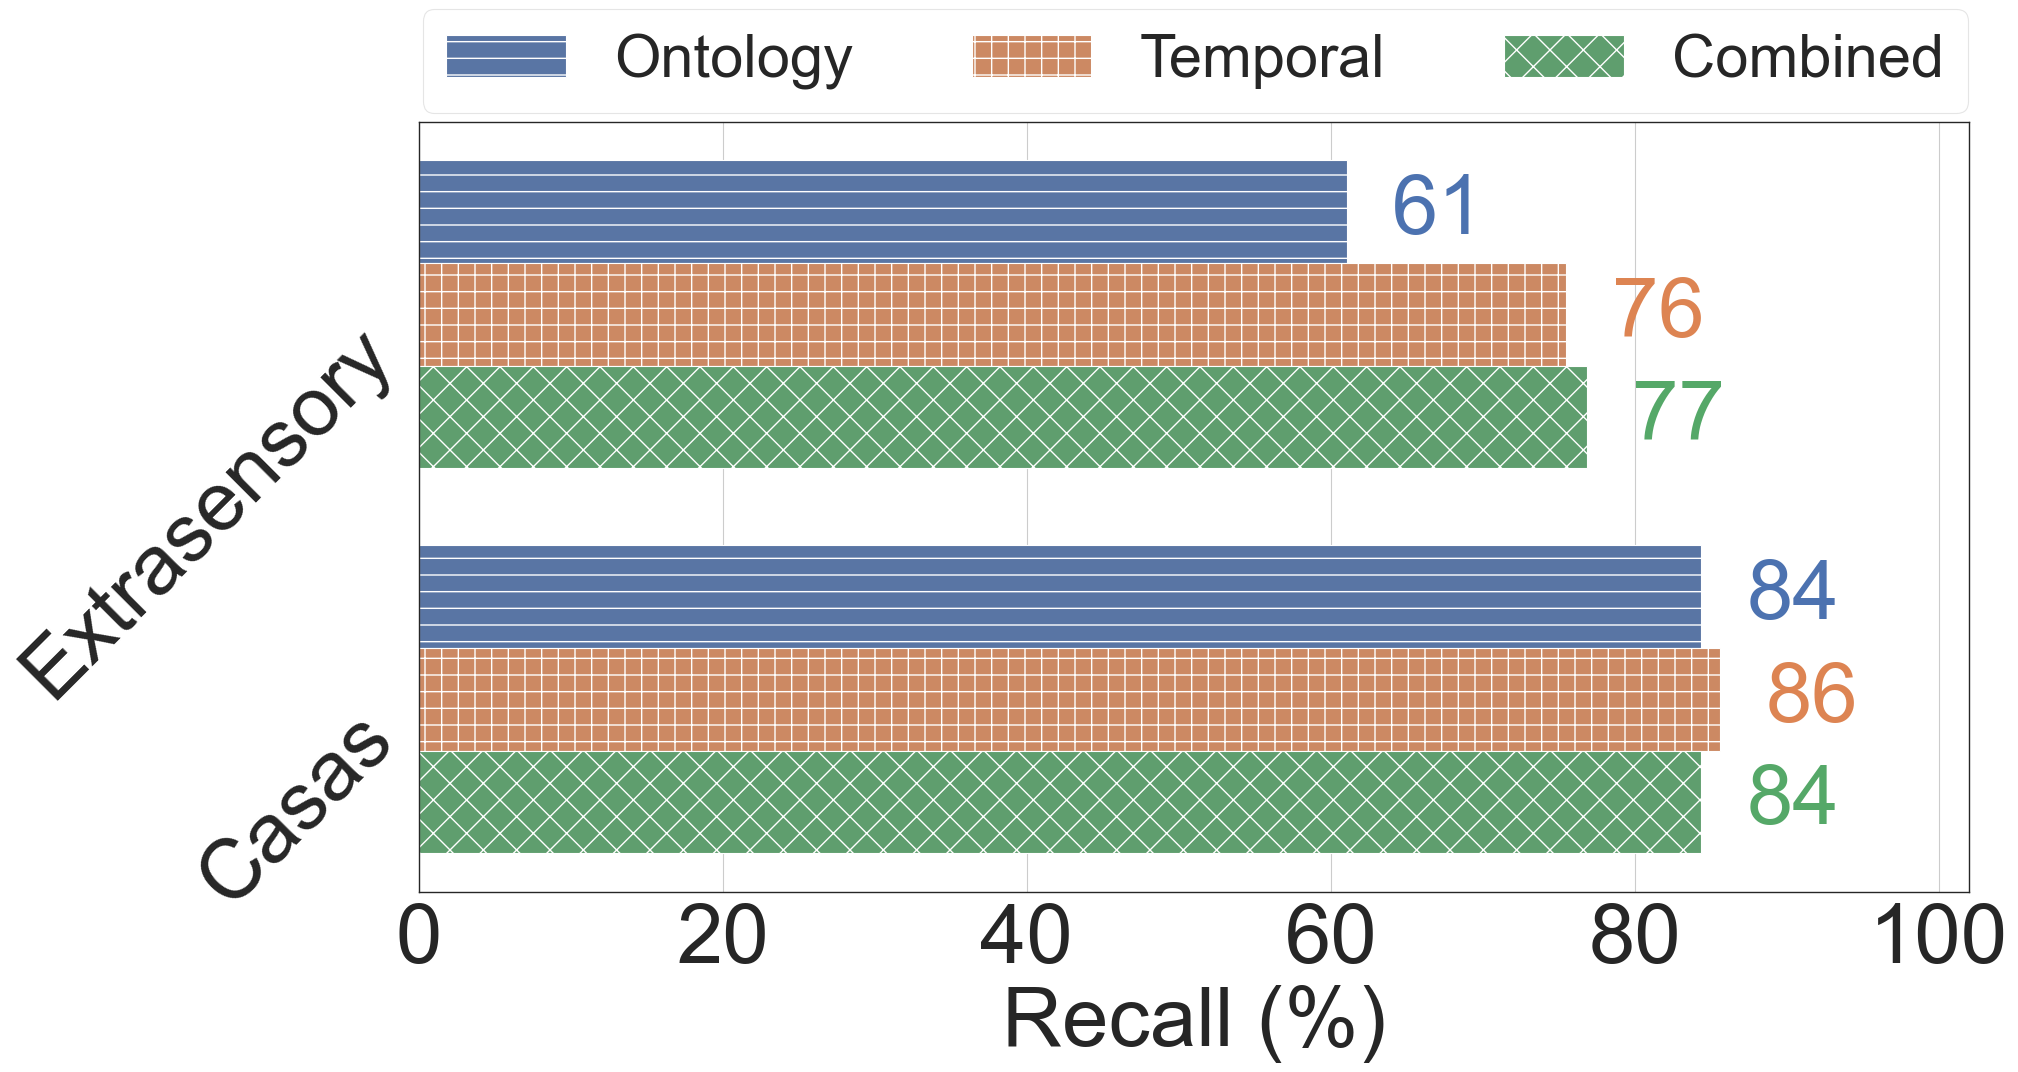

In [13]:
plt.figure(figsize=(20,10))
ax = sns.barplot(data=df_rq1a[df_rq1a.lag=='5 mins'],y='dataset',x='Recall', hue='pipeline')
colors = ['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']
plt.xlim(0,100)
# Define some hatches
hatches = ['-', '+', 'x', '\\', '*', 'o']
for i,p in enumerate(ax.patches):
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
    p.set_hatch(hatches[i//2])

    # adding text to each bar
    ax.text(x = width+3, # x-coordinate position of data label, padded 3 to right of bar
            y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
            s = "{:.0f}".format(width), # data label, formatted to ignore decimals
            va = "center", size=60, color=colors[i//2]) # sets vertical alignment (va) to center
plt.legend(ncol=3, bbox_to_anchor=(-0.017, 1.185),fontsize=43)
plt.xlabel('Recall (%)')
plt.ylabel('')
plt.xlim(0,102)
plt.yticks((0,1),('Extrasensory','Casas'),rotation=45,va='top')
# plt.legend(labels=['Ontology','Temporal','Combined'], fontsize=50)
plt.savefig(f"{plotting_dir}/rq1a_recall_bestmodel.pdf", dpi=400, bbox_inches='tight')

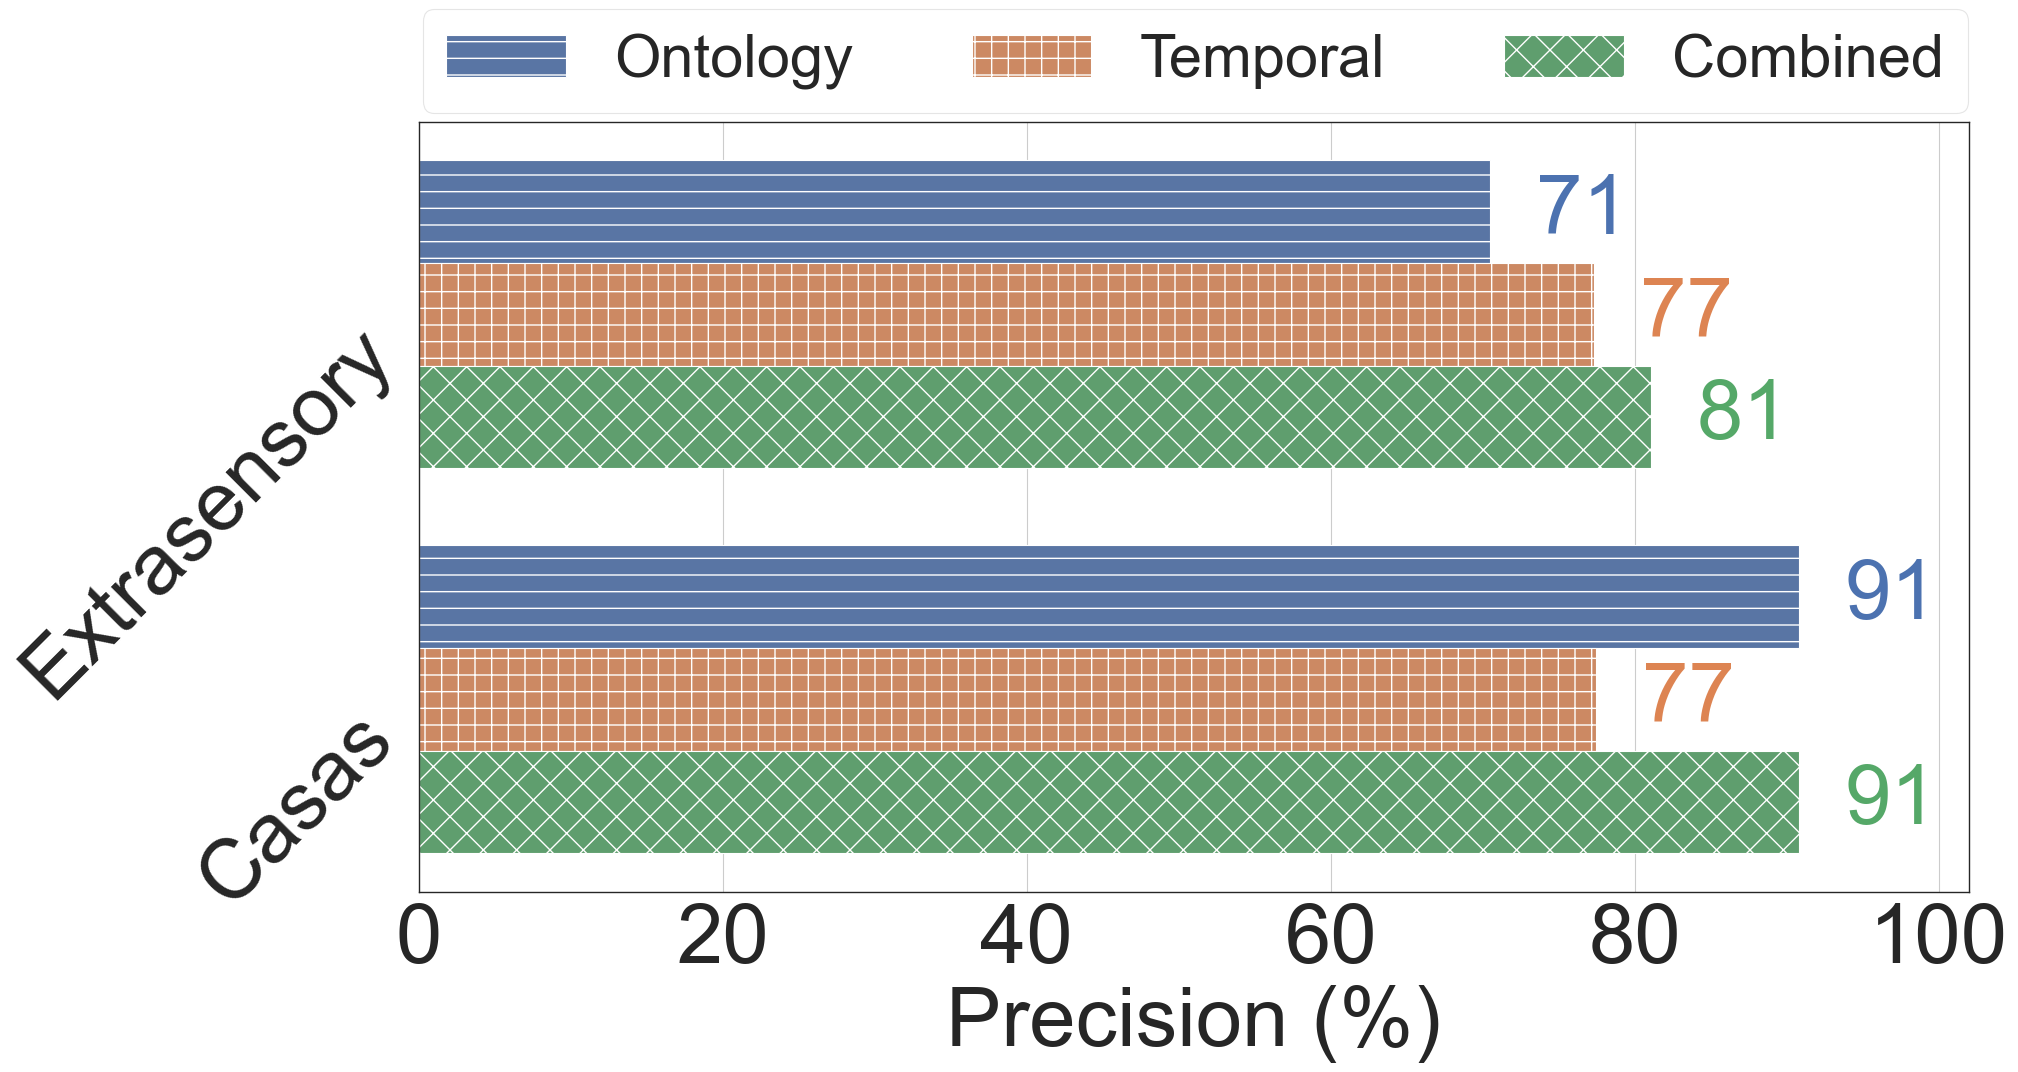

In [14]:
plt.figure(figsize=(20,10))
ax = sns.barplot(data=df_rq1a[df_rq1a.lag=='5 mins'],y='dataset',x='Precision', hue='pipeline')
colors = ['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']
plt.xlim(0,100)
# Define some hatches
hatches = ['-', '+', 'x', '\\', '*', 'o']
for i,p in enumerate(ax.patches):
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
    p.set_hatch(hatches[i//2])

    # adding text to each bar
    ax.text(x = width+3, # x-coordinate position of data label, padded 3 to right of bar
            y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
            s = "{:.0f}".format(width), # data label, formatted to ignore decimals
            va = "center", size=60, color=colors[i//2]) # sets vertical alignment (va) to center
plt.legend(ncol=3, bbox_to_anchor=(-0.017, 1.185),fontsize=43)
plt.xlabel('Precision (%)')
plt.ylabel('')
plt.xlim(0,102)
plt.yticks((0,1),('Extrasensory','Casas'),rotation=45,va='top')
# plt.legend(labels=['Ontology','Temporal','Combined'], fontsize=50)
plt.savefig(f"{plotting_dir}/rq1a_precision_bestmodel.pdf", dpi=400, bbox_inches='tight')

In [419]:

# plt.figure(figsize=(20,10))
# sns.barplot(data=df_rq1a[df_rq1a.lag=='5 mins'],y='dataset',x='Recall', hue='pipeline',orient='h')
# plt.xticks(rotation=45,ha="right")
# plt.xlim(0,100)
# plt.savefig(f"{plotting_dir}/rq1a_recall_bestmodel.png", dpi=150, bbox_inches='tight')
#
# plt.figure(figsize=(20,10))
# sns.barplot(data=df_rq1a[df_rq1a.lag=='5 mins'],y='dataset',x='Precision', hue='pipeline',orient='h')
# plt.xticks(rotation=45,ha="right")
# plt.xlim(0,100)
# plt.savefig(f"{plotting_dir}/rq1a_precision_bestmodel.png", dpi=150, bbox_inches='tight')
#
# plt.figure(figsize=(20,10))
# sns.barplot(data=df_rq1a[df_rq1a.lag=='5 mins'],y='dataset',x='F1-Score', hue='pipeline',orient='h')
# plt.xticks(rotation=45,ha="right")
# plt.xlim(0,100)
# plt.savefig(f"{plotting_dir}/rq1a_f1_bestmodel.png", dpi=150, bbox_inches='tight')

# Add results for incremental runs

In [32]:
rq1b_experiments = ['casas_csh101_1days_5_1_TAE',
                    'casas_csh101_7days_5_1_TAE',
                    'casas_csh101_14days_5_1_TAE',
                    'casas_csh101_30days_5_1_TAE',
                    'extrasensory_0E6184E1-90C0-48EE-B25A-F1ECB7B9714E_1days_5_1_TAE',
                    'extrasensory_0E6184E1-90C0-48EE-B25A-F1ECB7B9714E_2days_5_1_TAE',
                    'extrasensory_0E6184E1-90C0-48EE-B25A-F1ECB7B9714E_4days_5_1_TAE',
                    'extrasensory_0E6184E1-90C0-48EE-B25A-F1ECB7B9714E_6days_5_1_TAE']

df_rq1b = None
for rq1b_exp in rq1b_experiments:
    exp_dir = f"{result_dir}/{rq1b_exp}"
    exp_contexts = json.load(open(f"{exp_dir}/all_contexts.json"))
    df_exp_overall = pd.read_csv(f"{exp_dir}/overall_metrics.csv")
    df_exp_overall.columns = ['pipeline','F1-Score','Precision','Recall','Jaccard']
    exp_dataset = rq1b_exp.split("_")[0]
    exp_training_days = str(rq1b_exp.split("_")[2])[:-4]
    df_exp_overall['dataset'] = exp_dataset
    df_exp_overall['training_time'] = exp_training_days
    if df_rq1b is None:
        df_rq1b = df_exp_overall.copy(deep=True)
    else:
        df_rq1b = pd.concat([df_rq1b,df_exp_overall],ignore_index=True)
# df_rq1b['dataset_time'] = df_rq1b['dataset']+'-'+df_rq1b['training_time']
df_rq1b = df_rq1b[df_rq1b.pipeline=='temporal'].drop(['pipeline','F1-Score'],axis=1)
# df_rq1b = df_rq1b.sort_values(by=['dataset_time'])
df_rq1b.info()
df_rq1b.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 1 to 22
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Precision      8 non-null      float64
 1   Recall         8 non-null      float64
 2   Jaccard        8 non-null      float64
 3   dataset        8 non-null      object 
 4   training_time  8 non-null      object 
dtypes: float64(3), object(2)
memory usage: 384.0+ bytes


Precision  Recall  Jaccard       dataset training_time
1       28.78   54.07    30.23         casas             1
4       49.73   69.60    36.11         casas             7
7       47.86   79.73    34.14         casas            14
10      69.72   98.28    72.17         casas            30
13      38.34   45.70    40.87  extrasensory             1

In [33]:
df_rq1b_melt = pd.melt(df_rq1b,id_vars=['dataset','training_time'],var_name='Metric',value_name='value')
df_rq1b_melt['Metric'] = df_rq1b_melt['Metric'].apply(lambda x: 'Accuracy (JC)' if x=='Jaccard' else x)
df_rq1b_melt = pd.concat([df_rq1b_melt[df_rq1b_melt.Metric=='Accuracy (JC)'], df_rq1b_melt[~(df_rq1b_melt.Metric=='Accuracy (JC)')]],ignore_index=False)

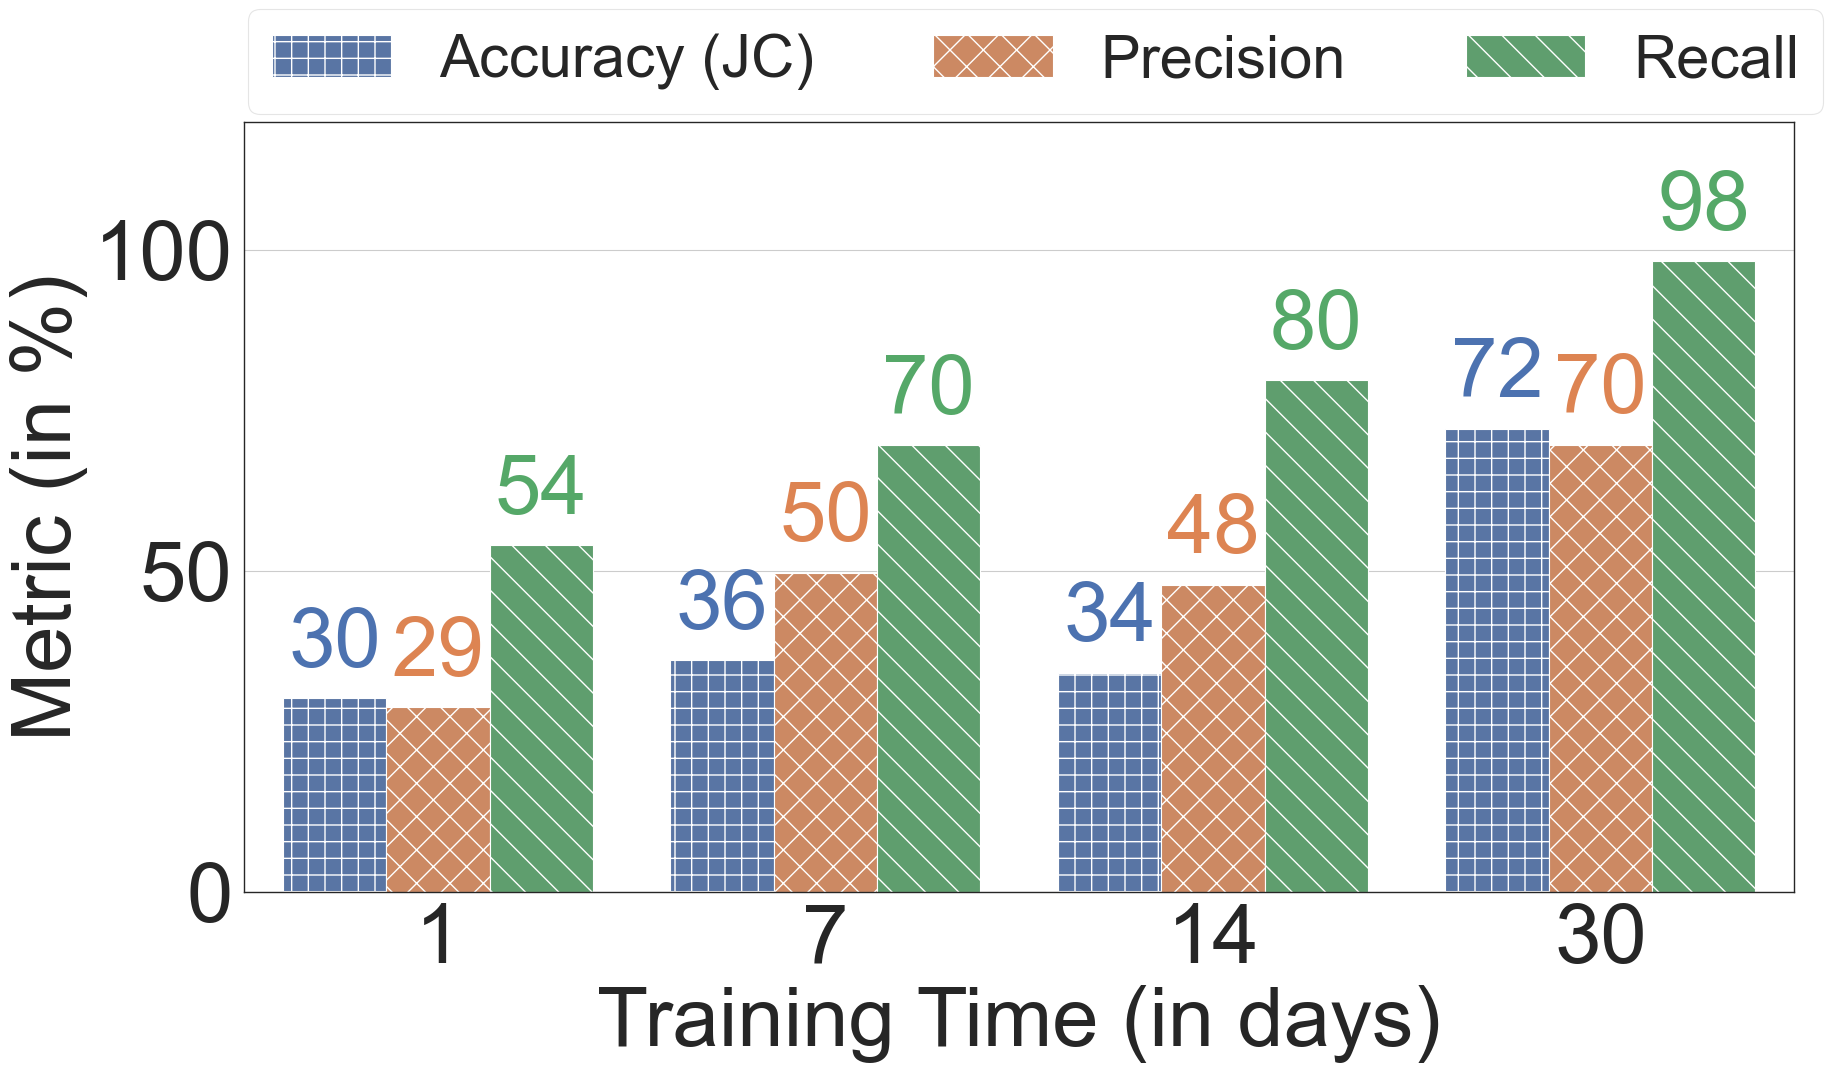

In [34]:
# plt.figure(figsize=(20,10))
# sns.barplot(data=df_rq1b_melt[df_rq1b_melt.dataset=='casas'],x='training_time',y='value',hue='Metric')
# plt.xticks(rotation=45,ha="right")
# plt.ylim(0,100)
# plt.savefig(f"{plotting_dir}/rq1b_precision.png", dpi=150, bbox_inches='tight')

plt.figure(figsize=(20,10))
ax = sns.barplot(data=df_rq1b_melt[df_rq1b_melt.dataset=='casas'],x='training_time',y='value',hue='Metric')
colors = ['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']
plt.ylim(0,100)
# Define some hatches
hatches = ['-', '+', 'x', '\\', '*', 'o'][1:]
# for i,p in enumerate(ax.patches):
#     height = p.get_height() # height of each horizontal bar is the same
#     width = p.get_width() # width (average number of passengers)
#     p.set_hatch(hatches[i//2)
#
#     # adding text to each bar
#     ax.text(x = width+3, # x-coordinate position of data label, padded 3 to right of bar
#             y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
#             s = "{:.0f}".format(width), # data label, formatted to ignore decimals
#             va = "center", size=60, color=colors[i//2]) # sets vertical alignment (va) to center
#
for i,p in enumerate(ax.patches):
    # get the height of each bar
    height = p.get_height()
    p.set_hatch(hatches[i//4])
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
            y = height+5, # y-coordinate position of data label, padded 100 above bar
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
                         ha = 'center', size=60, color=colors[i//4]) # sets horizontal alignment (ha) to center
plt.legend(ncol=3, bbox_to_anchor=(-0.017, 1.185),fontsize=43)
plt.xlabel('Training Time (in days)')
plt.ylabel('Metric (in %)')
plt.ylim(0,120)
# plt.yticks((0,1),('Extrasensory','Casas'),rotation=45,va='top')
# plt.legend(labels=['Ontology','Temporal','Combined'], fontsize=50)
plt.savefig(f"{plotting_dir}/rq1b_casas.pdf", dpi=400, bbox_inches='tight')

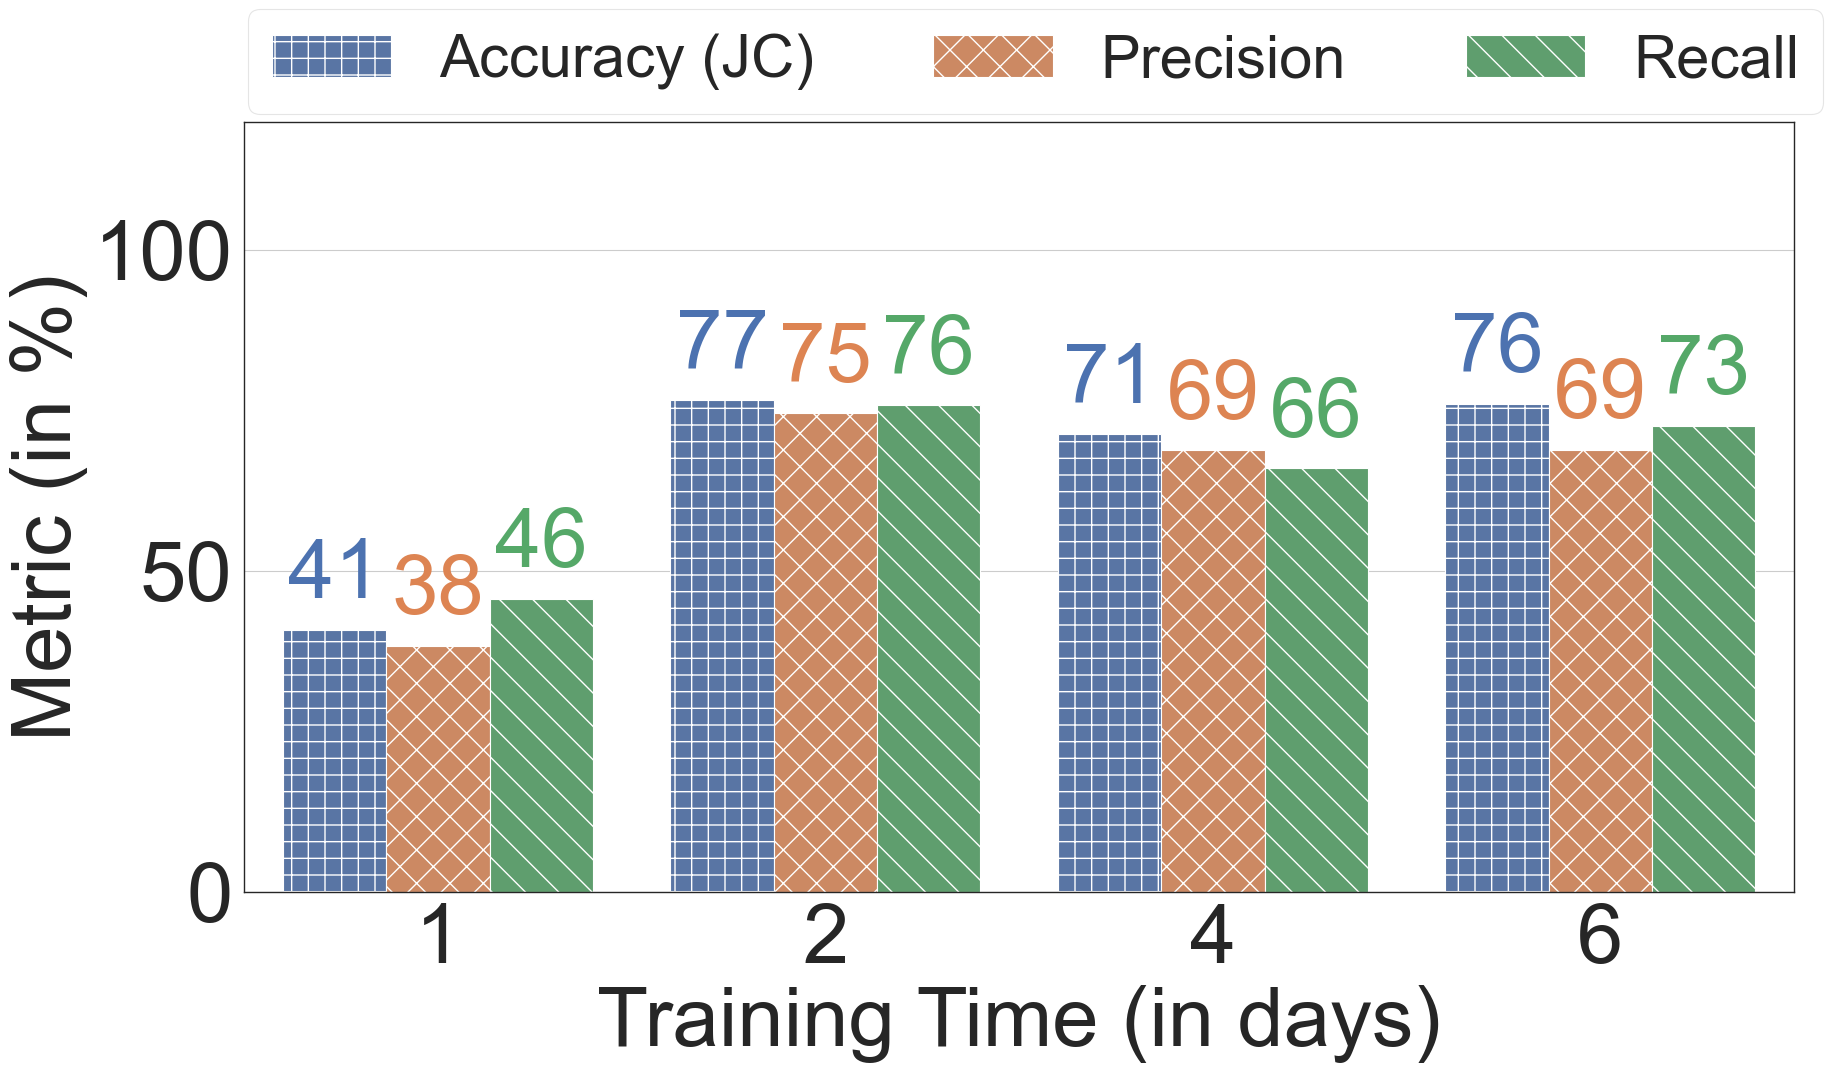

In [35]:
# plt.figure(figsize=(20,10))
# sns.barplot(data=df_rq1b_melt[df_rq1b_melt.dataset=='casas'],x='training_time',y='value',hue='Metric')
# plt.xticks(rotation=45,ha="right")
# plt.ylim(0,100)
# plt.savefig(f"{plotting_dir}/rq1b_precision.png", dpi=150, bbox_inches='tight')

plt.figure(figsize=(20,10))
ax = sns.barplot(data=df_rq1b_melt[df_rq1b_melt.dataset=='extrasensory'],x='training_time',y='value',hue='Metric')
colors = ['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']
plt.ylim(0,100)
# Define some hatches
hatches = ['-', '+', 'x', '\\', '*', 'o'][1:]
# for i,p in enumerate(ax.patches):
#     height = p.get_height() # height of each horizontal bar is the same
#     width = p.get_width() # width (average number of passengers)
#     p.set_hatch(hatches[i//2)
#
#     # adding text to each bar
#     ax.text(x = width+3, # x-coordinate position of data label, padded 3 to right of bar
#             y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
#             s = "{:.0f}".format(width), # data label, formatted to ignore decimals
#             va = "center", size=60, color=colors[i//2]) # sets vertical alignment (va) to center
#
for i,p in enumerate(ax.patches):
    # get the height of each bar
    height = p.get_height()
    p.set_hatch(hatches[i//4])
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
            y = height+5, # y-coordinate position of data label, padded 100 above bar
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center', size=60, color=colors[i//4]) # sets horizontal alignment (ha) to center
plt.legend(ncol=3, bbox_to_anchor=(-0.017, 1.185),fontsize=43)
plt.xlabel('Training Time (in days)')
plt.ylabel('Metric (in %)')
plt.ylim(0,120)
# plt.yticks((0,1),('Extrasensory','Casas'),rotation=45,va='top')
# plt.legend(labels=['Ontology','Temporal','Combined'], fontsize=50)
plt.savefig(f"{plotting_dir}/rq1b_extrasensory.pdf", dpi=400, bbox_inches='tight')

In [36]:
# plt.figure(figsize=(20,10))
# sns.barplot(data=df_rq1b[df_rq1b.pipeline=='temporal'],x='dataset_time',y='Precision',hue='pipeline')
# plt.xticks(rotation=45,ha="right")
# plt.ylim(0,100)
# plt.savefig(f"{plotting_dir}/rq1b_precision.png", dpi=150, bbox_inches='tight')
#
# plt.figure(figsize=(20,10))
# sns.barplot(data=df_rq1b[df_rq1b.pipeline=='temporal'],x='dataset_time',y='Recall',hue='pipeline')
# plt.xticks(rotation=45,ha="right")
# plt.ylim(0,100)
# plt.savefig(f"{plotting_dir}/rq1b_recall.png", dpi=150, bbox_inches='tight')
#
# plt.figure(figsize=(20,10))
# sns.barplot(data=df_rq1b[df_rq1b.pipeline=='temporal'],x='dataset_time',y='F1-Score',hue='pipeline')
# plt.xticks(rotation=45,ha="right")
# plt.ylim(0,100)
# plt.savefig(f"{plotting_dir}/rq1b_f1.png", dpi=150, bbox_inches='tight')
#
# plt.figure(figsize=(20,10))
# sns.barplot(data=df_rq1b[df_rq1b.pipeline=='temporal'],x='dataset_time',y='Jaccard',hue='pipeline')
# plt.xticks(rotation=45,ha="right")
# plt.ylim(0,100)
# plt.savefig(f"{plotting_dir}/rq1b_jaccard.png", dpi=150, bbox_inches='tight')

# Add context results for datasets

In [37]:
rq1c_experiments = ['extrasensory_5_1_TAE','casas_5_1_TAE']
df_rq1c = None
for rq1c_exp in rq1c_experiments:
    exp_dir = f"{result_dir}/{rq1c_exp}"
    exp_contexts = json.load(open(f"{exp_dir}/all_contexts.json"))
    df_exp_overall = pd.read_csv(f"{exp_dir}/context_metrics.csv")
    df_exp_overall.columns = ['index','Context','Onto-Precision','Onto-Recall','Temporal-Precision','Temporal-Recall','Combined-Precision','Combined-Recall']
    exp_dataset = rq1c_exp.split("_")[0]
    exp_lag = str(rq1c_exp.split("_")[1])+' mins'
    df_exp_overall['dataset'] = exp_dataset
    df_exp_overall['lag'] = exp_lag
    if df_rq1c is None:
        df_rq1c = df_exp_overall.copy(deep=True)
    else:
        df_rq1c = pd.concat([df_rq1c,df_exp_overall],ignore_index=True)
df_rq1c.info()
df_rq1c.head()

ValueError: Length mismatch: Expected axis has 9 elements, new values have 8 elements

In [185]:
# df_rq1c = df_rq1c.set_index('index')
df_rq1c[['dataset','Context','Combined-Precision','Combined-Recall']].round(2).to_csv(f"{plotting_dir}/rq1_context_table.csv",index=False)

# Overall Metrics for Real World Study

In [28]:
rq3a_experiments = ['p1_dataset_0.05_0.01_TAE',
                   'p2_dataset_0.05_0.01_TAE',
                   'p3_dataset_0.05_0.01_TAE',
                   'p4_dataset_0.05_0.01_TAE',
                   'p5_dataset_0.05_0.01_TAE',
                   'p6_dataset_0.05_0.01_TAE',
                   'p7_dataset_0.05_0.01_TAE',
                   'p10_dataset_0.05_0.01_TAE']

In [29]:
result_dir

'results/20230512'

In [30]:
df_rq3a = None
for rq3a_exp in rq3a_experiments:
    exp_dir = f"{result_dir}/{rq3a_exp}"
    exp_contexts = json.load(open(f"{exp_dir}/all_contexts.json"))
    df_exp_overall = pd.read_csv(f"{exp_dir}/overall_metrics.csv")
    df_exp_overall.columns = ['pipeline','F1-Score','Precision','Recall','Jaccard']
    exp_user = rq3a_exp.split("_")[0]
    df_exp_overall['user'] = exp_user
    if df_rq3a is None:
        df_rq3a = df_exp_overall.copy(deep=True)
    else:
        df_rq3a = pd.concat([df_rq3a,df_exp_overall],ignore_index=True)
df_rq3a = df_rq3a[df_rq3a.pipeline=='combined']
df_rq3a.info()
df_rq3a.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 2 to 23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pipeline   8 non-null      object 
 1   F1-Score   8 non-null      float64
 2   Precision  8 non-null      float64
 3   Recall     8 non-null      float64
 4   Jaccard    8 non-null      float64
 5   user       8 non-null      object 
dtypes: float64(4), object(2)
memory usage: 448.0+ bytes


pipeline  F1-Score  Precision  Recall  Jaccard user
2   combined     76.01      84.36   70.53    74.49   p1
5   combined     70.84      81.54   65.22    69.31   p2
8   combined     73.48      83.38   66.96    71.02   p3
11  combined     75.96      84.16   71.05    72.99   p4
14  combined     74.43      82.68   70.24    70.97   p5

In [31]:
rq3b_experiments = ['mites_p1_dataset_0.05_0.01_TAE',
                    'mites_p2_dataset_0.05_0.01_TAE',
                    'mites_p3_dataset_0.05_0.01_TAE',
                    'mites_p4_dataset_0.05_0.01_TAE',
                    'mites_p5_dataset_0.05_0.01_TAE',
                    'mites_p6_dataset_0.05_0.01_TAE',
                    'mites_p7_dataset_0.05_0.01_TAE',
                    'mites_p10_dataset_0.05_0.01_TAE']

In [32]:
df_rq3b = None
for rq3b_exp in rq3b_experiments:
    exp_dir = f"{result_dir}/{rq3b_exp}"
    exp_contexts = json.load(open(f"{exp_dir}/all_contexts.json"))
    df_exp_overall = pd.read_csv(f"{exp_dir}/overall_metrics.csv")
    df_exp_overall.columns = ['pipeline','F1-Score','Precision','Recall','Jaccard']
    exp_user = rq3b_exp.split("_")[1]
    df_exp_overall['user'] = exp_user
    if df_rq3b is None:
        df_rq3b = df_exp_overall.copy(deep=True)
    else:
        df_rq3b = pd.concat([df_rq3b,df_exp_overall],ignore_index=True)
df_rq3b = df_rq3b[df_rq3b.pipeline=='combined']
df_rq3b.info()
df_rq3b.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 2 to 23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pipeline   8 non-null      object 
 1   F1-Score   8 non-null      float64
 2   Precision  8 non-null      float64
 3   Recall     8 non-null      float64
 4   Jaccard    8 non-null      float64
 5   user       8 non-null      object 
dtypes: float64(4), object(2)
memory usage: 448.0+ bytes


pipeline  F1-Score  Precision  Recall  Jaccard user
2   combined     26.91      34.42   23.24    21.48   p1
5   combined     25.57      29.22   23.60    17.28   p2
8   combined     26.34      40.66   22.08    22.10   p3
11  combined     24.54      35.94   21.83    17.77   p4
14  combined     31.10      52.94   26.24    23.36   p5

In [33]:
df_rq3a['label_source'] = 'Video-annotated activities'
df_rq3b['label_source'] = 'Mites activity predictions'
df_rq3 = pd.concat([df_rq3a, df_rq3b],ignore_index=True)
df_rq3['user'] = df_rq3['user'].apply(lambda x: 'p8' if (x=='p10') else x)
df_rq3.info()
df_rq3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pipeline      16 non-null     object 
 1   F1-Score      16 non-null     float64
 2   Precision     16 non-null     float64
 3   Recall        16 non-null     float64
 4   Jaccard       16 non-null     float64
 5   user          16 non-null     object 
 6   label_source  16 non-null     object 
dtypes: float64(4), object(3)
memory usage: 1.0+ KB


pipeline  F1-Score  Precision  Recall  Jaccard user  \
0  combined     76.01      84.36   70.53    74.49   p1   
1  combined     70.84      81.54   65.22    69.31   p2   
2  combined     73.48      83.38   66.96    71.02   p3   
3  combined     75.96      84.16   71.05    72.99   p4   
4  combined     74.43      82.68   70.24    70.97   p5   

                 label_source  
0  Video-annotated activities  
1  Video-annotated activities  
2  Video-annotated activities  
3  Video-annotated activities  
4  Video-annotated activities

In [34]:
df_rq3.groupby('label_source')['Precision','Recall','Jaccard'].mean()

/var/folders/tj/q4_hs7215pl0xywz58dv85l00000gp/T/ipykernel_55022/2540105356.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_rq3.groupby('label_source')['Precision','Recall','Jaccard'].mean()


Precision    Recall   Jaccard
label_source                                             
Mites activity predictions      36.09  24.09125  22.10875
Video-annotated activities      83.30  69.43375  72.13500

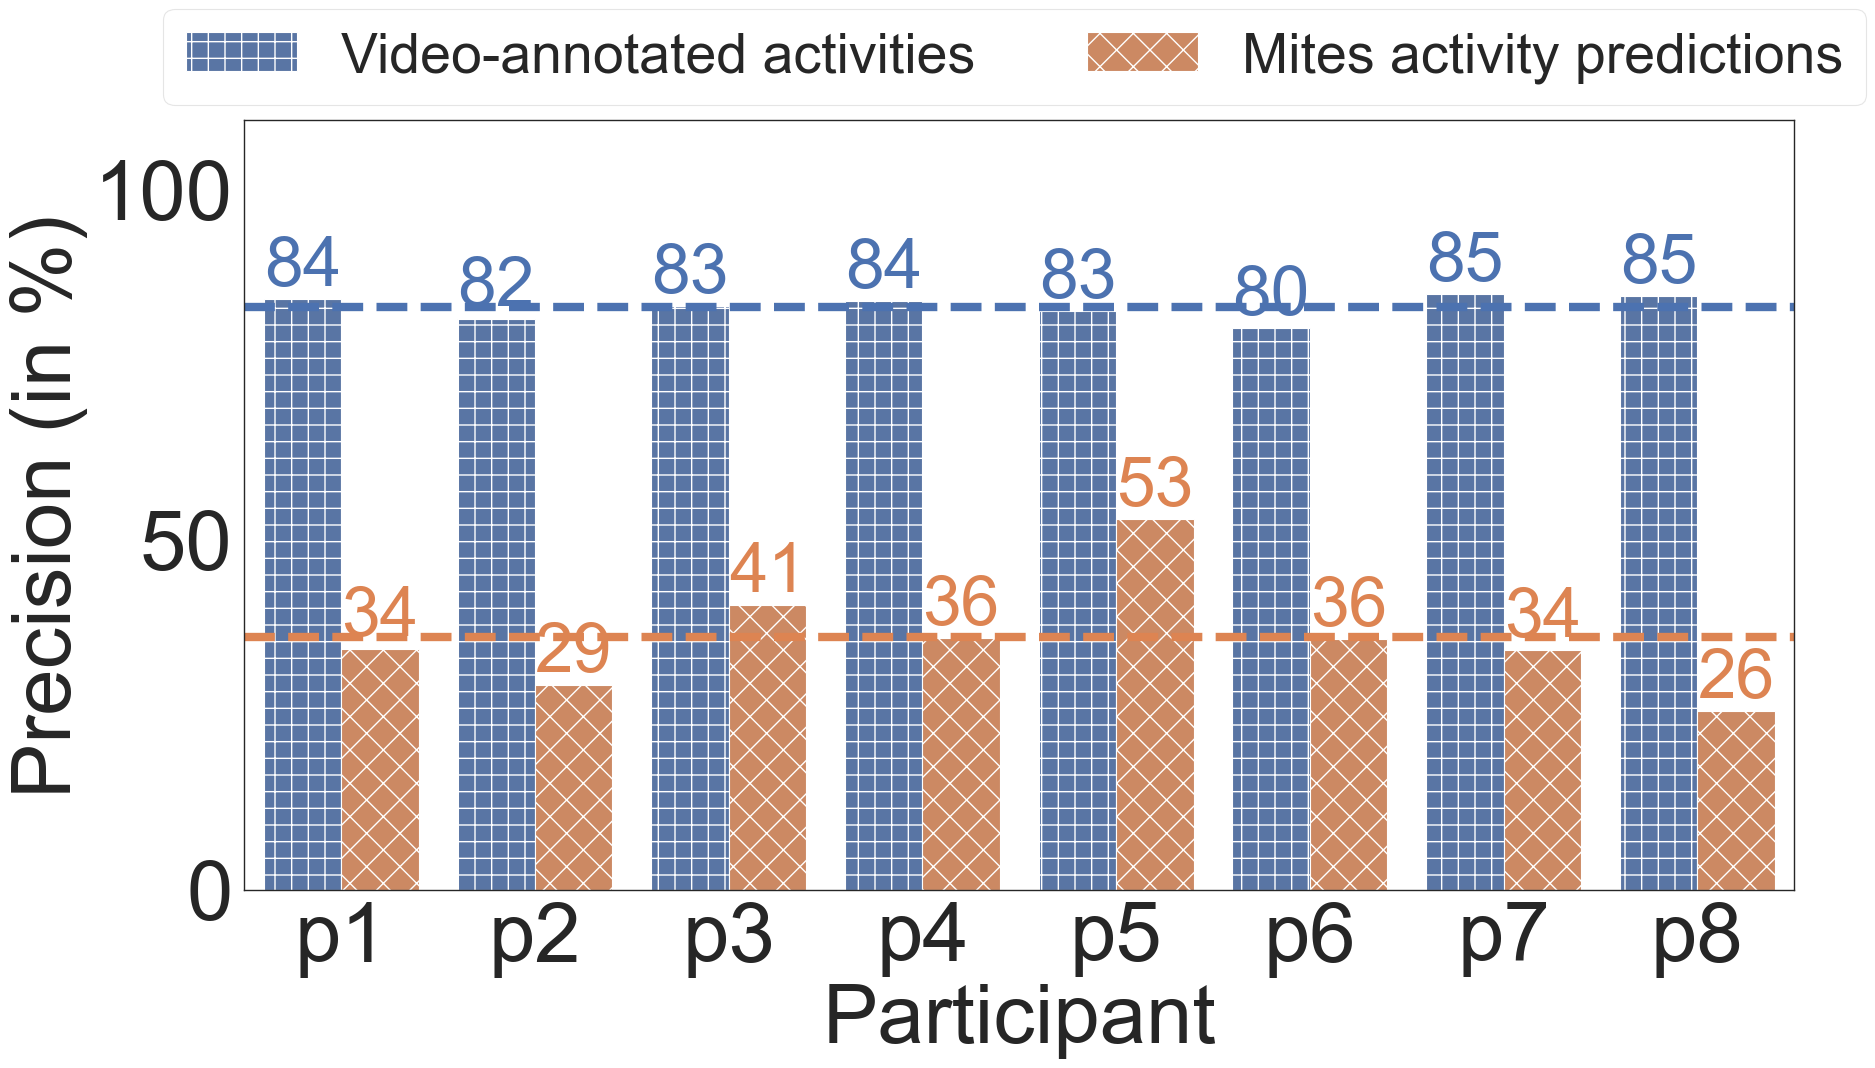

In [35]:
# plt.figure(figsize=(20,10))
# sns.barplot(data=df_rq3,x='user',y='Precision', hue='label_source')
# plt.xticks(rotation=45,ha="right")
# plt.ylim(0,100)
#


plt.figure(figsize=(20,10))
ax = sns.barplot(data=df_rq3,x='user',y='Precision',hue='label_source')
colors = ['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']
plt.ylim(0,100)
# Define some hatches
hatches = ['-', '+', 'x', '\\', '*', 'o'][1:]
# for i,p in enumerate(ax.patches):
#     height = p.get_height() # height of each horizontal bar is the same
#     width = p.get_width() # width (average number of passengers)
#     p.set_hatch(hatches[i//2)
#
#     # adding text to each bar
#     ax.text(x = width+3, # x-coordinate position of data label, padded 3 to right of bar
#             y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
#             s = "{:.0f}".format(width), # data label, formatted to ignore decimals
#             va = "center", size=60, color=colors[i//2]) # sets vertical alignment (va) to center
#
for i,p in enumerate(ax.patches):
    # get the height of each bar
    height = p.get_height()
    p.set_hatch(hatches[i//8])
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
            y = height+2, # y-coordinate position of data label, padded 100 above bar
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center', size=50, color=colors[i//8]) # sets horizontal alignment (ha) to center
plt.legend(ncol=3, bbox_to_anchor=(-0.07, 1.18),fontsize=40)
plt.axhline(y=df_rq3[df_rq3.label_source=='Video-annotated activities'].Precision.mean(),color='#4c72b0',linestyle='--',linewidth=6)
plt.axhline(y=df_rq3[df_rq3.label_source=='Mites activity predictions'].Precision.mean(),color='#dd8452',linestyle='--',linewidth=6)
plt.xlabel('Participant')
plt.grid(False)
plt.ylabel('Precision (in %)')
plt.ylim(0,110)

plt.savefig(f"{plotting_dir}/rq3_precision.pdf", dpi=400, bbox_inches='tight')


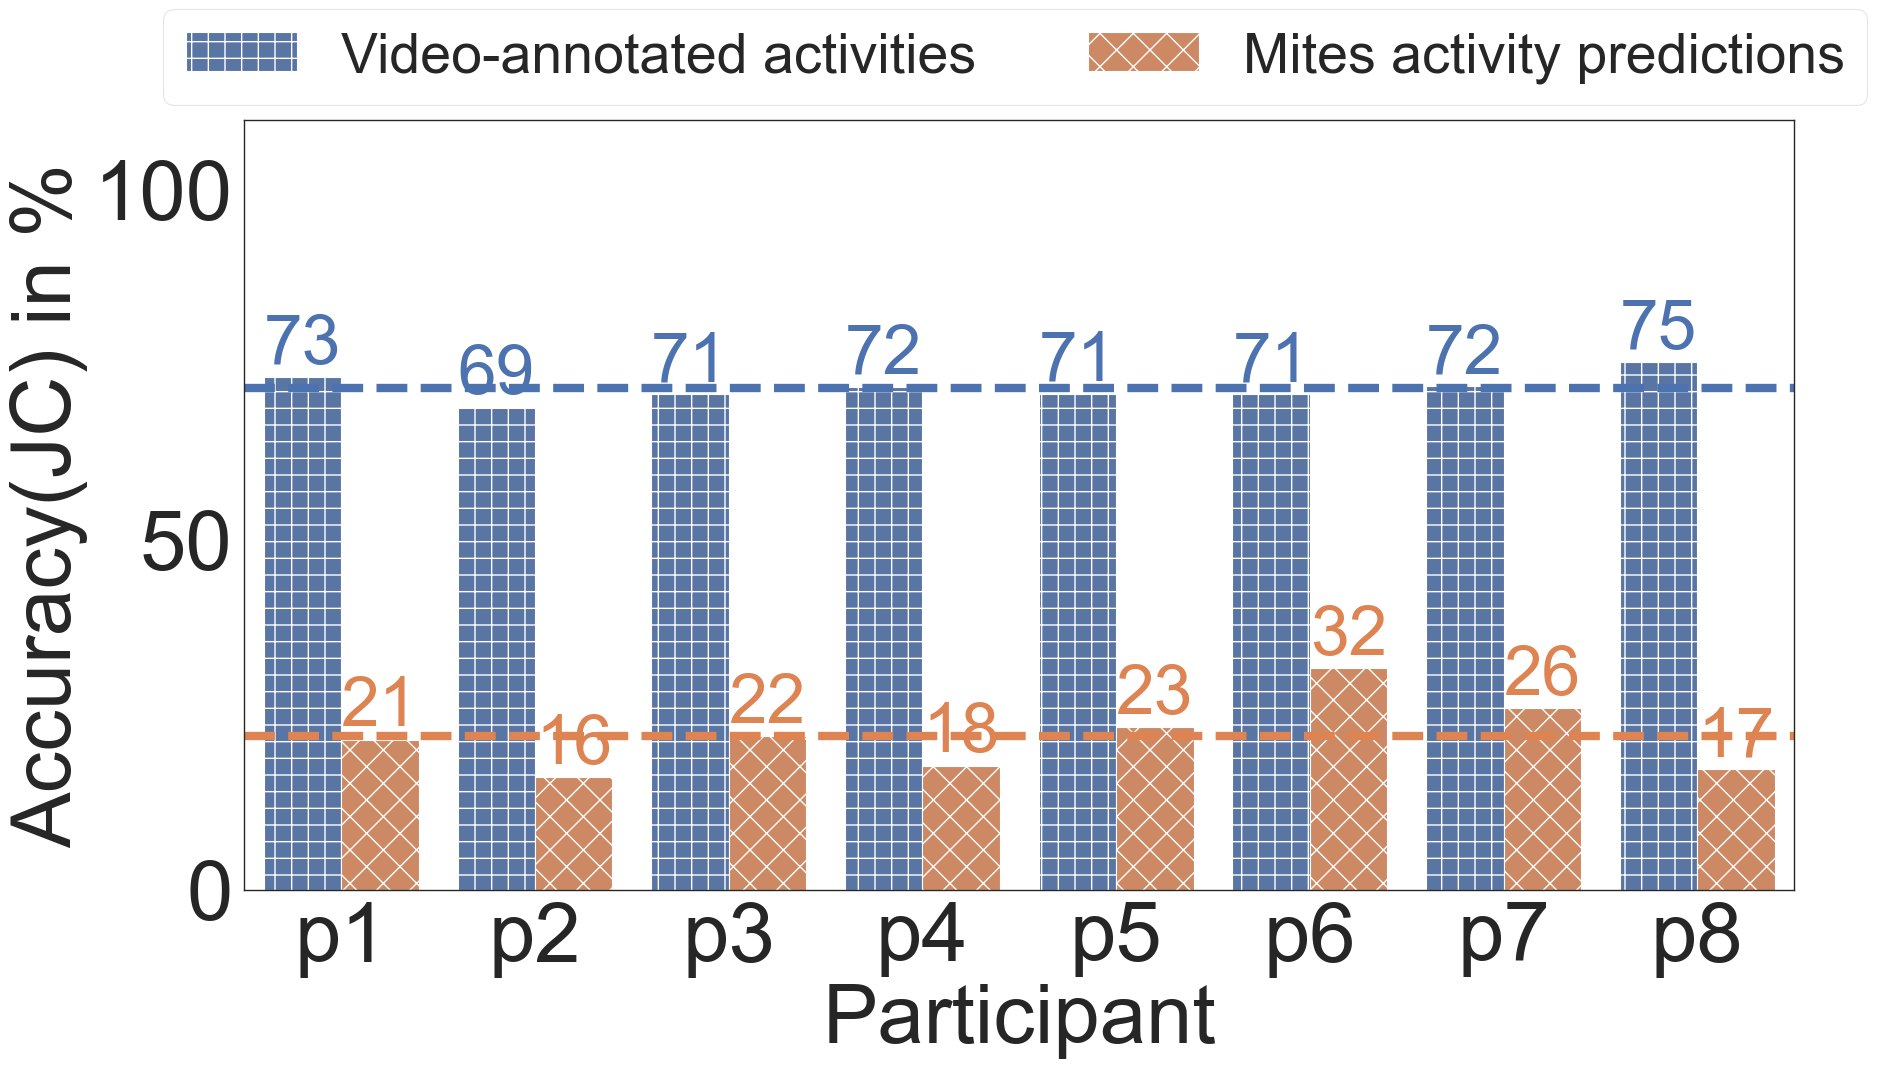

In [24]:
# plt.figure(figsize=(20,10))
# sns.barplot(data=df_rq3,x='user',y='Precision', hue='label_source')
# plt.xticks(rotation=45,ha="right")
# plt.ylim(0,100)
#


plt.figure(figsize=(20,10))
ax = sns.barplot(data=df_rq3,x='user',y='Jaccard',hue='label_source')
colors = ['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']
plt.ylim(0,100)
# Define some hatches
hatches = ['-', '+', 'x', '\\', '*', 'o'][1:]
# for i,p in enumerate(ax.patches):
#     height = p.get_height() # height of each horizontal bar is the same
#     width = p.get_width() # width (average number of passengers)
#     p.set_hatch(hatches[i//2)
#
#     # adding text to each bar
#     ax.text(x = width+3, # x-coordinate position of data label, padded 3 to right of bar
#             y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
#             s = "{:.0f}".format(width), # data label, formatted to ignore decimals
#             va = "center", size=60, color=colors[i//2]) # sets vertical alignment (va) to center
#
for i,p in enumerate(ax.patches):
    # get the height of each bar
    height = p.get_height()
    p.set_hatch(hatches[i//8])
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
            y = height+2, # y-coordinate position of data label, padded 100 above bar
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center', size=50, color=colors[i//8]) # sets horizontal alignment (ha) to center
plt.legend(ncol=3, bbox_to_anchor=(-0.07, 1.18),fontsize=40)
plt.axhline(y=df_rq3[df_rq3.label_source=='Video-annotated activities'].Jaccard.mean(),color='#4c72b0',linestyle='--',linewidth=6)
plt.axhline(y=df_rq3[df_rq3.label_source=='Mites activity predictions'].Jaccard.mean(),color='#dd8452',linestyle='--',linewidth=6)
plt.xlabel('Participant')
plt.ylabel('Accuracy(JC) in %')
plt.grid(False)
plt.ylim(0,110)

plt.savefig(f"{plotting_dir}/rq3_jaccard.pdf", dpi=400, bbox_inches='tight')


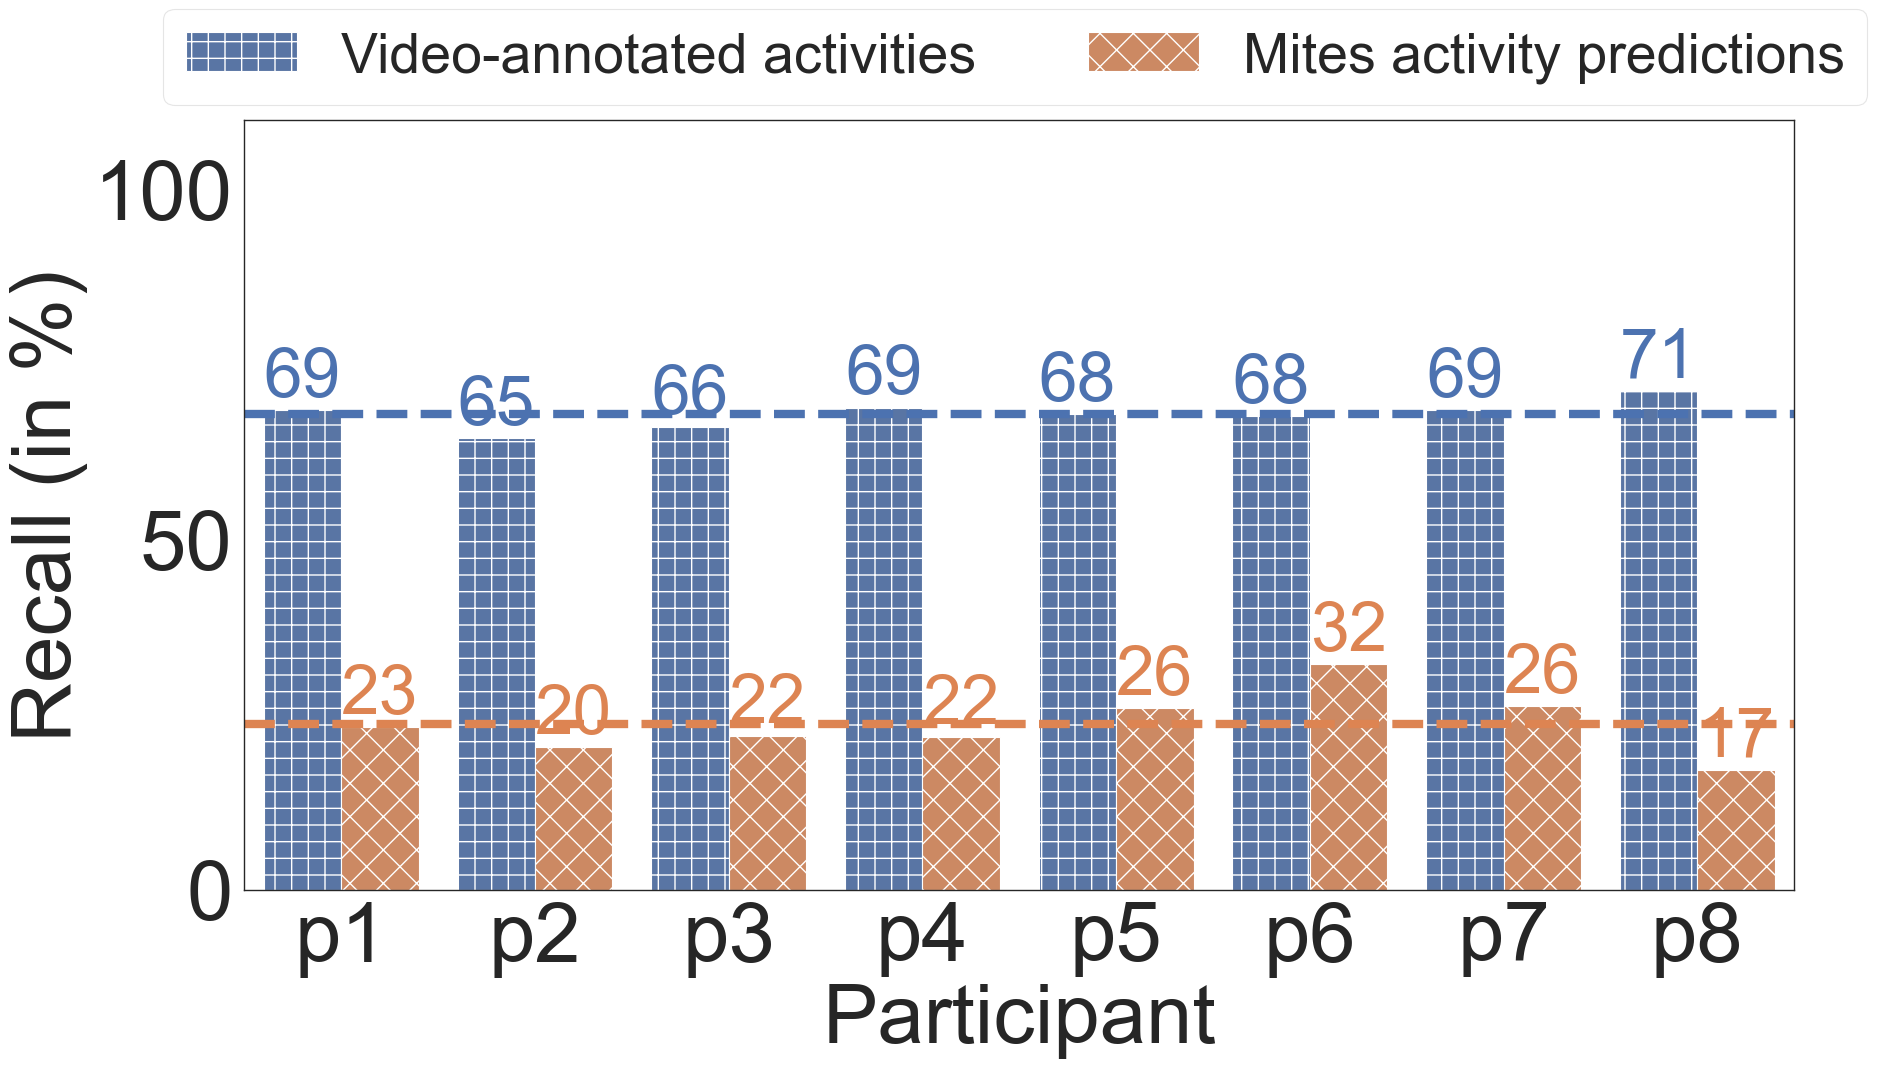

In [25]:
# plt.figure(figsize=(20,10))
# sns.barplot(data=df_rq3,x='user',y='Precision', hue='label_source')
# plt.xticks(rotation=45,ha="right")
# plt.ylim(0,100)
#


plt.figure(figsize=(20,10))
ax = sns.barplot(data=df_rq3,x='user',y='Recall',hue='label_source')
colors = ['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']
plt.ylim(0,100)
# Define some hatches
hatches = ['-', '+', 'x', '\\', '*', 'o'][1:]
# for i,p in enumerate(ax.patches):
#     height = p.get_height() # height of each horizontal bar is the same
#     width = p.get_width() # width (average number of passengers)
#     p.set_hatch(hatches[i//2)
#
#     # adding text to each bar
#     ax.text(x = width+3, # x-coordinate position of data label, padded 3 to right of bar
#             y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
#             s = "{:.0f}".format(width), # data label, formatted to ignore decimals
#             va = "center", size=60, color=colors[i//2]) # sets vertical alignment (va) to center
#
for i,p in enumerate(ax.patches):
    # get the height of each bar
    height = p.get_height()
    p.set_hatch(hatches[i//8])
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
            y = height+2, # y-coordinate position of data label, padded 100 above bar
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center', size=50, color=colors[i//8]) # sets horizontal alignment (ha) to center
plt.legend(ncol=3, bbox_to_anchor=(-0.07, 1.18),fontsize=40)
plt.axhline(y=df_rq3[df_rq3.label_source=='Video-annotated activities'].Recall.mean(),color='#4c72b0',linestyle='--',linewidth=6)
plt.axhline(y=df_rq3[df_rq3.label_source=='Mites activity predictions'].Recall.mean(),color='#dd8452',linestyle='--',linewidth=6)
plt.xlabel('Participant')
plt.ylabel('Recall (in %)')
plt.grid(False)
plt.ylim(0,110)

plt.savefig(f"{plotting_dir}/rq3_recall.pdf", dpi=400, bbox_inches='tight')


In [489]:
df_stress = pd.read_csv("../../cache/stress_scores.csv")
df_stress.info()
df_stress.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   week_id  75 non-null     object 
 1   id       75 non-null     object 
 2   week     75 non-null     object 
 3   score    75 non-null     float64
dtypes: float64(1), object(3)
memory usage: 2.5+ KB


week_id      id     week  score
0  week 1  csh101  2012_29    2.0
1  week 2  csh101  2012_30    2.0
2  week 3  csh101  2012_31    2.0
3  week 4  csh101  2012_32    1.0
4  week 5  csh101  2012_33    2.0

In [490]:
df_stress.week_id.value_counts().sort_index()

week 1    15
week 2    15
week 3    15
week 4    15
week 5    14
week 8     1
Name: week_id, dtype: int64

In [491]:
df_stress = df_stress[df_stress.id.isin(['csh109','csh113','csh114','csh107','csh104','csh103'])]

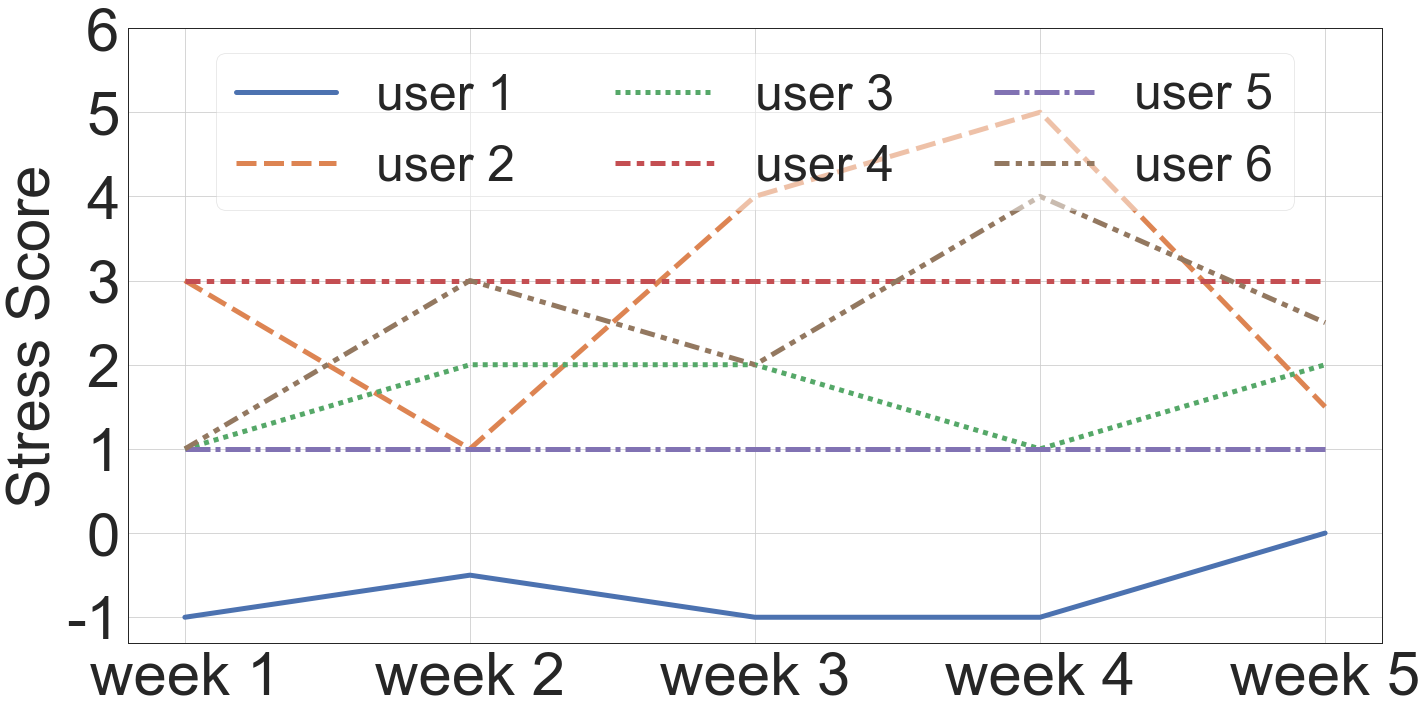

In [505]:
fig = plt.figure(figsize=(20,10))
sns.lineplot(data=df_stress,x='week_id',y='score', hue='id',style='id')
plt.yticks([-1,0,1,2,3,4,5,6],[-1,0,1,2,3,4,5,6])
plt.xlabel("")
plt.ylabel("Stress Score")
# plt.ylabel('Precision (%)')
# plt.xlabel('Lag Window (in minutes)')
plt.legend(ncol=3, loc='upper center', labels=['user 1','user 2','user 3','user 4','user 5','user 6'], fontsize=50)
# plt.ylim(0,10)

# plt.grid(False)
plt.tight_layout()
plt.savefig(f"{plotting_dir}/stress_plot.pdf",dpi=400,bbox_inches='tight')

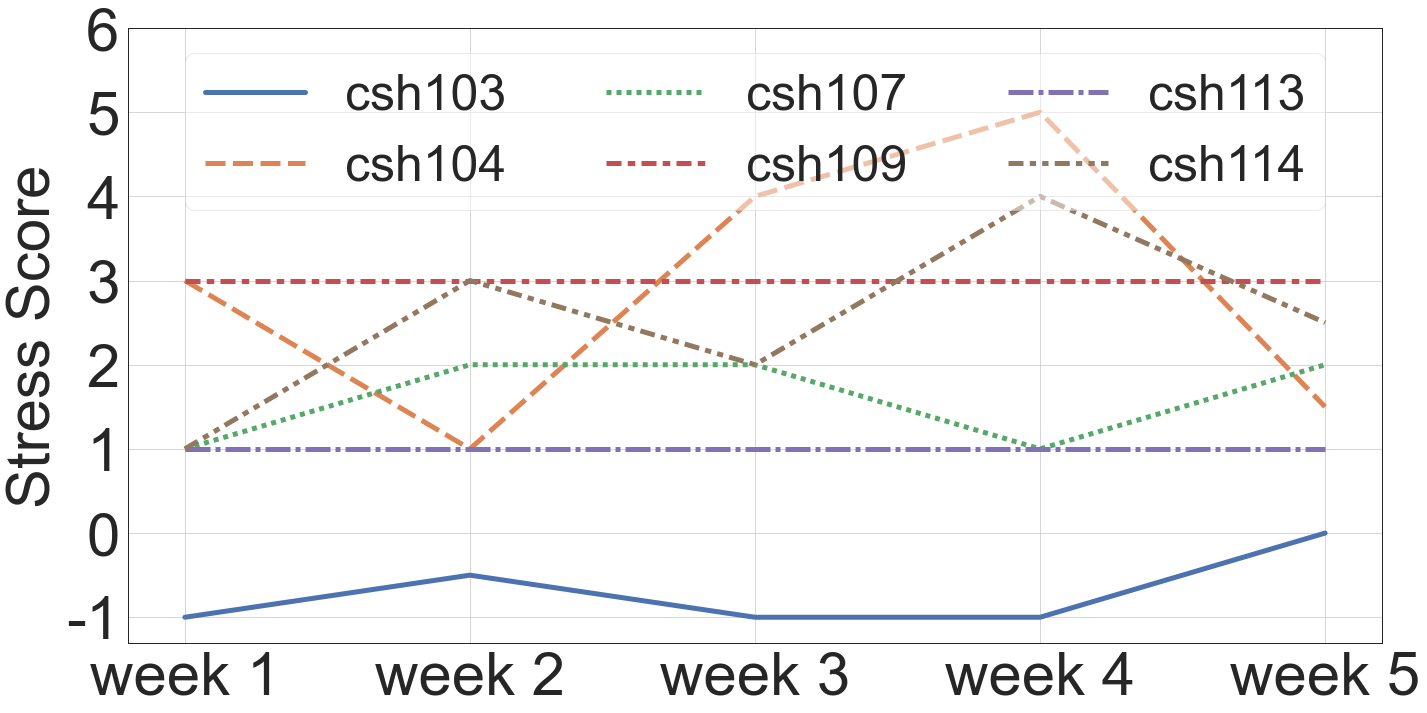

In [504]:
fig = plt.figure(figsize=(20,10))
sns.lineplot(data=df_stress,x='week_id',y='score', hue='id',style='id')
plt.yticks([-1,0,1,2,3,4,5,6],[-1,0,1,2,3,4,5,6])
plt.xlabel("")
plt.ylabel("Stress Score")
# plt.ylabel('Precision (%)')
# plt.xlabel('Lag Window (in minutes)')
plt.legend(ncol=3, loc='upper center', fontsize=50)
# plt.ylim(0,10)

# plt.grid(False)
plt.tight_layout()

In [517]:
prod_data = [{'2015-11-17': 0.0,
              '2015-11-18': 0.5156862745098039,
              '2015-11-19': 0.6343984962406015,
              '2015-11-20': 0.2857142857142857,
              '2015-11-21': 0.5,
              '2015-11-22': 0.13917525773195874}]
df_prod = None
for idx, user_prod in enumerate(prod_data):
    df_user = pd.DataFrame.from_dict(user_prod, orient='index')
    print(df_user)
    df_user = df_user.reset_index().reset_index()
    df_user.columns= ['day_id','day','score']
    df_user['id'] = f'user {idx+1}'
    df_user['day_id']  = df_user['day_id'].apply(lambda x: 'day '+ str(x+1))
    df_user = df_user[['id','day_id','score']]
    if df_prod is None:
        df_prod=df_user.copy(deep=True)
    else:
        df_prod=pd.concat([df_prod, df_user],ignore_index=False)

df_prod.info()

                   0
2015-11-17  0.000000
2015-11-18  0.515686
2015-11-19  0.634398
2015-11-20  0.285714
2015-11-21  0.500000
2015-11-22  0.139175
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      6 non-null      object 
 1   day_id  6 non-null      object 
 2   score   6 non-null      float64
dtypes: float64(1), object(2)
memory usage: 272.0+ bytes


In [518]:
df_prod.head()

id day_id     score
0  user 1  day 1  0.000000
1  user 1  day 2  0.515686
2  user 1  day 3  0.634398
3  user 1  day 4  0.285714
4  user 1  day 5  0.500000

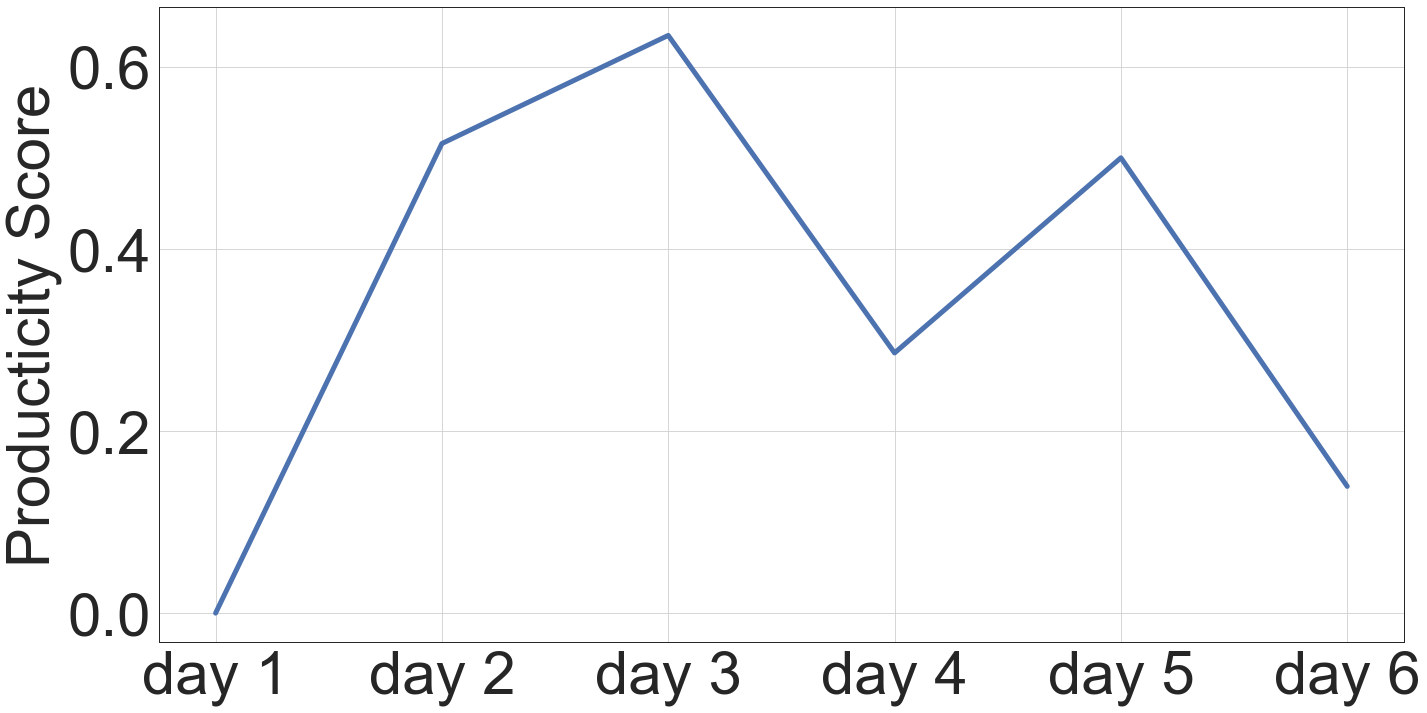

In [524]:

# plt.figure(figsize=(20,10))
# sns.lineplot(data=df_rq1a[df_rq1a.pipeline=='temporal'],x='lag',y='Precision', hue='dataset')
# plt.xticks(rotation=45,ha="right")
# plt.ylim(0,100)
# plt.savefig(f"{plotting_dir}/rq1a_precision_temporal_lag.png", dpi=150, bbox_inches='tight')

fig = plt.figure(figsize=(20,10))
ax = sns.lineplot(data=df_prod,x='day_id',y='score', hue='id')
# plt.xticks(rotation=90)
plt.ylabel('Producticity Score')
plt.xlabel('')
ax.get_legend().remove()
# plt.ylim(0,100)

# plt.grid(False)
plt.tight_layout()
plt.savefig(f"{plotting_dir}/prod_score.pdf", dpi=400, bbox_inches='tight')

In [457]:
df_stress.week.value_counts().sort_index()

2011_24    12
2011_25    12
2011_26    12
2011_27    11
2011_28    12
           ..
2012_42     1
2012_43     1
2012_44     1
2012_45     1
2012_52     2
Name: week, Length: 75, dtype: int64

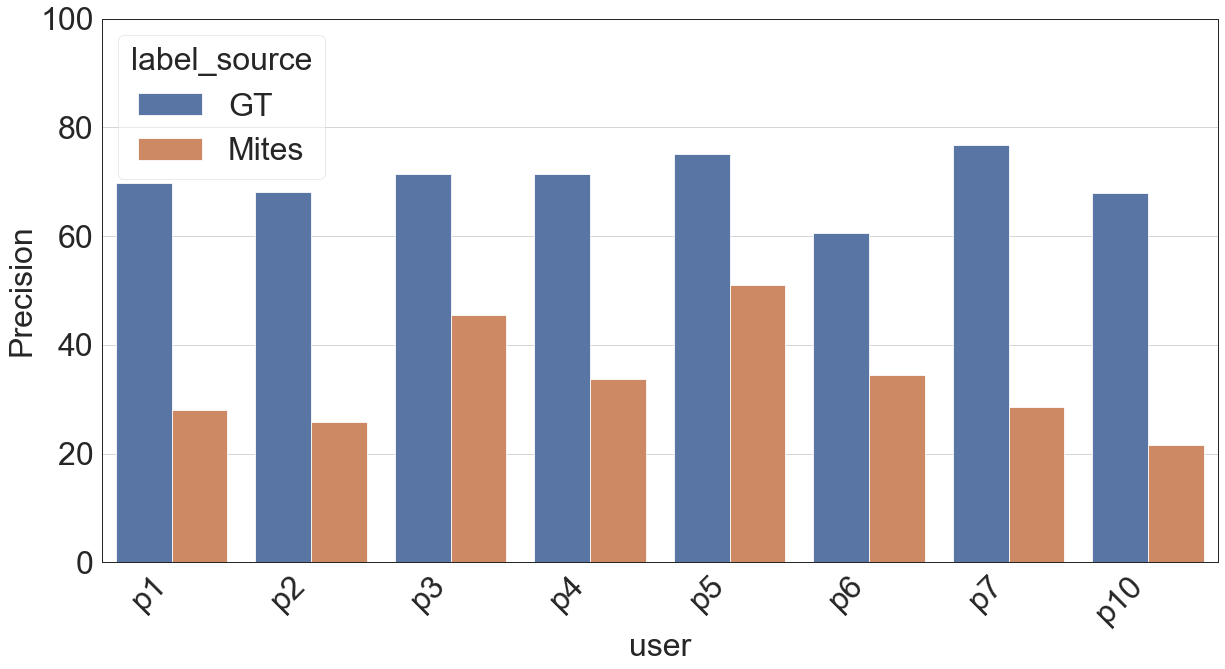

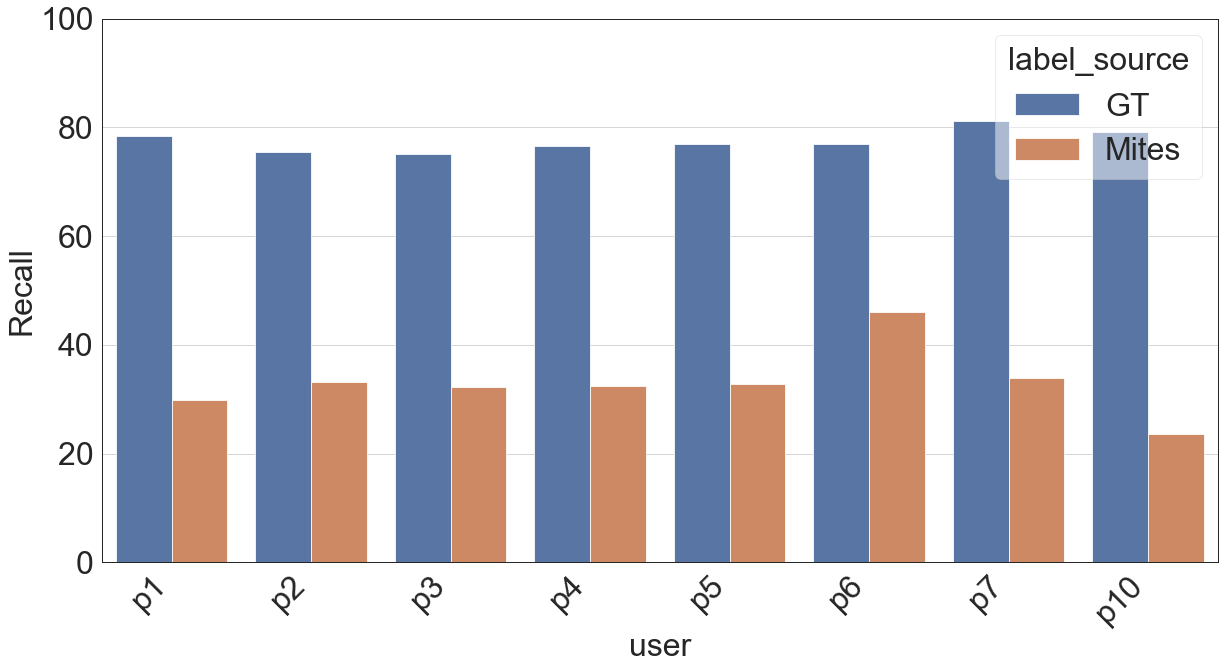

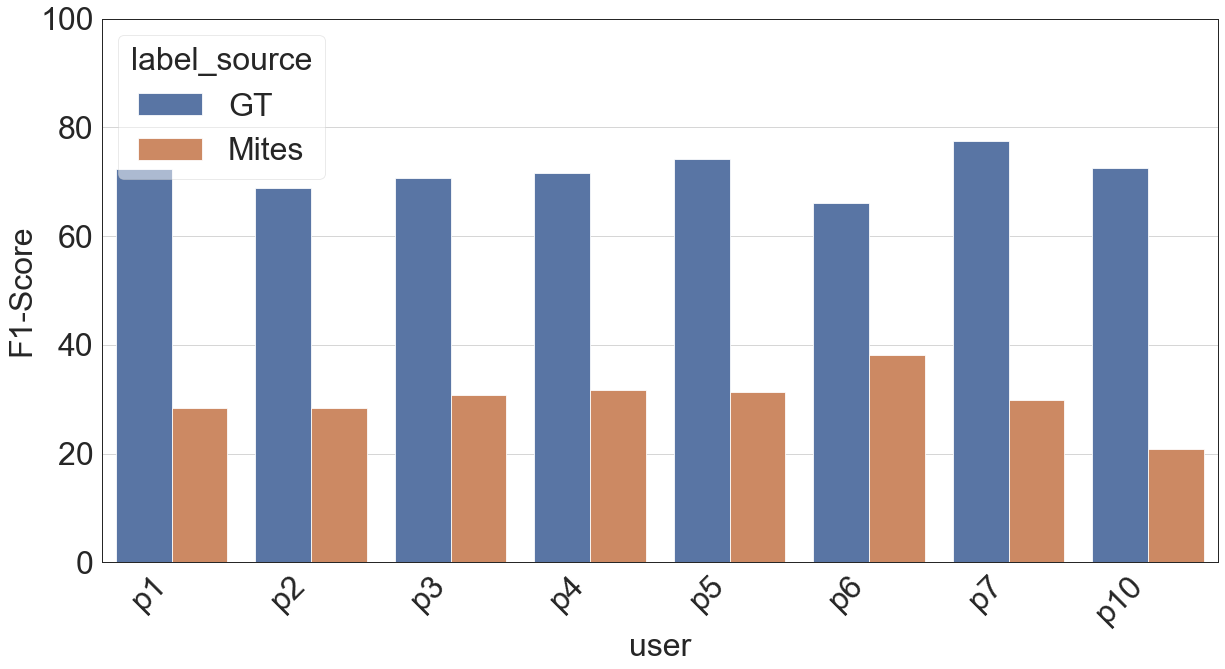

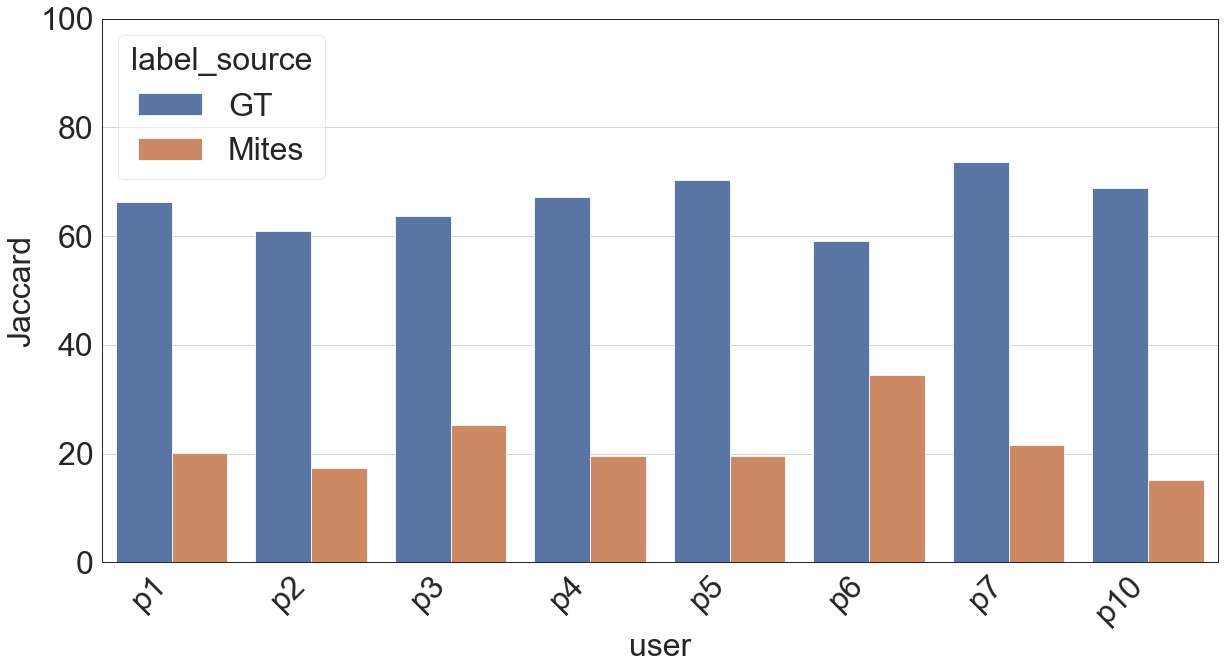

In [166]:
# plt.figure(figsize=(20,10))
# sns.barplot(data=df_rq3,x='user',y='Precision', hue='label_source')
# plt.xticks(rotation=45,ha="right")
# plt.ylim(0,100)
# plt.savefig(f"{plotting_dir}/rq3_precision_temporal.png", dpi=150, bbox_inches='tight')
#
# plt.figure(figsize=(20,10))
# sns.barplot(data=df_rq3,x='user',y='Recall', hue='label_source')
# plt.xticks(rotation=45,ha="right")
# plt.ylim(0,100)
# plt.savefig(f"{plotting_dir}/rq3_recall_temporal.png", dpi=150, bbox_inches='tight')
#
# plt.figure(figsize=(20,10))
# sns.barplot(data=df_rq3,x='user',y='F1-Score', hue='label_source')
# plt.xticks(rotation=45,ha="right")
# plt.ylim(0,100)
# plt.savefig(f"{plotting_dir}/rq3_f1_temporal.png", dpi=150, bbox_inches='tight')
#
# plt.figure(figsize=(20,10))
# sns.barplot(data=df_rq3,x='user',y='Jaccard', hue='label_source')
# plt.xticks(rotation=45,ha="right")
# plt.ylim(0,100)
# plt.savefig(f"{plotting_dir}/rq3_jaccard_temporal.png", dpi=150, bbox_inches='tight')

In [26]:
rq3c_experiments = ['p1_dataset_0.05_0.01_TAE',
                    'p2_dataset_0.05_0.01_TAE',
                    'p3_dataset_0.05_0.01_TAE',
                    'p4_dataset_0.05_0.01_TAE',
                    'p5_dataset_0.05_0.01_TAE',
                    'p6_dataset_0.05_0.01_TAE',
                    'p7_dataset_0.05_0.01_TAE',
                    'p10_dataset_0.05_0.01_TAE']
df_rq3c = None
for rq3c_exp in rq3c_experiments:
    exp_dir = f"{result_dir}/{rq3c_exp}"
    exp_contexts = json.load(open(f"{exp_dir}/all_contexts.json"))
    df_exp_overall = pd.read_csv(f"{exp_dir}/context_metrics.csv")
    df_exp_overall.columns = ['index','Context','Onto-Precision','Onto-Recall','Temporal-Precision','Temporal-Recall','Combined-Precision','Combined-Recall']
    exp_user = rq3c_exp.split("_")[0]
    df_exp_overall['user'] = exp_user
    df_exp_overall = df_exp_overall[['user','Context','Onto-Precision','Onto-Recall','Temporal-Precision','Temporal-Recall','Combined-Precision','Combined-Recall']]
    if df_rq3c is None:
        df_rq3c = df_exp_overall.copy(deep=True)
    else:
        df_rq3c = pd.concat([df_rq3c,df_exp_overall],ignore_index=True)
df_rq3c = df_rq3c.groupby('Context').mean()
df_rq3c.info()
df_rq3c

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, ComingIn to Relaxing
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Onto-Precision      10 non-null     float64
 1   Onto-Recall         10 non-null     float64
 2   Temporal-Precision  10 non-null     float64
 3   Temporal-Recall     10 non-null     float64
 4   Combined-Precision  10 non-null     float64
 5   Combined-Recall     10 non-null     float64
dtypes: float64(6)
memory usage: 560.0+ bytes


/var/folders/tj/q4_hs7215pl0xywz58dv85l00000gp/T/ipykernel_10998/2190512819.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_rq3c = df_rq3c.groupby('Context').mean()


Onto-Precision  Onto-Recall  Temporal-Precision  \
Context                                                            
ComingIn              100.00000     67.26875            87.20125   
Exercising            100.00000     93.25625            86.25500   
HavingMeal             98.21375     69.33750            72.34000   
HouseWork             100.00000     73.94625            55.06250   
InAMeeting              0.00000      0.00000             0.00000   
MealPreparation         0.00000      0.00000             0.00000   
OfficeWork            100.00000     68.35000            84.69875   
PhoneCall              54.21625     31.84750            76.58000   
PreparingMeal           0.00000      0.00000             0.00000   
Relaxing              100.00000     52.86000            46.02625   

                 Temporal-Recall  Combined-Precision  Combined-Recall  
Context                                                                
ComingIn                99.68000            98.24500         99.68000  
Exercising              99.42125            97.56250         99.42125  
HavingMeal              85.35125            87.29000         71.43375  
HouseWork               86.44500            88.35750         87.66625  
InAMeeting               0.00000             0.00000          0.00000  
MealPreparation          0.00000             0.00000          0.00000  
OfficeWork              79.34500            98.78375         73.04125  
PhoneCall               56.47500            69.81875         39.98250  
PreparingMeal            0.00000             0.00000          0.00000  
Relaxing                92.86875            77.87000         58.04875

In [27]:
rq3d_experiments = ['mites_p1_dataset_0.05_0.01_TAE',
                    'mites_p2_dataset_0.05_0.01_TAE',
                    'mites_p3_dataset_0.05_0.01_TAE',
                    'mites_p4_dataset_0.05_0.01_TAE',
                    'mites_p5_dataset_0.05_0.01_TAE',
                    'mites_p6_dataset_0.05_0.01_TAE',
                    'mites_p7_dataset_0.05_0.01_TAE',
                    'mites_p10_dataset_0.05_0.01_TAE']
df_rq3d = None
for rq3d_exp in rq3d_experiments:
    exp_dir = f"{result_dir}/{rq3d_exp}"
    exp_contexts = json.load(open(f"{exp_dir}/all_contexts.json"))
    df_exp_overall = pd.read_csv(f"{exp_dir}/context_metrics.csv")
    df_exp_overall.columns = ['index','Context','Onto-Precision','Onto-Recall','Temporal-Precision','Temporal-Recall','Combined-Precision','Combined-Recall']
    exp_user = rq3d_exp.split("_")[0]
    df_exp_overall['user'] = exp_user
    df_exp_overall = df_exp_overall[['user','Context','Onto-Precision','Onto-Recall','Temporal-Precision','Temporal-Recall','Combined-Precision','Combined-Recall']]
    if df_rq3d is None:
        df_rq3d = df_exp_overall.copy(deep=True)
    else:
        df_rq3d = pd.concat([df_rq3d,df_exp_overall],ignore_index=True)
df_rq3d = df_rq3d.groupby('Context').mean()
df_rq3d.info()
df_rq3d

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, ComingIn to Relaxing
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Onto-Precision      10 non-null     float64
 1   Onto-Recall         10 non-null     float64
 2   Temporal-Precision  10 non-null     float64
 3   Temporal-Recall     10 non-null     float64
 4   Combined-Precision  10 non-null     float64
 5   Combined-Recall     10 non-null     float64
dtypes: float64(6)
memory usage: 560.0+ bytes


/var/folders/tj/q4_hs7215pl0xywz58dv85l00000gp/T/ipykernel_10998/4002586516.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_rq3d = df_rq3d.groupby('Context').mean()


Onto-Precision  Onto-Recall  Temporal-Precision  \
Context                                                            
ComingIn               20.69250     44.81875            13.11250   
Exercising             38.12500     26.78000            29.82125   
HavingMeal             19.36375     13.74250            14.06125   
HouseWork              21.47750      3.31250            26.58750   
InAMeeting              0.00000      0.00000             0.00000   
MealPreparation         0.00000      0.00000             0.00000   
OfficeWork             55.95500     21.57375            52.41250   
PhoneCall              26.53750     10.35875            17.05875   
PreparingMeal           0.00000      0.00000             0.00000   
Relaxing               72.16375     12.13625            40.48875   

                 Temporal-Recall  Combined-Precision  Combined-Recall  
Context                                                                
ComingIn                71.60250            17.47250         64.03875  
Exercising              35.18125            33.99125         36.36000  
HavingMeal              23.77375            16.57125         17.43000  
HouseWork                2.78125            23.48750          4.58125  
InAMeeting               0.00000             0.00000          0.00000  
MealPreparation          0.00000             0.00000          0.00000  
OfficeWork              52.41125            55.96125         36.02875  
PhoneCall               22.28250            21.17875         13.36500  
PreparingMeal            0.00000             0.00000          0.00000  
Relaxing                40.05500            46.30250         24.44125

In [28]:
df_rq3c['label_source'] = 'GT'
df_rq3d['label_source'] = 'Mites'
rq3_ctx = pd.concat([df_rq3c, df_rq3d],ignore_index=False).reset_index()[['label_source','Context','Combined-Precision','Combined-Recall']]
rq3_ctx

label_source          Context  Combined-Precision  Combined-Recall
0            GT         ComingIn            98.24500         99.68000
1            GT       Exercising            97.56250         99.42125
2            GT       HavingMeal            87.29000         71.43375
3            GT        HouseWork            88.35750         87.66625
4            GT       InAMeeting             0.00000          0.00000
5            GT  MealPreparation             0.00000          0.00000
6            GT       OfficeWork            98.78375         73.04125
7            GT        PhoneCall            69.81875         39.98250
8            GT    PreparingMeal             0.00000          0.00000
9            GT         Relaxing            77.87000         58.04875
10        Mites         ComingIn            17.47250         64.03875
11        Mites       Exercising            33.99125         36.36000
12        Mites       HavingMeal            16.57125         17.43000
13        Mites        HouseWork            23.48750          4.58125
14        Mites       InAMeeting             0.00000          0.00000
15        Mites  MealPreparation             0.00000          0.00000
16        Mites       OfficeWork            55.96125         36.02875
17        Mites        PhoneCall            21.17875         13.36500
18        Mites    PreparingMeal             0.00000          0.00000
19        Mites         Relaxing            46.30250         24.44125

In [187]:
rq3_ctx.round(2).to_csv(f"{plotting_dir}/rq3_ctx_table.csv",index=False)

In [183]:
rq3_ctx

label_source          Context  Onto-Precision  Onto-Recall  \
0            GT         ComingIn       100.00000     67.26875   
1            GT       Exercising       100.00000     93.25625   
2            GT       HavingMeal        98.21375     69.33750   
3            GT        HouseWork       100.00000     73.94625   
4            GT       InAMeeting         0.00000      0.00000   
5            GT  MealPreparation         0.00000      0.00000   
6            GT       OfficeWork       100.00000     68.35000   
7            GT        PhoneCall        54.21625     31.84750   
8            GT    PreparingMeal         0.00000      0.00000   
9            GT         Relaxing       100.00000     52.86000   
10        Mites         ComingIn        20.69250     44.81875   
11        Mites       Exercising        38.12500     26.78000   
12        Mites       HavingMeal        19.36375     13.74250   
13        Mites        HouseWork        21.47750      3.31250   
14        Mites       InAMeeting         0.00000      0.00000   
15        Mites  MealPreparation         0.00000      0.00000   
16        Mites       OfficeWork        55.95500     21.57375   
17        Mites        PhoneCall        26.53750     10.35875   
18        Mites    PreparingMeal         0.00000      0.00000   
19        Mites         Relaxing        72.16375     12.13625   

    Temporal-Precision  Temporal-Recall  Combined-Precision  Combined-Recall  
0             87.20125         99.68000            87.20125         99.68000  
1             86.25500         99.42125            86.25500         99.42125  
2             72.34000         85.35125            72.34000         85.35125  
3             55.06250         86.44500            58.61875         98.71250  
4              0.00000          0.00000             0.00000          0.00000  
5              0.00000          0.00000             0.00000          0.00000  
6             84.69875         79.34500            84.77500         79.90625  
7             76.58000         56.47500            56.02750         56.71750  
8              0.00000          0.00000             0.00000          0.00000  
9             46.02625         92.86875            46.02625         92.86875  
10            13.11250         71.60250            15.23500         82.04750  
11            29.82125         35.18125            32.77500         43.74875  
12            14.06125         23.77375            13.85375         23.77375  
13            26.58750          2.78125            23.69250          5.55000  
14             0.00000          0.00000             0.00000          0.00000  
15             0.00000          0.00000             0.00000          0.00000  
16            52.41250         52.41125            53.05000         54.21250  
17            17.05875         22.28250            19.20250         22.98125  
18             0.00000          0.00000             0.00000          0.00000  
19            40.48875         40.05500            39.28500         41.28625

In [29]:
prod_dict = {'0BFC35E2-4817-4865-BFA7-764742302A2D':
                                          {'2015-10-21': {'Predicted Context': 0.18549023396677122,
   'Ground truth Context': 0.21770431682653968,
   'Activities Only': 0.63288938292083327},
  '2015-10-22': {'Predicted Context': 0.16225885515496521,
   'Ground truth Context': 0.0,
   'Activities Only': 0.42741226825209196},
  '2015-10-23': {'Predicted Context': 0.033316256830601104,
   'Ground truth Context': 0.05734289617486339,
   'Activities Only': 0.13927766393442622},
  '2015-10-24': {'Predicted Context': 0.03186354434319196,
   'Ground truth Context': 0.03745803588134545,
   'Activities Only': 0.09818861634450697},
  '2015-10-25': {'Predicted Context': 0.35340676229508196,
   'Ground truth Context': 0.33027498677948175,
   'Activities Only': 0.050175171866737166},
  '2015-10-26': {'Predicted Context': 0.29937469148088528,
   'Ground truth Context': 0.3086554906474922,
   'Activities Only': 0.4907779288290592},
  '2015-10-27': {'Predicted Context': 0.09485418870086373,
   'Ground truth Context': 0.08768012956107879,
   'Activities Only': 0.2374686012691698}}}


# Distribution plots for incremental data

In [48]:
result_date = '20220914'
result_dir = f'results/{result_date}'
rq1bd_experiments = [
                    'casas_csh101_1days_5_1_TAE',
                    'casas_csh101_7days_5_1_TAE',
                    'casas_csh101_14days_5_1_TAE',
                    'casas_csh101_30days_5_1_TAE',
                    'extrasensory_0E6184E1-90C0-48EE-B25A-F1ECB7B9714E_1days_5_1_TAE',
                    'extrasensory_0E6184E1-90C0-48EE-B25A-F1ECB7B9714E_2days_5_1_TAE',
                    'extrasensory_0E6184E1-90C0-48EE-B25A-F1ECB7B9714E_4days_5_1_TAE',
                    'extrasensory_0E6184E1-90C0-48EE-B25A-F1ECB7B9714E_6days_5_1_TAE']

df_rq1bd = None
for rq1bd_exp in rq1bd_experiments:
    exp_dir = f"{result_dir}/{rq1bd_exp}"
    exp_compiled_results_dict = pickle.load(open(f"{exp_dir}/compiled_results.pb","rb"))
    user_id = list(exp_compiled_results_dict.keys())[0]
    days = int(rq1bd_exp.split("_")[-4].split("days")[0])
    dataset  =rq1bd_exp.split("_")[0]
    user_results = exp_compiled_results_dict[user_id]
    user_results = user_results[['id','timestamp','gt_context','combined_context']]
    user_results.columns = ['id','timestamp','gt','prediction']
    user_results['days'] = days
    user_results['dataset'] = dataset

    # get gt counts
    user_results_gt = user_results.drop('prediction',axis=1)
    context_list = ['Amusement', 'ComingIn', 'Commuting', 'Exercising', 'GoingOut', 'HavingMeal', 'HouseWork', 'Inactivity',
                    'Meal_Preparation', 'None', 'OfficeWork', 'OnAPhoneCall', 'PhoneCall', 'PreparingMeal', 'Relaxing',
                    'Sleeping', 'UsingBathroom',"InAMeeting"]
    user_results_gt['val'] = 1
    user_results_gt=  user_results_gt.groupby(['id','days','dataset','gt'],as_index=False)['val'].sum()
    for context in context_list:
        user_results_gt[context] = user_results_gt.apply(lambda row: row['val'] if (context in row['gt']) else 0, axis=1)
    user_results_gt = user_results_gt.drop(['gt','val'],axis=1).groupby(['id','days','dataset'],as_index=False).sum()
    user_results_gt['type'] = 'gt'

    user_results_prediction = user_results.drop('gt',axis=1)
    context_list = ['Amusement', 'ComingIn', 'Commuting', 'Exercising', 'GoingOut', 'HavingMeal', 'HouseWork', 'Inactivity',
                    'Meal_Preparation', 'None', 'OfficeWork', 'OnAPhoneCall', 'PhoneCall', 'PreparingMeal', 'Relaxing',
                    'Sleeping', 'UsingBathroom',"InAMeeting"]
    user_results_prediction['val'] = 1
    user_results_prediction=  user_results_prediction.groupby(['id','days','dataset','prediction'],as_index=False)['val'].sum()
    for context in context_list:
        user_results_prediction[context] = user_results_prediction.apply(lambda row: row['val'] if (context in row['prediction']) else 0, axis=1)
    user_results_prediction = user_results_prediction.drop(['prediction','val'],axis=1).groupby(['id','days','dataset'],as_index=False).sum()
    user_results_prediction['type'] = 'prediction'
    user_results = pd.concat([user_results_gt,user_results_prediction])
    if df_rq1bd is None:
        df_rq1bd = user_results.copy(deep=True)
    else:
        df_rq1bd = pd.concat([df_rq1bd, user_results])


In [49]:
df_rq1bd

id  days       dataset  Amusement  \
0                                csh101     1         casas          0   
0                                csh101     1         casas          0   
0                                csh101     7         casas          0   
0                                csh101     7         casas          0   
0                                csh101    14         casas          0   
0                                csh101    14         casas          0   
0                                csh101    30         casas          0   
0                                csh101    30         casas          0   
0  0E6184E1-90C0-48EE-B25A-F1ECB7B9714E     1  extrasensory      56211   
0  0E6184E1-90C0-48EE-B25A-F1ECB7B9714E     1  extrasensory      67625   
0  0E6184E1-90C0-48EE-B25A-F1ECB7B9714E     2  extrasensory      56211   
0  0E6184E1-90C0-48EE-B25A-F1ECB7B9714E     2  extrasensory      65830   
0  0E6184E1-90C0-48EE-B25A-F1ECB7B9714E     4  extrasensory      56211   
0  0E6184E1-90C0-48EE-B25A-F1ECB7B9714E     4  extrasensory      47287   
0  0E6184E1-90C0-48EE-B25A-F1ECB7B9714E     6  extrasensory      56331   
0  0E6184E1-90C0-48EE-B25A-F1ECB7B9714E     6  extrasensory      60249   

   ComingIn  Commuting  Exercising  GoingOut  HavingMeal  HouseWork  \
0      1338          0           0      4791       62559      12555   
0         0          0           0     18404           0          0   
0      1252          0           0      3905       47697       9604   
0      5412          0           0     10102       28482      57086   
0        74          0           0      1779       29164       4545   
0         0          0           0     57382        5113       9737   
0        32          0           0      1739       18837       3306   
0     59183          0           0      3307       24150      11479   
0         0       4461           0         0        3877      15283   
0     40270          0           0         0        2644          0   
0         0       4461           0         0        3877      15283   
0      2768       5948           0         0        1985       4624   
0         0       4461           0         0        3877      15283   
0         0       9371           0         0        4322       9786   
0         0       4461           0         0        3877      15403   
0      1142       8830           0         0           0       9485   

   Inactivity  Meal_Preparation  None  OfficeWork  OnAPhoneCall  PhoneCall  \
0           0                 0     0       80971             0      11884   
0           0                 0     0           0             0       7521   
0           0                 0     0       58102             0       9359   
0           0                 0     0       21193             0      10397   
0           0                 0     0       34408             0       6249   
0           0                 0     0       19511             0      11896   
0           0                 0     0       17119             0       4799   
0           0                 0     0       23959             0      12496   
0           0                 0     0           0             0          0   
0           0                 0     0       19443             0          0   
0           0                 0     0           0             0          0   
0           0                 0     0       13265             0          0   
0           0                 0     0           0             0          0   
0           0                 0     0           0             0          0   
0           0                 0     0           0             0          0   
0           0                 0     0           0             0          0   

   PreparingMeal  Relaxing  Sleeping  UsingBathroom  InAMeeting        type  
0          18321    567963    978256         140589           0          gt  
0              0    355570   2830483         315137           0  prediction  
0        

In [50]:
df_rq1bd['total'] = df_rq1bd[context_list].sum(axis=1)
for context in context_list:
    df_rq1bd[context] = df_rq1bd[context]/df_rq1bd['total']
df_rq1bd

id  days       dataset  Amusement  \
0                                csh101     1         casas   0.000000   
0                                csh101     1         casas   0.000000   
0                                csh101     7         casas   0.000000   
0                                csh101     7         casas   0.000000   
0                                csh101    14         casas   0.000000   
0                                csh101    14         casas   0.000000   
0                                csh101    30         casas   0.000000   
0                                csh101    30         casas   0.000000   
0  0E6184E1-90C0-48EE-B25A-F1ECB7B9714E     1  extrasensory   0.451407   
0  0E6184E1-90C0-48EE-B25A-F1ECB7B9714E     1  extrasensory   0.520264   
0  0E6184E1-90C0-48EE-B25A-F1ECB7B9714E     2  extrasensory   0.451407   
0  0E6184E1-90C0-48EE-B25A-F1ECB7B9714E     2  extrasensory   0.500114   
0  0E6184E1-90C0-48EE-B25A-F1ECB7B9714E     4  extrasensory   0.451407   
0  0E6184E1-90C0-48EE-B25A-F1ECB7B9714E     4  extrasensory   0.381516   
0  0E6184E1-90C0-48EE-B25A-F1ECB7B9714E     6  extrasensory   0.451067   
0  0E6184E1-90C0-48EE-B25A-F1ECB7B9714E     6  extrasensory   0.522301   

   ComingIn  Commuting  Exercising  GoingOut  HavingMeal  HouseWork  \
0  0.000712   0.000000         0.0  0.002549    0.033290   0.006681   
0  0.000000   0.000000         0.0  0.005218    0.000000   0.000000   
0  0.000870   0.000000         0.0  0.002714    0.033144   0.006674   
0  0.001893   0.000000         0.0  0.003534    0.009965   0.019972   
0  0.000081   0.000000         0.0  0.001947    0.031917   0.004974   
0  0.000000   0.000000         0.0  0.026522    0.002363   0.004500   
0  0.000061   0.000000         0.0  0.003308    0.035832   0.006289   
0  0.072107   0.000000         0.0  0.004029    0.029424   0.013986   
0  0.000000   0.035824         0.0  0.000000    0.031135   0.122731   
0  0.309812   0.000000         0.0  0.000000    0.020341   0.000000   
0  0.000000   0.035824         0.0  0.000000    0.031135   0.122731   
0  0.021029   0.045187         0.0  0.000000    0.015080   0.035129   
0  0.000000   0.035824         0.0  0.000000    0.031135   0.122731   
0  0.000000   0.075606         0.0  0.000000    0.034870   0.078954   
0  0.000000   0.035721         0.0  0.000000    0.031045   0.123338   
0  0.009900   0.076548         0.0  0.000000    0.000000   0.082226   

   Inactivity  Meal_Preparation  None  OfficeWork  OnAPhoneCall  PhoneCall  \
0         0.0               0.0   0.0    0.043087           0.0   0.006324   
0         0.0               0.0   0.0    0.000000           0.0   0.002132   
0         0.0               0.0   0.0    0.040374           0.0   0.006503   
0         0.0               0.0   0.0    0.007415           0.0   0.003637   
0         0.0               0.0   0.0    0.037656           0.0   0.006839   
0         0.0               0.0   0.0    0.009018           0.0   0.005498   
0         0.0               0.0   0.0    0.032564           0.0   0.009129   
0         0.0               0.0   0.0    0.029191           0.0   0.015225   
0         0.0               0.0   0.0    0.000000           0.0   0.000000   
0         0.0               0.0   0.0    0.149582           0.0   0.000000   
0         0.0               0.0   0.0    0.000000           0.0   0.000000   
0         0.0               0.0   0.0    0.100775           0.0   0.000000   
0         0.0               0.0   0.0    0.000000           0.0   0.000000   
0         0.0               0.0   0.0    0.000000           0.0   0.000000   
0         0.0               0.0   0.0    0.000000           0.0   0.000000   
0         0.0               0.0   0.0    0.000000           0.0   0.000000   

   PreparingMeal  Relaxing  Sleeping  UsingBathroom  InAMeeting        type  \
0       0.009749  0.302232  0.520563       0.074812    0.000000          gt   
0       0.000000  0.100810  0.802492       0.089347    0.000000  prediction   
0     

In [51]:
df_rq1bd = pd.melt(df_rq1bd, id_vars=['id','dataset','days','type'], value_name='fraction',var_name='context')
df_rq1bd

id       dataset  days        type  \
0                                  csh101         casas     1          gt   
1                                  csh101         casas     1  prediction   
2                                  csh101         casas     7          gt   
3                                  csh101         casas     7  prediction   
4                                  csh101         casas    14          gt   
..                                    ...           ...   ...         ...   
299  0E6184E1-90C0-48EE-B25A-F1ECB7B9714E  extrasensory     2  prediction   
300  0E6184E1-90C0-48EE-B25A-F1ECB7B9714E  extrasensory     4          gt   
301  0E6184E1-90C0-48EE-B25A-F1ECB7B9714E  extrasensory     4  prediction   
302  0E6184E1-90C0-48EE-B25A-F1ECB7B9714E  extrasensory     6          gt   
303  0E6184E1-90C0-48EE-B25A-F1ECB7B9714E  extrasensory     6  prediction   

       context  fraction  
0    Amusement       0.0  
1    Amusement       0.0  
2    Amusement       0.0  
3    Amusement       0.0  
4    Amusement       0.0  
..         ...       ...  
299      total  131630.0  
300      total  124524.0  
301      total  123945.0  
302      total  124884.0  
303      total  115353.0  

[304 rows x 6 columns]

# CASAS GT distribution plot

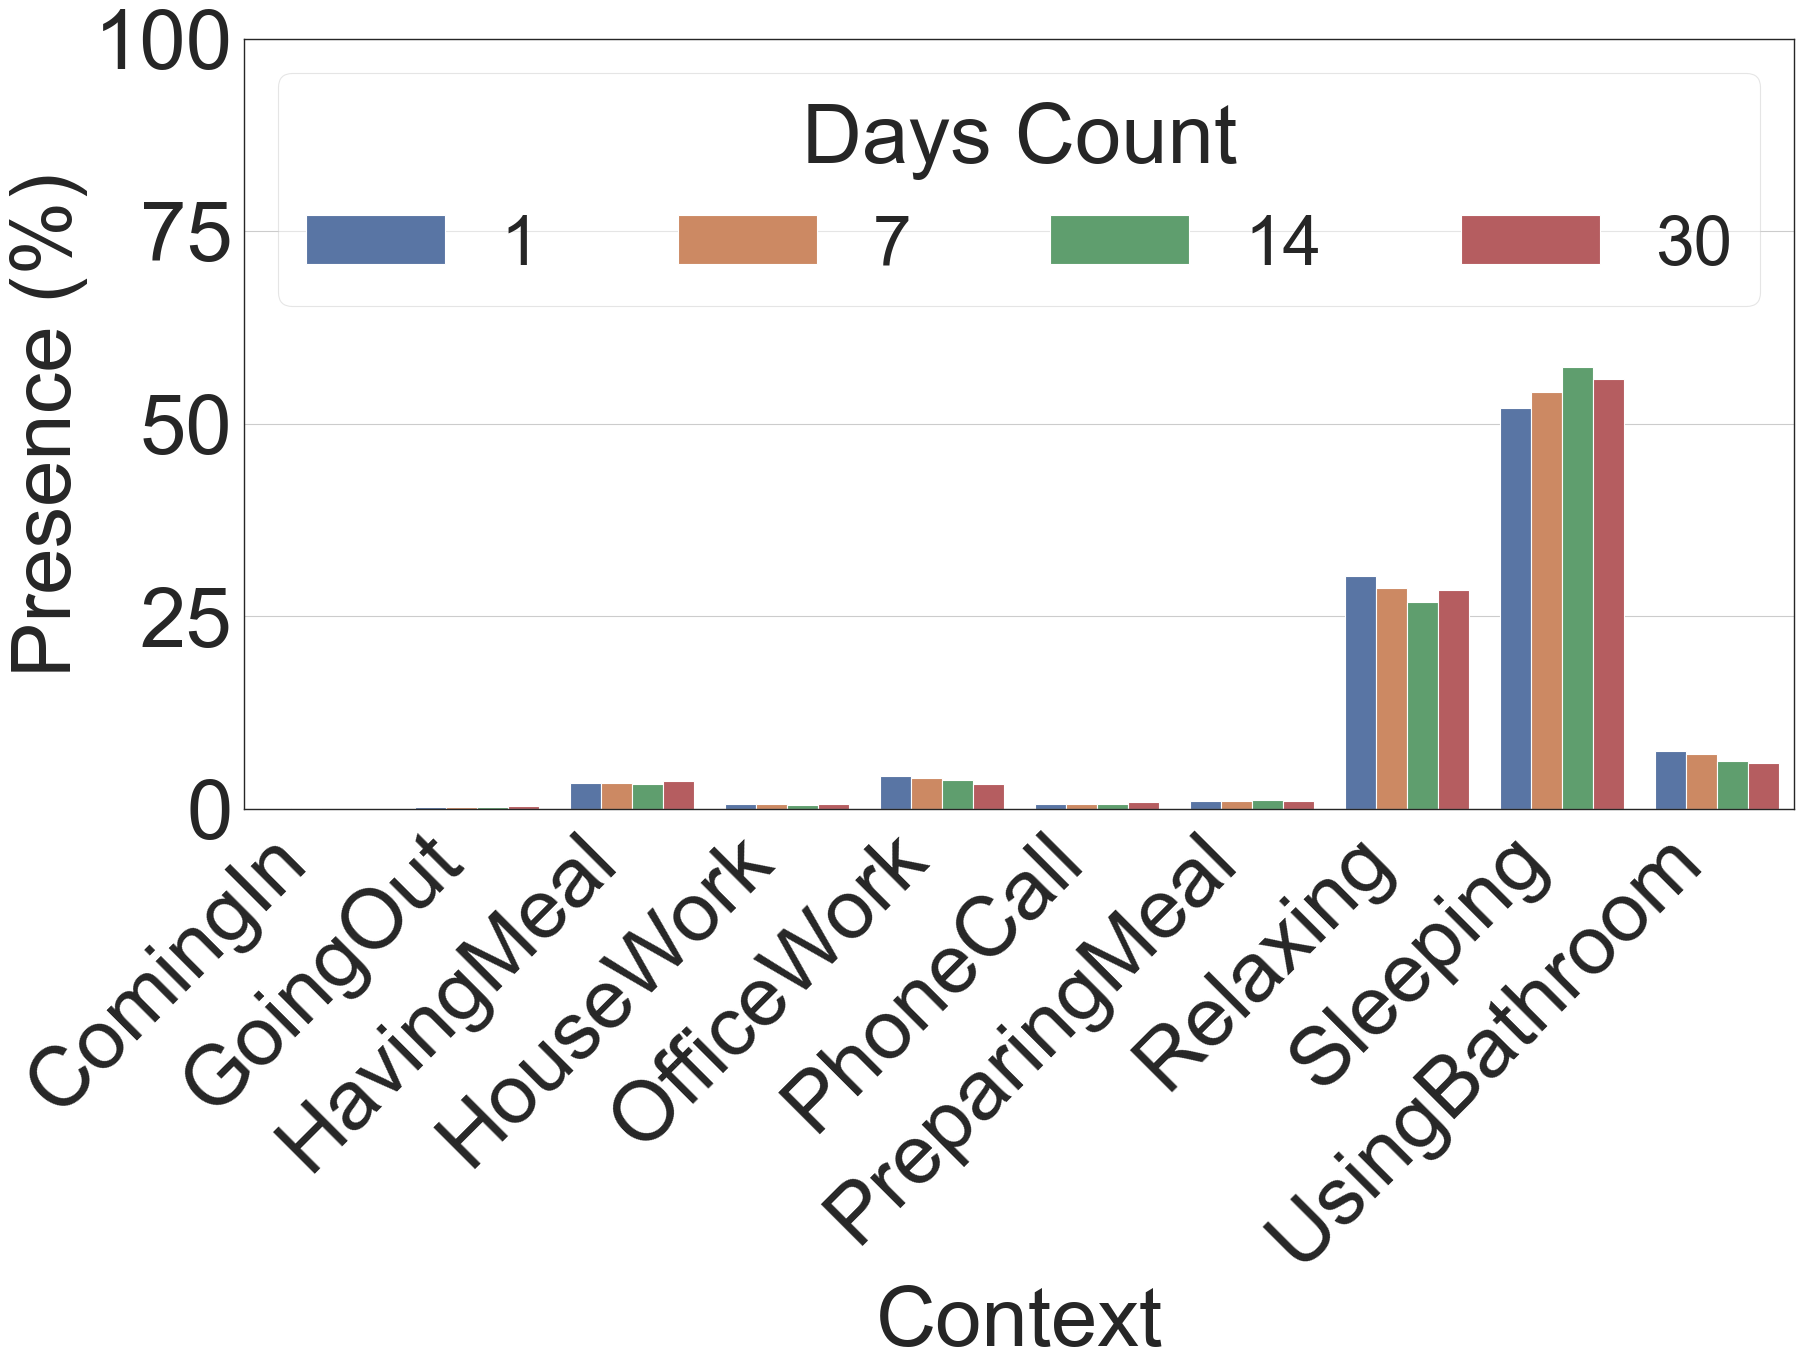

In [52]:
df_rq1bd_casas_gt = df_rq1bd[(df_rq1bd.id=='csh101') & (df_rq1bd.type=='gt')][['days','context','fraction']]
df_rq1bd_casas_gt = df_rq1bd_casas_gt.sort_values(by=['days','context'])
df_rq1bd_casas_gt = df_rq1bd_casas_gt[~(df_rq1bd_casas_gt.context=='total')]
printm("# CASAS GT distribution plot")
fig = plt.figure(figsize=(20,10))
df_rq1bd_casas_gt = df_rq1bd_casas_gt[df_rq1bd_casas_gt.fraction>0.]
df_rq1bd_casas_gt['fraction'] = df_rq1bd_casas_gt['fraction']*100
ax = sns.barplot(data=df_rq1bd_casas_gt,x='context',y='fraction', hue='days')
_ = plt.xticks(rotation=45, ha='right')
plt.xlabel("Context")
plt.ylabel("Presence (%)")
plt.ylim(0,100)
_ = plt.legend(title="Days Count", loc='upper center',ncol=4, fontsize=50)



# Extrasensory GT distribution plot

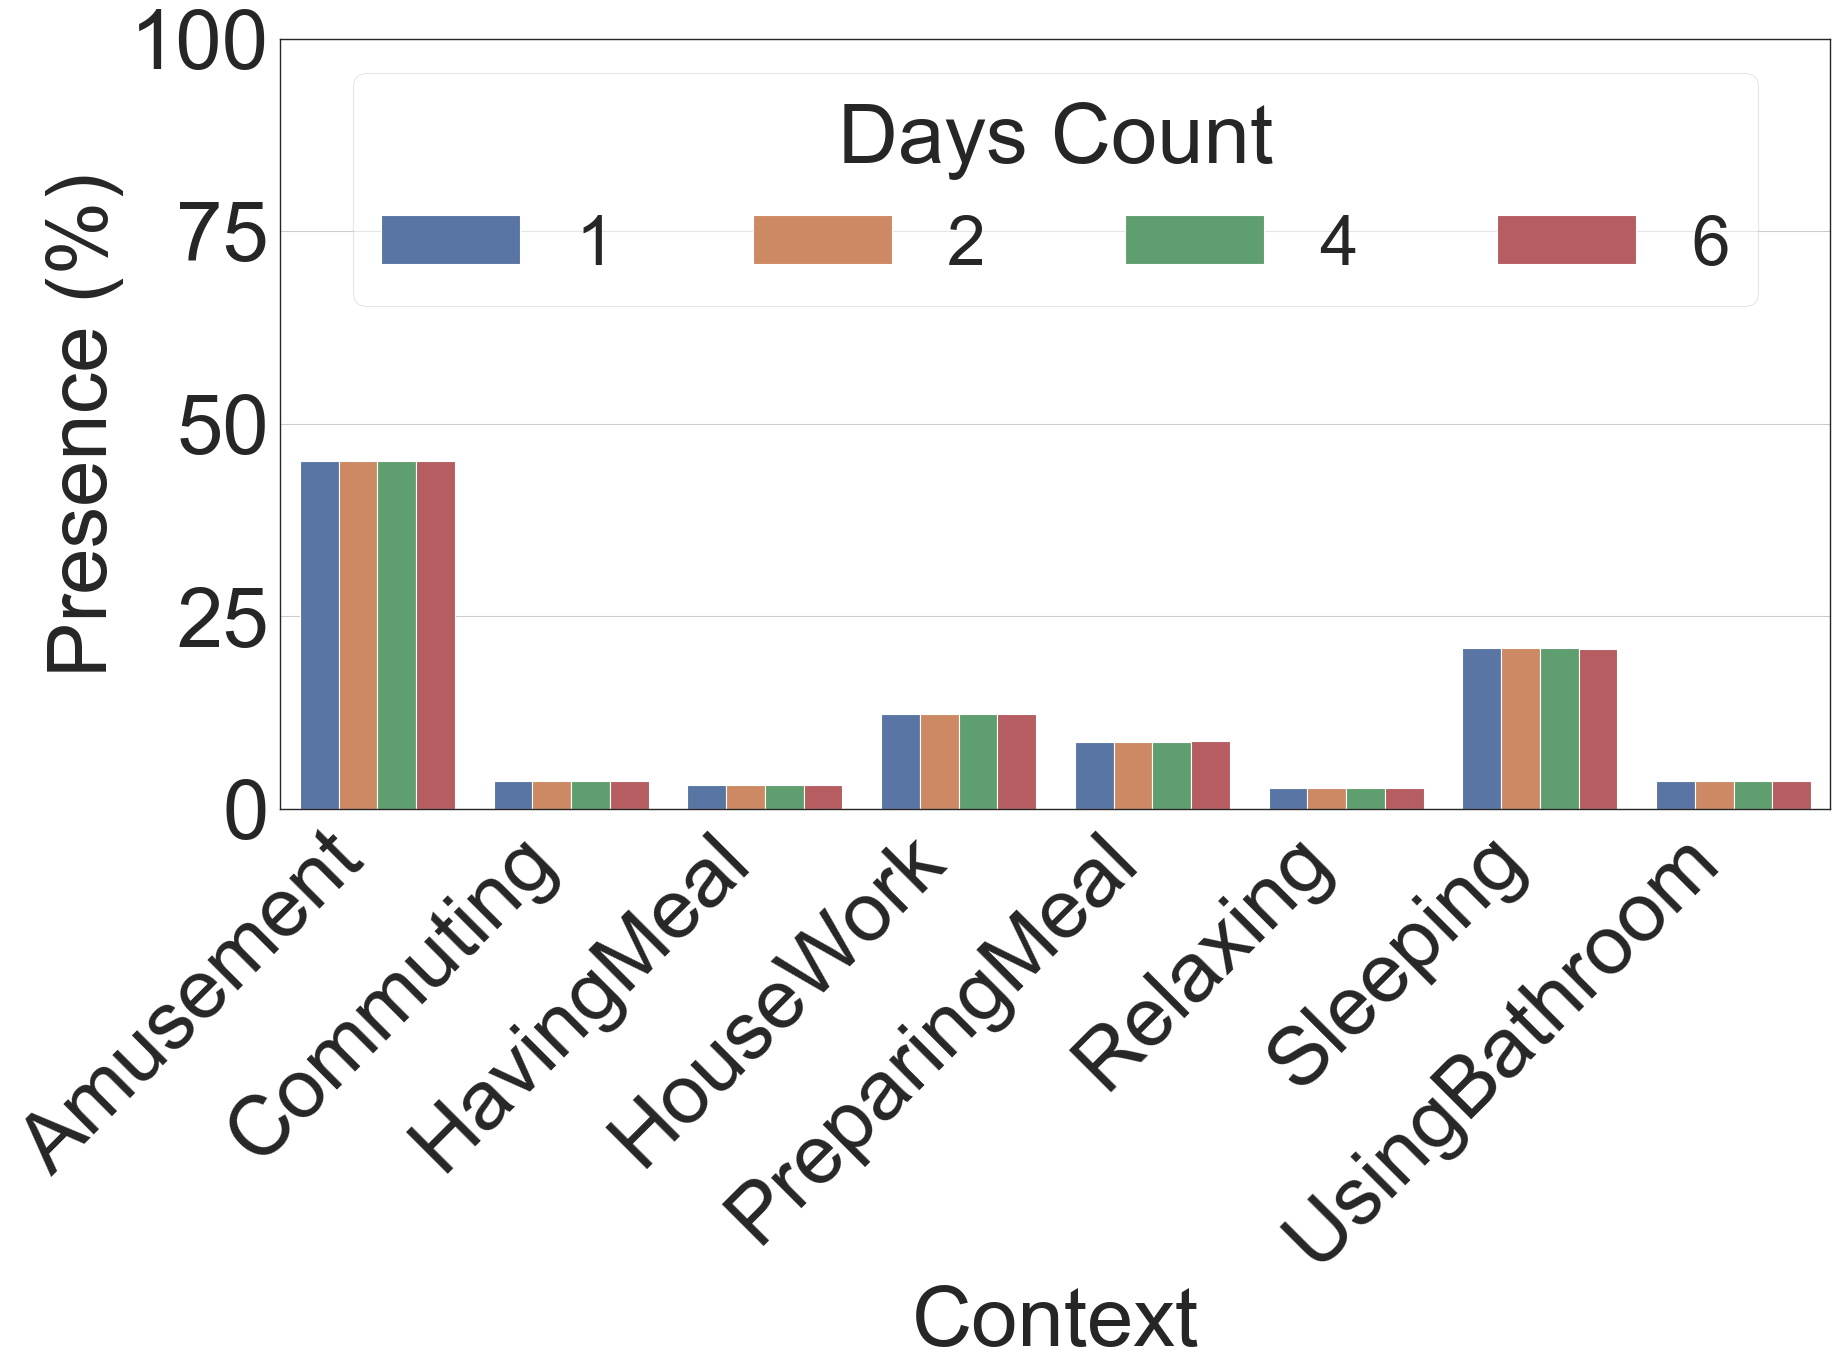

In [53]:
printm("# Extrasensory GT distribution plot")
df_rq1bd_extra_gt = df_rq1bd[(~(df_rq1bd.id=='csh101')) & (df_rq1bd.type=='gt')][['days','context','fraction']]
df_rq1bd_extra_gt = df_rq1bd_extra_gt.sort_values(by=['context','days'])
df_rq1bd_extra_gt = df_rq1bd_extra_gt[~(df_rq1bd_extra_gt.context=='total')]
fig = plt.figure(figsize=(20,10))
df_rq1bd_extra_gt = df_rq1bd_extra_gt[df_rq1bd_extra_gt.fraction>0.]
df_rq1bd_extra_gt['fraction'] = df_rq1bd_extra_gt['fraction']*100
ax = sns.barplot(data=df_rq1bd_extra_gt,x='context',y='fraction', hue='days')
_ = plt.xticks(rotation=45, ha='right')
plt.xlabel("Context")
plt.ylabel("Presence (%)")
plt.ylim(0,100)
_ = plt.legend(title="Days Count", loc='upper center',ncol=4, fontsize=50)

# Casas Prediction distribution plot

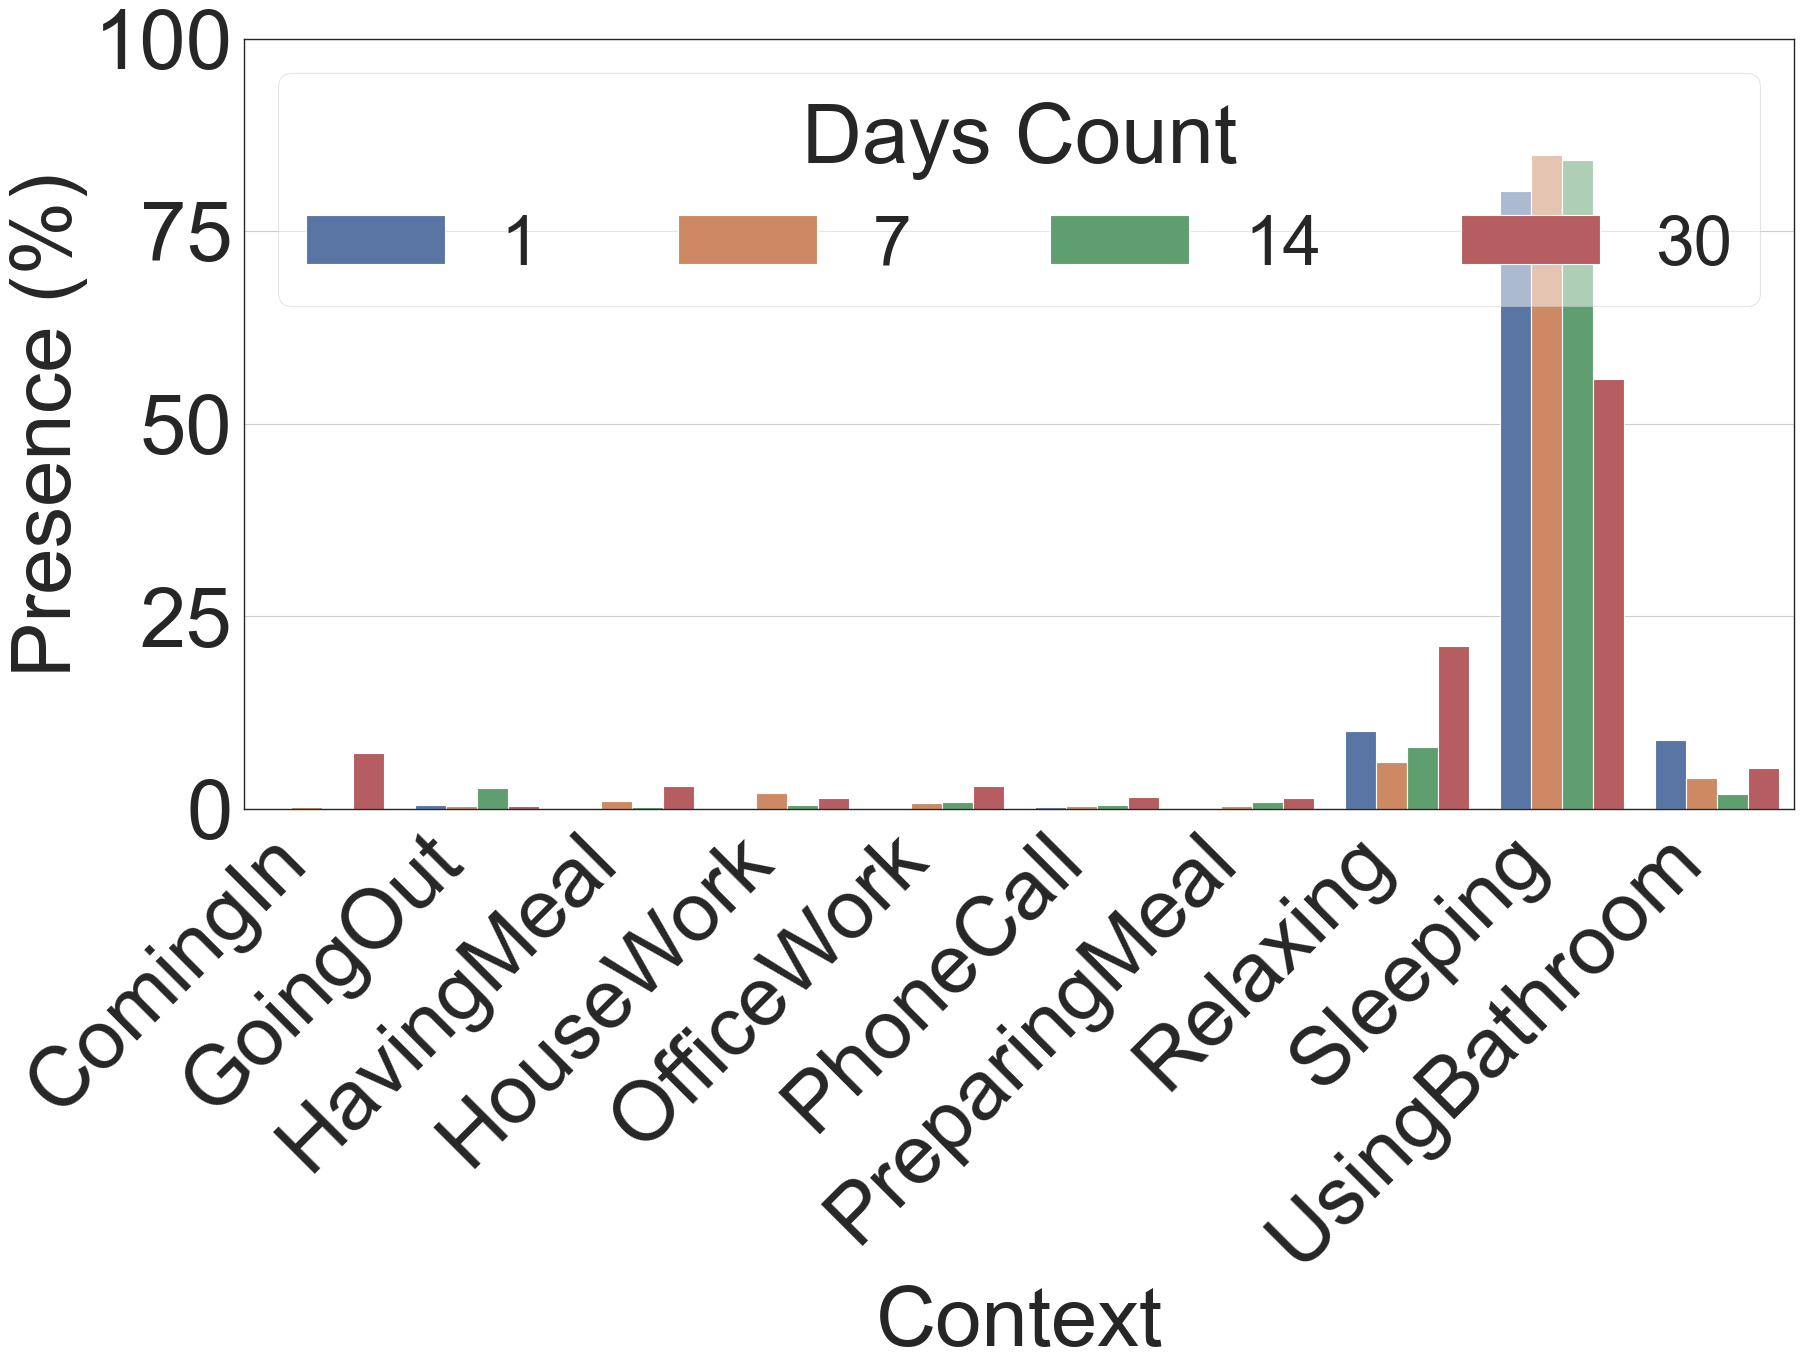

In [54]:
printm("# Casas Prediction distribution plot")
df_rq1bd_casas_pred = df_rq1bd[((df_rq1bd.id=='csh101')) & (df_rq1bd.type=='prediction')][['days','context','fraction']]

df_rq1bd_casas_pred = df_rq1bd_casas_pred[~(df_rq1bd_casas_pred.context=='total')]
fig = plt.figure(figsize=(20,10))
df_rq1bd_casas_pred = df_rq1bd_casas_pred[df_rq1bd_casas_pred.fraction>0.]
df_rq1bd_casas_pred = df_rq1bd_casas_pred.sort_values(by=['context','days'])
df_rq1bd_casas_pred['fraction'] = df_rq1bd_casas_pred['fraction']*100
ax = sns.barplot(data=df_rq1bd_casas_pred,x='context',y='fraction', hue='days')
_ = plt.xticks(rotation=45, ha='right')
plt.xlabel("Context")
plt.ylabel("Presence (%)")
plt.ylim(0,100)
_ = plt.legend(title="Days Count", loc='upper center',ncol=4, fontsize=50)

# Extrasensory Prediction distribution plot

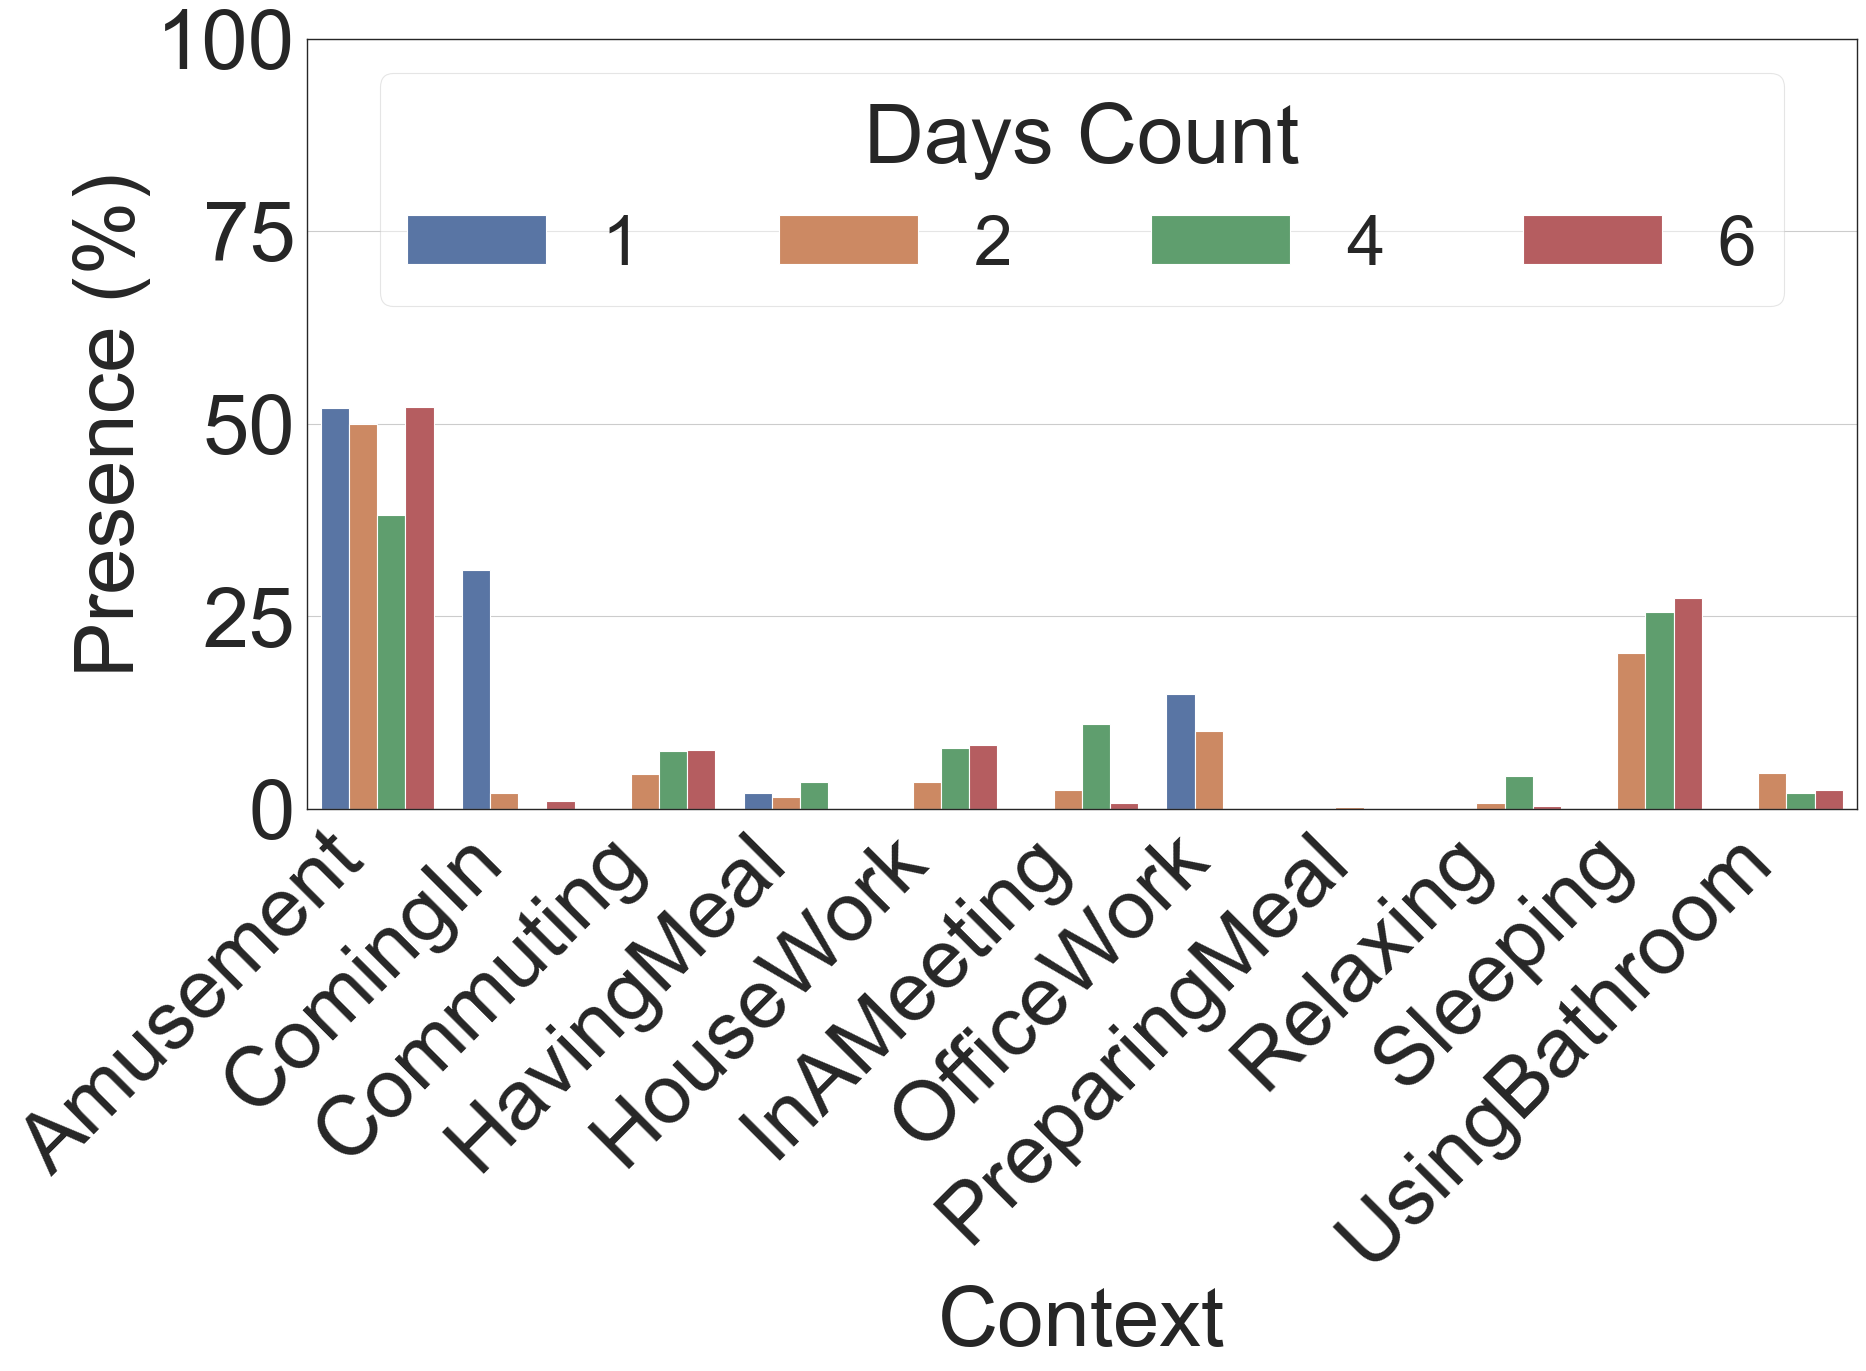

In [55]:
printm("# Extrasensory Prediction distribution plot")
df_rq1bd_extra_pred = df_rq1bd[(~(df_rq1bd.id=='csh101')) & (df_rq1bd.type=='prediction')][['days','context','fraction']]

df_rq1bd_extra_pred = df_rq1bd_extra_pred[~(df_rq1bd_extra_pred.context=='total')]
fig = plt.figure(figsize=(20,10))
df_rq1bd_extra_pred = df_rq1bd_extra_pred[df_rq1bd_extra_pred.fraction>0.]
df_rq1bd_extra_pred = df_rq1bd_extra_pred.sort_values(by=['context','days'])
df_rq1bd_extra_pred['fraction'] = df_rq1bd_extra_pred['fraction']*100
ax = sns.barplot(data=df_rq1bd_extra_pred,x='context',y='fraction', hue='days')
_ = plt.xticks(rotation=45, ha='right')
plt.xlabel("Context")
plt.ylabel("Presence (%)")
plt.ylim(0,100)
_ = plt.legend(title="Days Count", loc='upper center',ncol=4, fontsize=50)